## Importando as bibliotecas

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

## Importando os dataset

In [359]:
#Importando preços 
url1 = 'https://drive.google.com/file/d/1WAbTdLmhm0Ih971SU3AY_RoXpfPJAMTi/view?usp=drive_link'
path1 = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
df_price1 = pd.read_csv(path1)

url2 = 'https://drive.google.com/file/d/1J7oWaSGJVSiTl5TifTEgvbg0d08iSryf/view?usp=drive_link'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
df_price2 = pd.read_csv(path2)

url3 = 'https://drive.google.com/file/d/1qXDbN6ib9HO5oFbI3MtdvTfXP066hYZ6/view?usp=drive_link'
path3 = 'https://drive.google.com/uc?export=download&id='+url3.split('/')[-2]
df_price3 = pd.read_csv(path3)

url4 = 'https://drive.google.com/file/d/1tgdpfFtl1DVczTouPUDc5tLcAbh7SpWP/view?usp=drive_link'
path4 = 'https://drive.google.com/uc?export=download&id='+url4.split('/')[-2]
df_price4 = pd.read_csv(path4)

url5 = 'https://drive.google.com/file/d/1NxHF52tEXTqbglY-14_WpLsDEnYHBnuK/view?usp=drive_link'
path5 = 'https://drive.google.com/uc?export=download&id='+url5.split('/')[-2]
df_price5 = pd.read_csv(path5)

df_price = pd.concat([df_price1, df_price2, df_price3, df_price4, df_price5], ignore_index=True)

In [360]:
#Importando Vendas 
url1 = 'https://drive.google.com/file/d/1sKG9E753lvXJPB5l3RktNct71J-xh_8w/view?usp=drive_link'
path1 = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
df_sales1 = pd.read_csv(path1)

url2 = 'https://drive.google.com/file/d/1u0A_yubzWjWTWLFVrm7asWs395BQ578E/view?usp=drive_link'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
df_sales2 = pd.read_csv(path2)

url3 = 'https://drive.google.com/file/d/1NlRLGEEeUxlPDpt2FgrVvjiT_y_jHluh/view?usp=drive_link'
path3 = 'https://drive.google.com/uc?export=download&id='+url3.split('/')[-2]
df_sales3 = pd.read_csv(path3)

url4 = 'https://drive.google.com/file/d/13gowR6492BQrfQvU5_kYE5xxF3gWum38/view?usp=drive_link'
path4 = 'https://drive.google.com/uc?export=download&id='+url4.split('/')[-2]
df_sales4 = pd.read_csv(path4)

url5 = 'https://drive.google.com/file/d/1FsYLisvlMXxMz6BeUu1-1iuumVaYb9J-/view?usp=drive_link'
path5 = 'https://drive.google.com/uc?export=download&id='+url5.split('/')[-2]
df_sales5 = pd.read_csv(path5)

url6 = 'https://drive.google.com/file/d/14AbgBUnbixFjv_8pPlUkchxFQ4kytgsb/view?usp=drive_link'
path6 = 'https://drive.google.com/uc?export=download&id='+url6.split('/')[-2]
df_sales6 = pd.read_csv(path6)

df_sales = pd.concat([df_sales1, df_sales2, df_sales3, df_sales4, df_sales5, df_sales6], ignore_index=True)

In [361]:
# Importando eventos
url = 'https://drive.google.com/file/d/1h94avu15TuiguEiwdKhzL06EBNkcmSjv/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_events = pd.read_csv(path)
print('Tamanho:',  df_events.shape)
print(df_events.head())

Tamanho: (1913, 5)
         date    weekday  weekday_int    d event
0  2011-01-29   Saturday            1  d_1   NaN
1  2011-01-30     Sunday            2  d_2   NaN
2  2011-01-31     Monday            3  d_3   NaN
3  2011-02-01    Tuesday            4  d_4   NaN
4  2011-02-02  Wednesday            5  d_5   NaN


## Análise dos datasets

#### Explorando o dataset **"item_price"**

In [45]:
print('Informações do dataset de "Preço":')
print('Tamanho:',  df_price.shape)
print('Colunas:',  df_price.columns)
df_price.head()

Informações do dataset de "Preço":
Tamanho: (6965706, 5)
Colunas: Index(['item', 'category', 'store_code', 'yearweek', 'sell_price'], dtype='object')


item    category store_code  yearweek  sell_price
0  ACCESORIES_1_001  ACCESORIES      NYC_1  201328.0     12.7414
1  ACCESORIES_1_001  ACCESORIES      NYC_1  201329.0     12.7414
2  ACCESORIES_1_001  ACCESORIES      NYC_1  201330.0     10.9858
3  ACCESORIES_1_001  ACCESORIES      NYC_1  201331.0     10.9858
4  ACCESORIES_1_001  ACCESORIES      NYC_1  201332.0     10.9858

In [47]:
df_price.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [49]:
df_price.select_dtypes(include=['number','object']).isnull().sum()

item               0
category           0
store_code         0
yearweek      243920
sell_price         0
dtype: int64

In [51]:
df_price['yearweek'].value_counts()

yearweek
201608.0    30490
201617.0    30490
201615.0    30490
201614.0    30490
201613.0    30490
            ...  
201109.0    13033
201108.0    12799
201107.0    12519
201106.0    11975
201105.0    10932
Name: count, Length: 279, dtype: int64

In [53]:
raw_nan = (df_price['yearweek'].isnull().sum() / len(df_price))
percent_nan = "{:.2%}".format(raw_nan)
print('A porcentagem de valores nulos da coluna yearweek é de:', percent_nan) 

A porcentagem de valores nulos da coluna yearweek é de: 3.50%


In [55]:
df_price.describe().T

count           mean         std         min          25%  \
yearweek    6721786.0  201382.418346  145.018929  201105.000  201248.0000   
sell_price  6965706.0       5.518273    4.387861       0.012       2.6201   

                 50%         75%        max  
yearweek    201410.0  201515.000  201617.00  
sell_price       4.2       7.176     134.15

In [57]:
df_price.describe(include=['object']).T

count unique                top     freq
item        6965706   3049  SUPERMARKET_3_587     2870
category    6965706      3        SUPERMARKET  3239821
store_code  6965706     10              BOS_2   713960

In [59]:
#Precos medios por produto. Podemos juntar com o dataset sales depois
df_mean_prices = pd.DataFrame(df_price.groupby(['item','store_code'])['sell_price'].mean().reset_index())

In [61]:
df_mean_prices.head()

item store_code  sell_price
0  ACCESORIES_1_001      BOS_1   10.969366
1  ACCESORIES_1_001      BOS_2   10.997126
2  ACCESORIES_1_001      BOS_3   11.072293
3  ACCESORIES_1_001      NYC_1   11.019346
4  ACCESORIES_1_001      NYC_2   10.997126

#### Explorando o dataset **"item_sales"**

In [365]:
print('Informações do dataset de "Preço":')
print('Tamanho:',  df_sales.shape)
print('Colunas:',  df_sales.columns)
df_sales.head()

Informações do dataset de "Preço":
Tamanho: (30490, 1920)
Colunas: Index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region',
       'd_1', 'd_2', 'd_3',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1920)


id              item    category    department  \
0  ACCESORIES_1_001_NYC_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_002_NYC_1  ACCESORIES_1_002  ACCESORIES  ACCESORIES_1   
2  ACCESORIES_1_003_NYC_1  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1   
3  ACCESORIES_1_004_NYC_1  ACCESORIES_1_004  ACCESORIES  ACCESORIES_1   
4  ACCESORIES_1_005_NYC_1  ACCESORIES_1_005  ACCESORIES  ACCESORIES_1   

               store store_code    region  d_1  d_2  d_3  ...  d_1904  d_1905  \
0  Greenwich_Village      NYC_1  New York    0    0    0  ...       1       3   
1  Greenwich_Village      NYC_1  New York    0    0    0  ...       0       0   
2  Greenwich_Village      NYC_1  New York    0    0    0  ...       2       1   
3  Greenwich_Village      NYC_1  New York    0    0    0  ...       1       0   
4  Greenwich_Village      NYC_1  New York    0    0    0  ...       2       1   

   d_1906  d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0       0       1       1       1       3       0       1       1  
1       0       0       0       1       0       0       0       0  
2       2       1       1       1       0       1       1       1  
3       5       4       1       0       1       3       7       2  
4       1       0       1       1       2       2       2       4  

[5 rows x 1920 columns]

In [367]:
df_sales.tail()

id               item     category     department  \
30485  SUPERMARKET_3_823_PHI_3  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3   
30486  SUPERMARKET_3_824_PHI_3  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3   
30487  SUPERMARKET_3_825_PHI_3  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3   
30488  SUPERMARKET_3_826_PHI_3  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3   
30489  SUPERMARKET_3_827_PHI_3  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3   

               store store_code        region  d_1  d_2  d_3  ...  d_1904  \
30485  Queen_Village      PHI_3  Philadelphia    0    0    2  ...       2   
30486  Queen_Village      PHI_3  Philadelphia    0    0    0  ...       0   
30487  Queen_Village      PHI_3  Philadelphia    0    6    0  ...       2   
30488  Queen_Village      PHI_3  Philadelphia    0    0    0  ...       0   
30489  Queen_Village      PHI_3  Philadelphia    0    0    0  ...       0   

       d_1905  d_1906  d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
30485       0       0       0       0       0       1       0       0       1  
30486       0       0       0       0       0       0       0       1       0  
30487       1       0       2       0       1       0       0       1       0  
30488       0       1       0       0       1       0       3       1       3  
30489       0       0       0       0       0       0       0       0       0  

[5 rows x 1920 columns]

In [70]:
# Se colocar verbose=True, vai aparecer 1920 linhas por conta da quantidade de colunas do df
df_sales.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


In [72]:
df_sales.select_dtypes(include=['object']).isnull().sum()

id            0
item          0
category      0
department    0
store         0
store_code    0
region        0
dtype: int64

In [74]:
filtered_columns = df_sales.select_dtypes(include=['number']).isnull().sum() >= 1

# Verificar se alguma coluna está com o valor nulo
if filtered_columns.any():
    print("Pelo menos uma coluna tem valores nulos.")
else:
    print("Nenhuma coluna tem valores nulos.")

Nenhuma coluna tem valores nulos.


In [76]:
df_sales.describe().T

count      mean       std  min  25%  50%  75%    max
d_1     30490.0  1.070220  5.126689  0.0  0.0  0.0  0.0  360.0
d_2     30490.0  1.041292  5.365468  0.0  0.0  0.0  0.0  436.0
d_3     30490.0  0.780026  3.667454  0.0  0.0  0.0  0.0  207.0
d_4     30490.0  0.833454  4.415141  0.0  0.0  0.0  0.0  323.0
d_5     30490.0  0.627944  3.379344  0.0  0.0  0.0  0.0  296.0
...         ...       ...       ...  ...  ...  ...  ...    ...
d_1909  30490.0  1.159167  2.876026  0.0  0.0  0.0  1.0   88.0
d_1910  30490.0  1.149000  2.950364  0.0  0.0  0.0  1.0   77.0
d_1911  30490.0  1.328862  3.358012  0.0  0.0  0.0  1.0  141.0
d_1912  30490.0  1.605838  4.089422  0.0  0.0  0.0  2.0  171.0
d_1913  30490.0  1.633158  3.812248  0.0  0.0  0.0  2.0  130.0

[1913 rows x 8 columns]

In [78]:
df_sales.describe(include=['object']).T

count unique                     top   freq
id          30490  30490  ACCESORIES_1_001_NYC_1      1
item        30490   3049        ACCESORIES_1_001     10
category    30490      3             SUPERMARKET  14370
department  30490      7           SUPERMARKET_3   8230
store       30490     10       Greenwich_Village   3049
store_code  30490     10                   NYC_1   3049
region      30490      3                New York  12196

#### Explorando o dataset **"daily_calendar_with_events"**

In [81]:
print('Informações do dataset de "Preço":')
print('Tamanho:',  df_events.shape)
print('Colunas:',  df_events.columns)
df_events.head()

Informações do dataset de "Preço":
Tamanho: (1913, 5)
Colunas: Index(['date', 'weekday', 'weekday_int', 'd', 'event'], dtype='object')


date    weekday  weekday_int    d event
0  2011-01-29   Saturday            1  d_1   NaN
1  2011-01-30     Sunday            2  d_2   NaN
2  2011-01-31     Monday            3  d_3   NaN
3  2011-02-01    Tuesday            4  d_4   NaN
4  2011-02-02  Wednesday            5  d_5   NaN

In [83]:
df_events.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


In [85]:
df_events.select_dtypes(include=['number','object']).isnull().sum()

date              0
weekday           0
weekday_int       0
d                 0
event          1887
dtype: int64

In [87]:
df_events.describe().T

count      mean       std  min  25%  50%  75%  max
weekday_int  1913.0  3.997386  2.001175  1.0  2.0  4.0  6.0  7.0

In [89]:
df_events.describe(include=['object']).T

count unique         top freq
date     1913   1913  2011-01-29    1
weekday  1913      7    Saturday  274
d        1913   1913         d_1    1
event      26      5   SuperBowl    6

In [91]:
df_events.rename(columns={'d':'day'}, inplace=True)

In [93]:
print(df_events.columns)

Index(['date', 'weekday', 'weekday_int', 'day', 'event'], dtype='object')


Juntando DF

In [96]:
sales_melted = df_sales.melt(id_vars=['id', 'item', 'category', 'department', 'store', 'store_code', 'region'], var_name='day', value_name='units_sold')

In [98]:
sales_melted.head()

id              item    category    department  \
0  ACCESORIES_1_001_NYC_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_002_NYC_1  ACCESORIES_1_002  ACCESORIES  ACCESORIES_1   
2  ACCESORIES_1_003_NYC_1  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1   
3  ACCESORIES_1_004_NYC_1  ACCESORIES_1_004  ACCESORIES  ACCESORIES_1   
4  ACCESORIES_1_005_NYC_1  ACCESORIES_1_005  ACCESORIES  ACCESORIES_1   

               store store_code    region  day  units_sold  
0  Greenwich_Village      NYC_1  New York  d_1           0  
1  Greenwich_Village      NYC_1  New York  d_1           0  
2  Greenwich_Village      NYC_1  New York  d_1           0  
3  Greenwich_Village      NYC_1  New York  d_1           0  
4  Greenwich_Village      NYC_1  New York  d_1           0

In [100]:
#merge entre sales e events
df_sales_daily = sales_melted.merge(df_events, how='left', on='day')

In [102]:
#merge entre df anterior e mean_prices
df = df_sales_daily.merge(df_mean_prices, how='left', on=['item','store_code'])

In [104]:
#criando uma coluna com o total sale por item diaraimente
df['total_sale'] = df['units_sold'] * df['sell_price']

In [106]:
df[df['day'] == 'd_1913']

id               item     category  \
58296880   ACCESORIES_1_001_NYC_1   ACCESORIES_1_001   ACCESORIES   
58296881   ACCESORIES_1_002_NYC_1   ACCESORIES_1_002   ACCESORIES   
58296882   ACCESORIES_1_003_NYC_1   ACCESORIES_1_003   ACCESORIES   
58296883   ACCESORIES_1_004_NYC_1   ACCESORIES_1_004   ACCESORIES   
58296884   ACCESORIES_1_005_NYC_1   ACCESORIES_1_005   ACCESORIES   
...                           ...                ...          ...   
58327365  SUPERMARKET_3_823_PHI_3  SUPERMARKET_3_823  SUPERMARKET   
58327366  SUPERMARKET_3_824_PHI_3  SUPERMARKET_3_824  SUPERMARKET   
58327367  SUPERMARKET_3_825_PHI_3  SUPERMARKET_3_825  SUPERMARKET   
58327368  SUPERMARKET_3_826_PHI_3  SUPERMARKET_3_826  SUPERMARKET   
58327369  SUPERMARKET_3_827_PHI_3  SUPERMARKET_3_827  SUPERMARKET   

             department              store store_code        region     day  \
58296880   ACCESORIES_1  Greenwich_Village      NYC_1      New York  d_1913   
58296881   ACCESORIES_1  Greenwich_Village      NYC_1      New York  d_1913   
58296882   ACCESORIES_1  Greenwich_Village      NYC_1      New York  d_1913   
58296883   ACCESORIES_1  Greenwich_Village      NYC_1      New York  d_1913   
58296884   ACCESORIES_1  Greenwich_Village      NYC_1      New York  d_1913   
...                 ...                ...        ...           ...     ...   
58327365  SUPERMARKET_3      Queen_Village      PHI_3  Philadelphia  d_1913   
58327366  SUPERMARKET_3      Queen_Village      PHI_3  Philadelphia  d_1913   
58327367  SUPERMARKET_3      Queen_Village      PHI_3  Philadelphia  d_1913   
58327368  SUPERMARKET_3      Queen_Village      PHI_3  Philadelphia  d_1913   
58327369  SUPERMARKET_3      Queen_Village      PHI_3  Philadelphia  d_1913   

          units_sold        date weekday  weekday_int event  sell_price  \
58296880           1  2016-04-24  Sunday            2   NaN   11.019346   
58296881           0  2016-04-24  Sunday            2   NaN    5.280100   
58296882           1  2016-04-24  Sunday            2   NaN    3.950100   
58296883           2  2016-04-24  Sunday            2   NaN    6.022636   
58296884           4  2016-04-24  Sunday            2   NaN    3.909906   
...              ...         ...     ...          ...   ...         ...   
58327365           1  2016-04-24  Sunday            2   NaN    3.358244   
58327366           0  2016-04-24  Sunday            2   NaN    3.009491   
58327367           0  2016-04-24  Sunday            2   NaN    4.939652   
58327368           3  2016-04-24  Sunday            2   NaN    1.536000   
58327369           0  2016-04-24  Sunday            2   NaN    1.200000   

          total_sale  
58296880   11.019346  
58296881    0.000000  
58296882    3.950100  
58296883   12.045272  
58296884   15.639622  
...              ...  
58327365    3.358244  
58327366    0.000000  
58327367    0.000000  
58327368    4.608000  
58327369    0.000000  

[30490 rows x 15 columns]

# Downcast

In [108]:
def memory_usage_mb(df):
    return df.memory_usage(deep=True).sum() / (1024 * 1024)

# Memória original
memory_before = memory_usage_mb(df)
print(f"Memória antes: {memory_before:.2f} MB")

Memória antes: 37064.88 MB


In [110]:
#Colunas numericas
df['units_sold'] = df['units_sold'].astype('int16')
df['weekday_int'] = df['weekday_int'].astype('int8')
df['sell_price'] = df['sell_price'].astype('float16')
df['total_sale'] = df['total_sale'].astype('float16')

#Colunas objeto
object_columns = ['id', 'item', 'category', 'department', 'store', 'store_code', 'region', 'day', 'weekday']
df[object_columns] = df[object_columns].astype('category')

# date time
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [112]:
# fazendo encoding dos eventos, se é feriado 1, se não 0.
df['event'] = np.where(df['event'].isna(), 0, 1).astype('int8')

In [114]:
memory_after = memory_usage_mb(df)

reduction_percentage = 100 * (memory_before - memory_after) / memory_before

print(f"Memória depois: {memory_after:.2f} MB")
print(f"Redução de memória: {reduction_percentage:.2f}%")

Memória depois: 1561.05 MB
Redução de memória: 95.79%


In [116]:
df.dtypes

id                   category
item                 category
category             category
department           category
store                category
store_code           category
region               category
day                  category
units_sold              int16
date           datetime64[ns]
weekday              category
weekday_int              int8
event                    int8
sell_price            float16
total_sale            float16
dtype: object

# Analise das vendas

In [87]:
#Analisando vendas por loja
sales_per_store = df.groupby('store')['total_sale'].sum().sort_values(ascending=False)

/var/folders/qk/1hlkl_vs42x841fcykv090lw0000gn/T/ipykernel_2433/1715985613.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_per_store = df.groupby('store')['total_sale'].sum().sort_values(ascending=False)


<Axes: xlabel='store'>

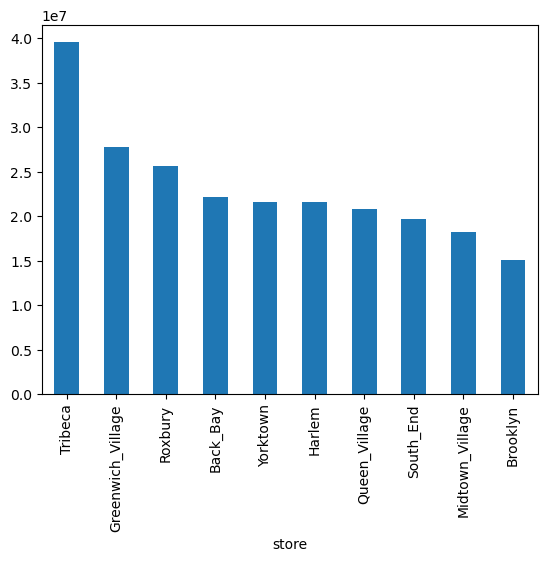

In [88]:
sales_per_store.plot(kind='bar')

In [87]:
#Segmentando por loja
nyc1 = df[df['store_code'] == 'NYC_1']
nyc2 = df[df['store_code'] == 'NYC_2']
nyc3 = df[df['store_code'] == 'NYC_3']
nyc4 = df[df['store_code'] == 'NYC_4']
bos1 = df[df['store_code'] == 'BOS_1']
bos2 = df[df['store_code'] == 'BOS_2']
bos3 = df[df['store_code'] == 'BOS_3']
phi1 = df[df['store_code'] == 'PHI_1']
phi2 = df[df['store_code'] == 'PHI_2']
phi3 = df[df['store_code'] == 'PHI_3']

In [92]:
#Agrupando por vendas diarias
df_nyc1 = nyc1.groupby('date')['total_sale'].sum()
df_nyc2 = nyc2.groupby('date')['total_sale'].sum()
df_nyc3 = nyc3.groupby('date')['total_sale'].sum()
df_nyc4 = nyc4.groupby('date')['total_sale'].sum()
df_bos1 = bos1.groupby('date')['total_sale'].sum()
df_bos2 = bos2.groupby('date')['total_sale'].sum()
df_bos3 = bos3.groupby('date')['total_sale'].sum()
df_phi1 = phi1.groupby('date')['total_sale'].sum()
df_phi2 = phi2.groupby('date')['total_sale'].sum()
df_phi3 = phi3.groupby('date')['total_sale'].sum()

In [93]:
#transofrmando em timeseries
ts_nyc1 = pd.Series(df_nyc1)
ts_nyc2 = pd.Series(df_nyc2)
ts_nyc3 = pd.Series(df_nyc3)
ts_nyc4 = pd.Series(df_nyc4)
ts_bos1 = pd.Series(df_bos1)
ts_bos2 = pd.Series(df_bos1)
ts_bos3 = pd.Series(df_bos3)
ts_phi1 = pd.Series(df_phi1)
ts_phi2 = pd.Series(df_phi2)
ts_phi3 = pd.Series(df_phi3)

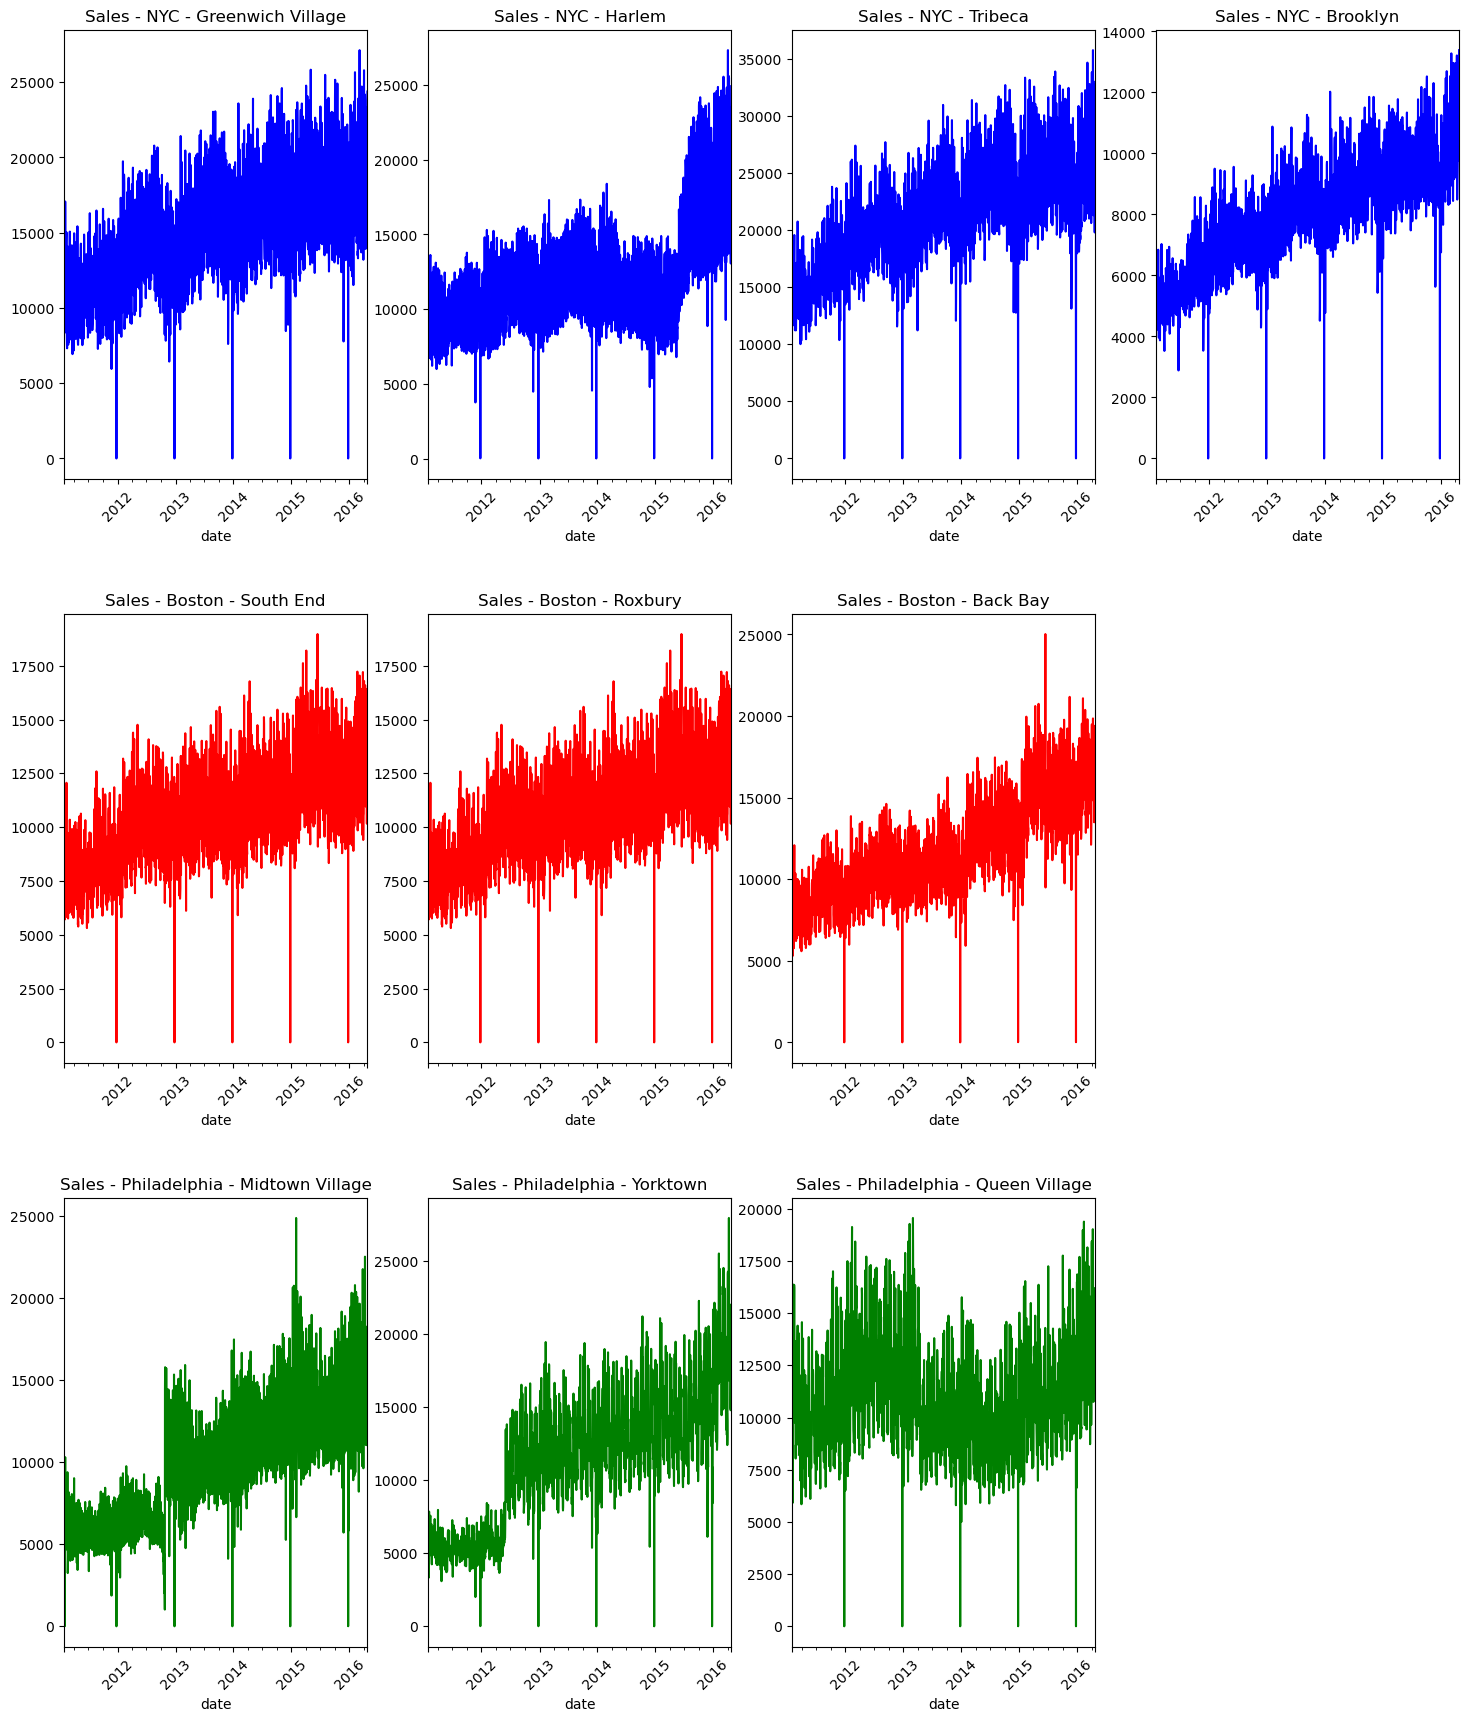

In [96]:
#plotando graficos das vendas de cada loja em cada cidade
fig, axs = plt.subplots(3, 4, figsize=(18, 21))
fig.subplots_adjust(hspace=0.3)
axs[1, 3].axis('off')
axs[2, 3].axis('off')

ts_nyc1.plot(ax=axs[0,0], color='blue')
axs[0,0].set_title('Sales - NYC - Greenwich Village')
axs[0,0].tick_params(axis='x', labelrotation=45)

ts_nyc2.plot(ax=axs[0,1], color='blue')
axs[0,1].set_title('Sales - NYC - Harlem')
axs[0,1].tick_params(axis='x', labelrotation=45)

ts_nyc3.plot(ax=axs[0,2], color='blue')
axs[0,2].set_title('Sales - NYC - Tribeca')
axs[0,2].tick_params(axis='x', labelrotation=45)

ts_nyc4.plot(ax=axs[0,3], color='blue')
axs[0,3].set_title('Sales - NYC - Brooklyn')
axs[0,3].tick_params(axis='x', labelrotation=45)

ts_bos1.plot(ax=axs[1,0], color='red')
axs[1,0].set_title('Sales - Boston - South End')
axs[1,0].tick_params(axis='x', labelrotation=45)

ts_bos2.plot(ax=axs[1,1], color='red')
axs[1,1].set_title('Sales - Boston - Roxbury')
axs[1,1].tick_params(axis='x', labelrotation=45)

ts_bos3.plot(ax=axs[1,2], color='red')
axs[1,2].set_title('Sales - Boston - Back Bay')
axs[1,2].tick_params(axis='x', labelrotation=45)

ts_phi1.plot(ax=axs[2,0], color='green')
axs[2,0].set_title('Sales - Philadelphia - Midtown Village')
axs[2,0].tick_params(axis='x', labelrotation=45)

ts_phi2.plot(ax=axs[2,1], color='green')
axs[2,1].set_title('Sales - Philadelphia - Yorktown')
axs[2,1].tick_params(axis='x', labelrotation=45)

ts_phi3.plot(ax=axs[2,2], color='green')
axs[2,2].set_title('Sales - Philadelphia - Queen Village')
axs[2,2].tick_params(axis='x', labelrotation=45)

Verificando a distribuiçao de itens, categorias e departamentos

In [68]:
dataframes = [nyc1, nyc2, nyc3, nyc4, bos1, bos2, bos3, phi1, phi2, phi3]
names = ['NYC - Greenwich Village', 'NYC - Harlem', 'NYC - Tribeca', 'NYC - Brooklyn', 'BOS - South End', 'BOS - Roxbury', 'BOS - Back Bay', 'PHI - Midtown Village', 'PHI - Yorktown', 'PHI - Queen Village']

<Figure size 1000x600 with 0 Axes>

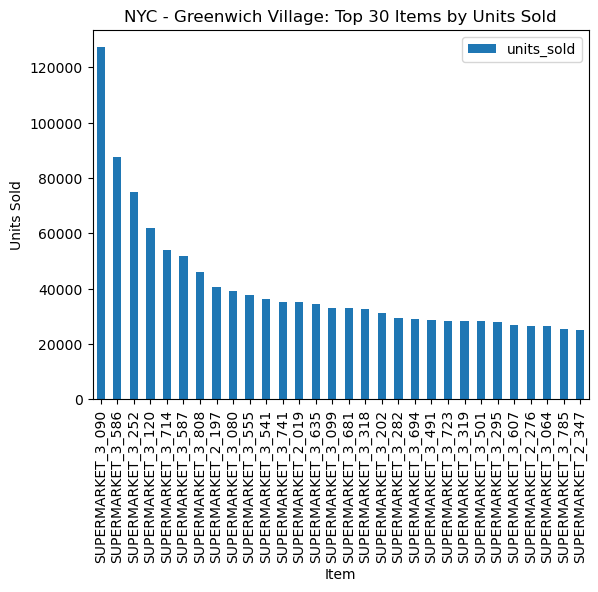

<Figure size 1000x600 with 0 Axes>

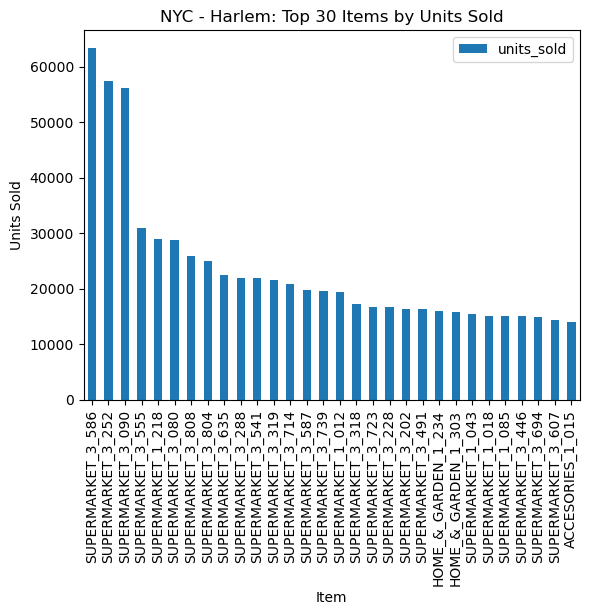

<Figure size 1000x600 with 0 Axes>

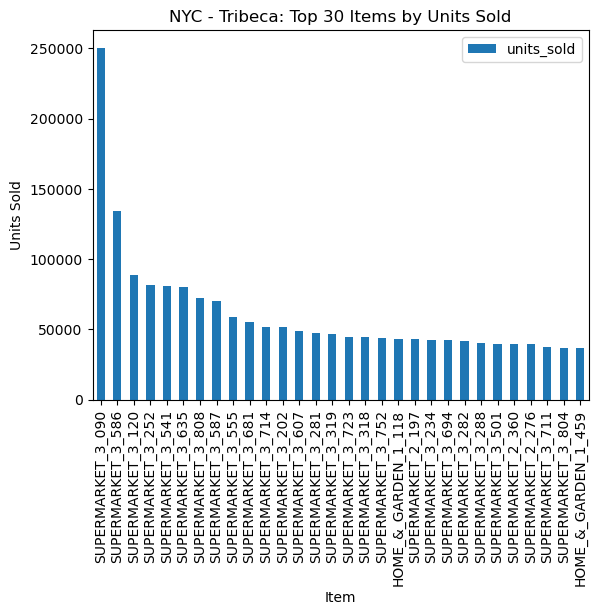

<Figure size 1000x600 with 0 Axes>

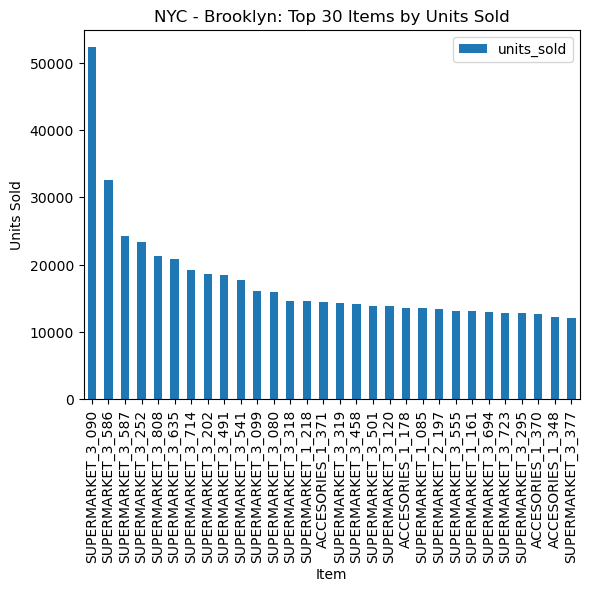

<Figure size 1000x600 with 0 Axes>

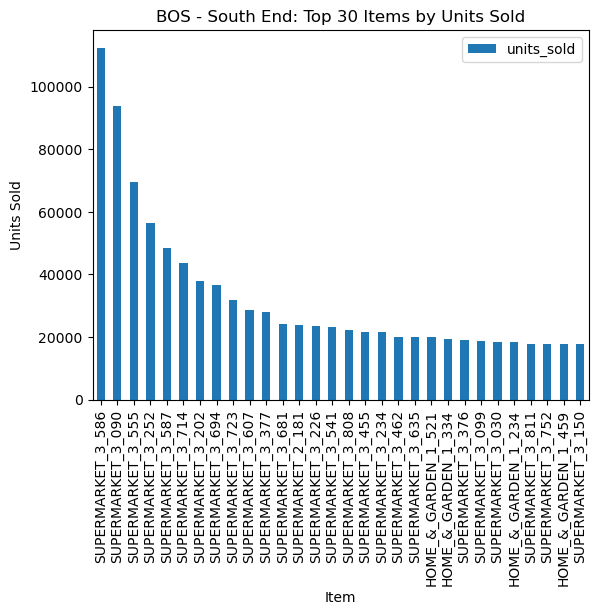

<Figure size 1000x600 with 0 Axes>

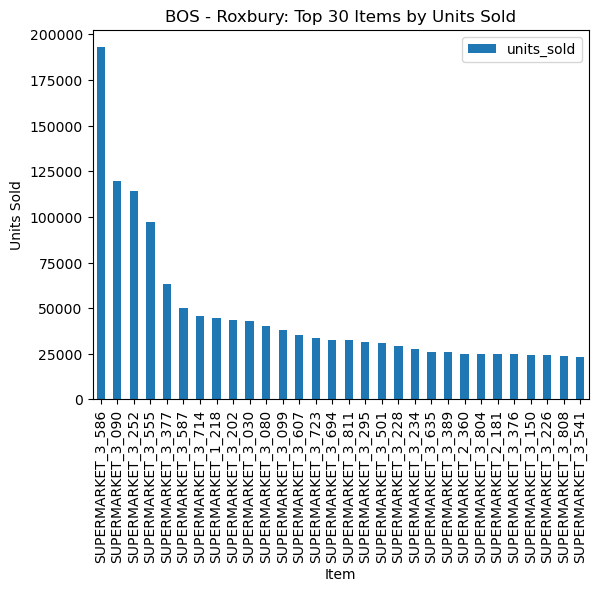

<Figure size 1000x600 with 0 Axes>

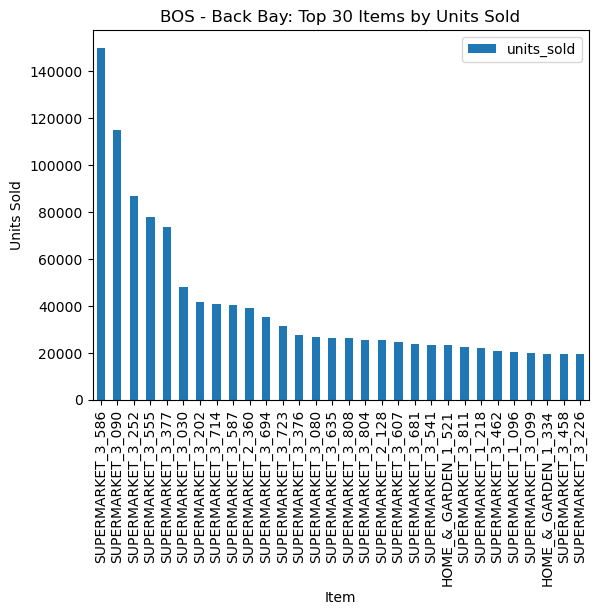

<Figure size 1000x600 with 0 Axes>

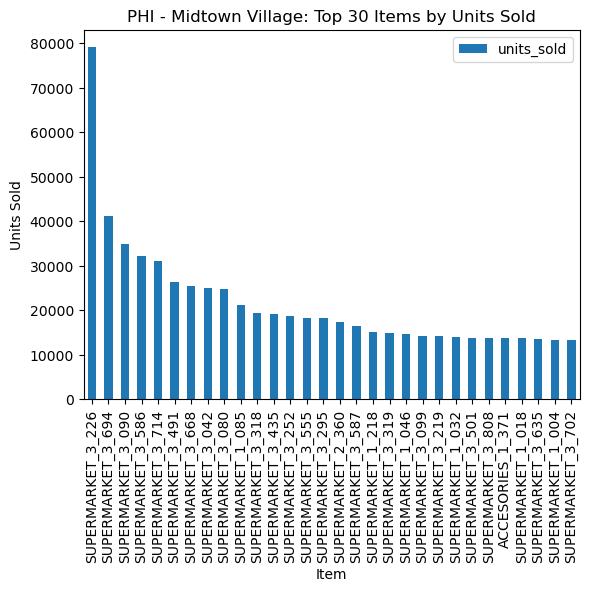

<Figure size 1000x600 with 0 Axes>

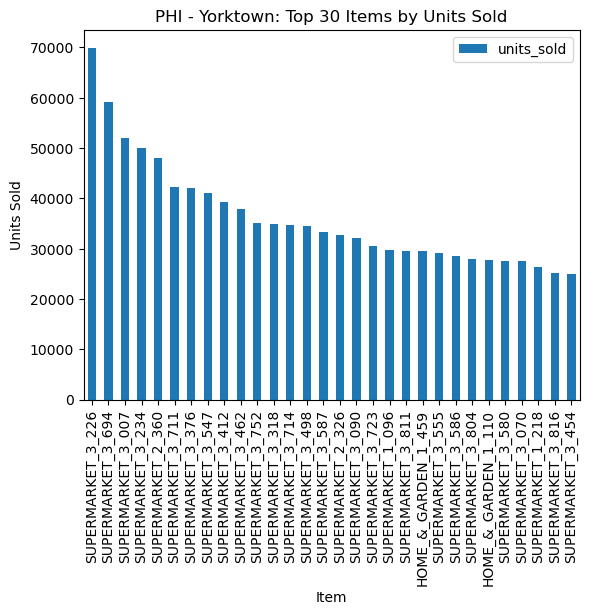

<Figure size 1000x600 with 0 Axes>

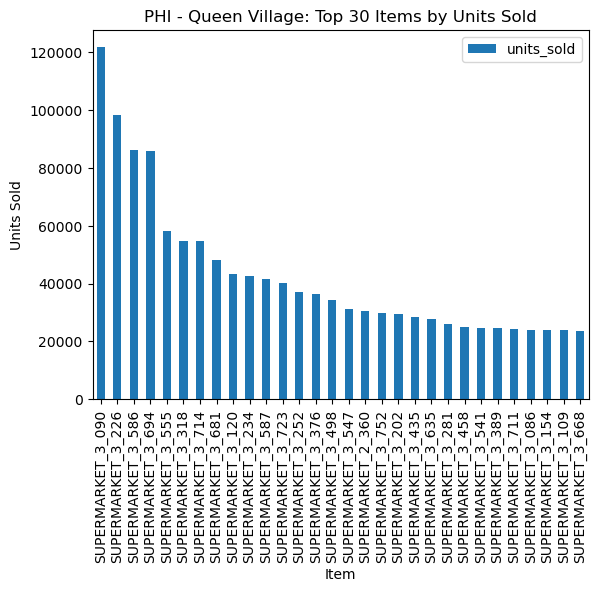

In [70]:
#30 itens mais vendidos por loja
for i in range(len(dataframes)):
    df = dataframes[i]
    name = names[i]
    grouped_df = df.groupby('item')[['units_sold']].sum()
    grouped_df = grouped_df.sort_values(by='units_sold', ascending=False)
    plt.figure(figsize=(10, 6))
    grouped_df.iloc[0:30,:].plot(kind='bar', title=f'{name}: Top 30 Items by Units Sold')
    plt.xlabel('Item')
    plt.ylabel('Units Sold')
    plt.show()

<Figure size 1000x600 with 0 Axes>

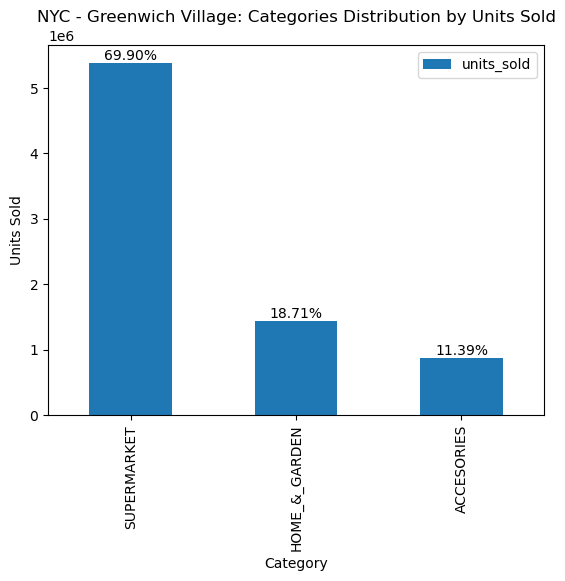

<Figure size 1000x600 with 0 Axes>

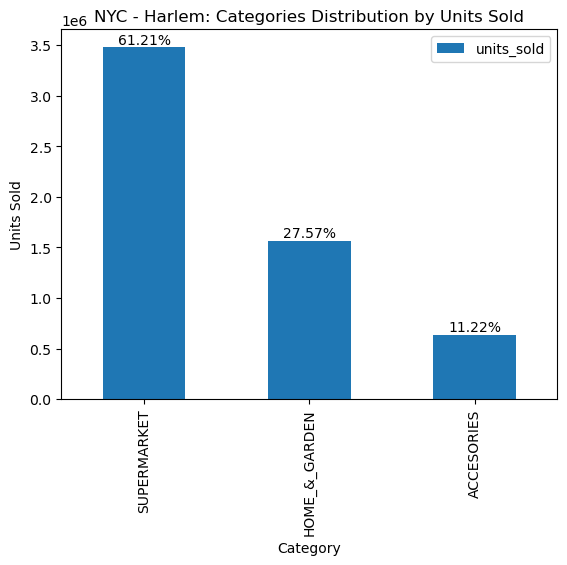

<Figure size 1000x600 with 0 Axes>

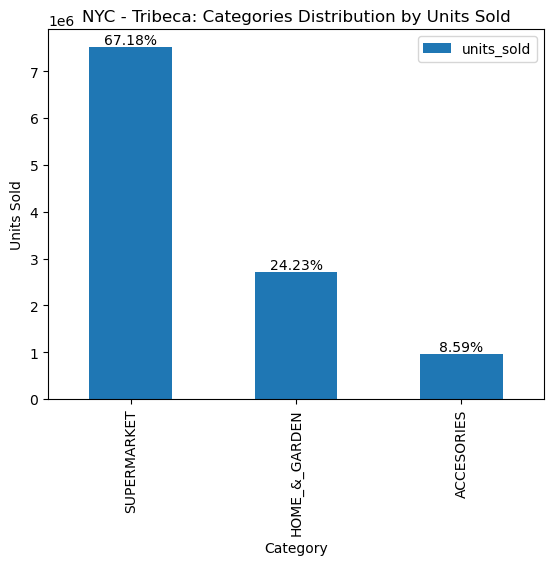

<Figure size 1000x600 with 0 Axes>

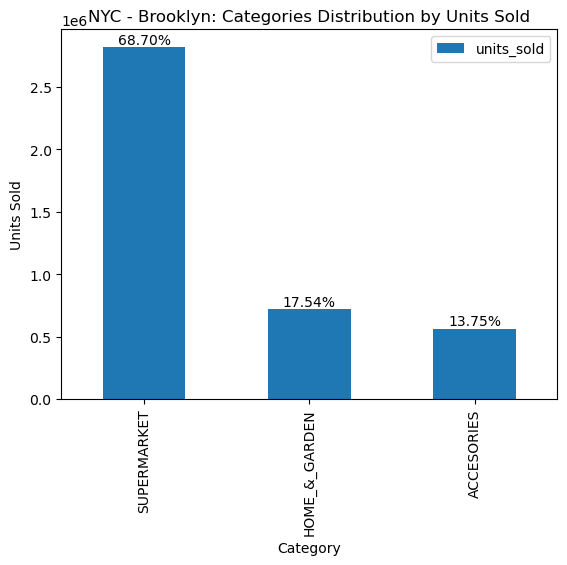

<Figure size 1000x600 with 0 Axes>

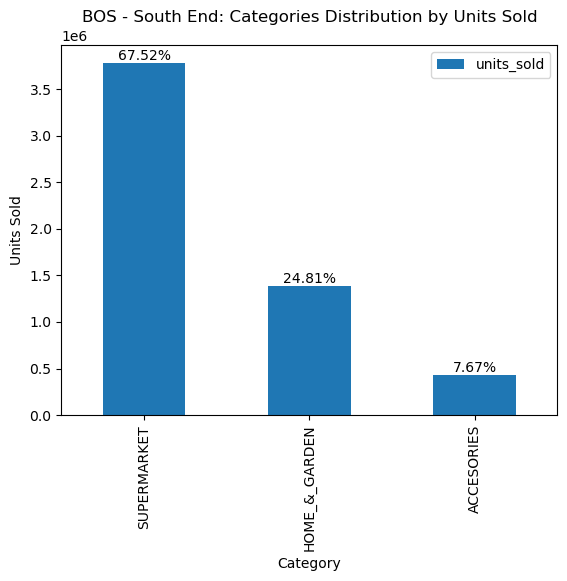

<Figure size 1000x600 with 0 Axes>

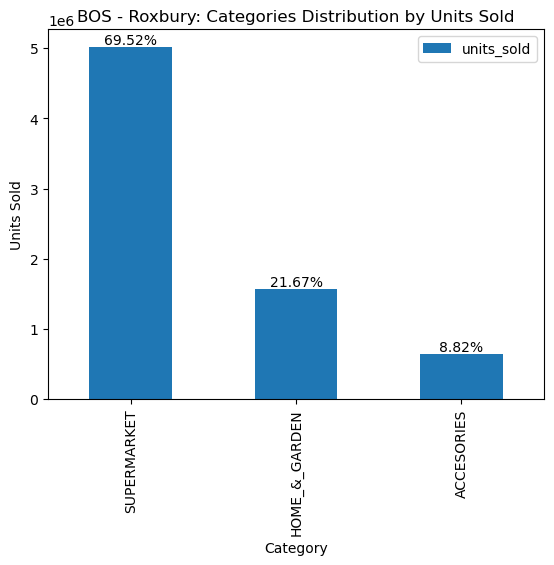

<Figure size 1000x600 with 0 Axes>

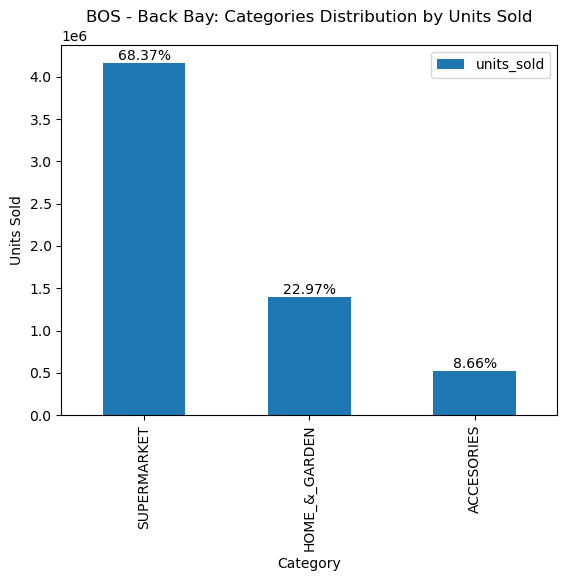

<Figure size 1000x600 with 0 Axes>

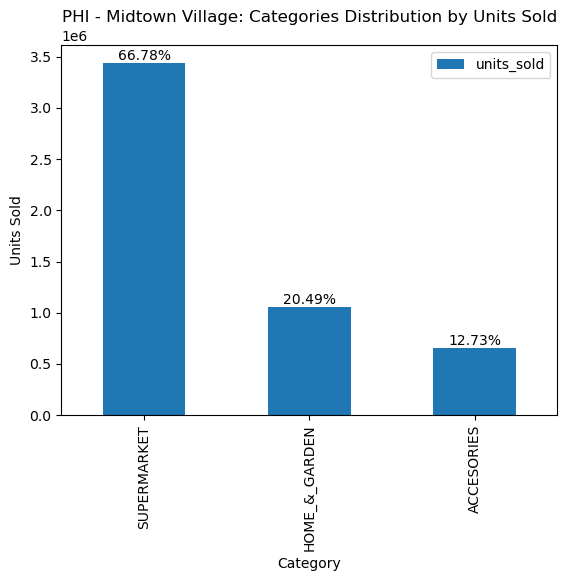

<Figure size 1000x600 with 0 Axes>

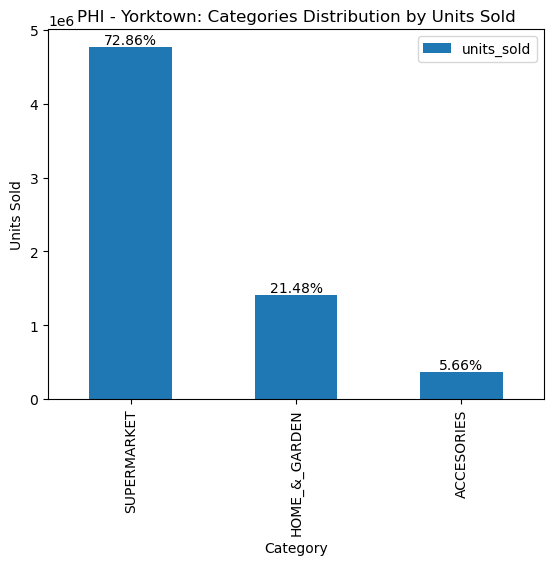

<Figure size 1000x600 with 0 Axes>

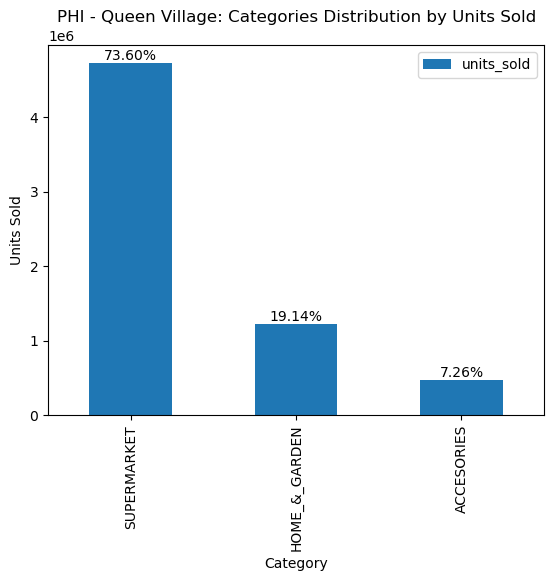

In [72]:
#distribuiçao por categoria por loja
for i in range(len(dataframes)):
    df = dataframes[i]
    name = names[i]
    grouped_df = df.groupby('category')[['units_sold']].sum()
    grouped_df = grouped_df.sort_values(by='units_sold', ascending=False)
    plt.figure(figsize=(10, 6))
    ax = grouped_df.plot(kind='bar', title=f'{name}: Categories Distribution by Units Sold')
    plt.xlabel('Category')
    plt.ylabel('Units Sold')


    for p in ax.patches:
        percentage = f"{p.get_height()/grouped_df['units_sold'].sum()*100:.2f}%"
        ax.annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
            
    plt.show()

<Figure size 1000x600 with 0 Axes>

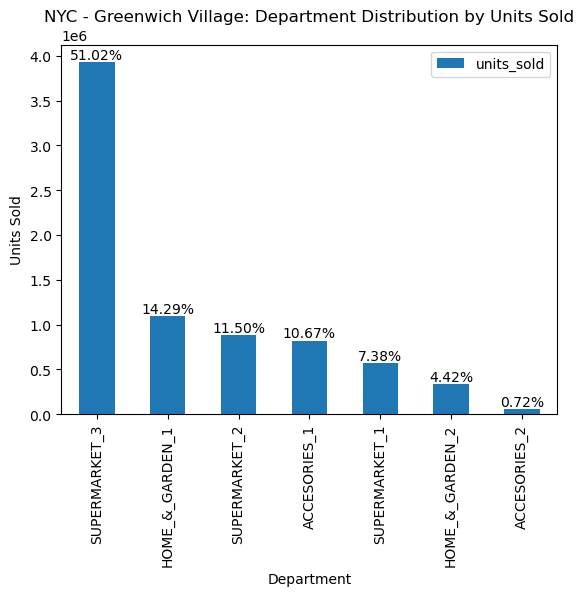

<Figure size 1000x600 with 0 Axes>

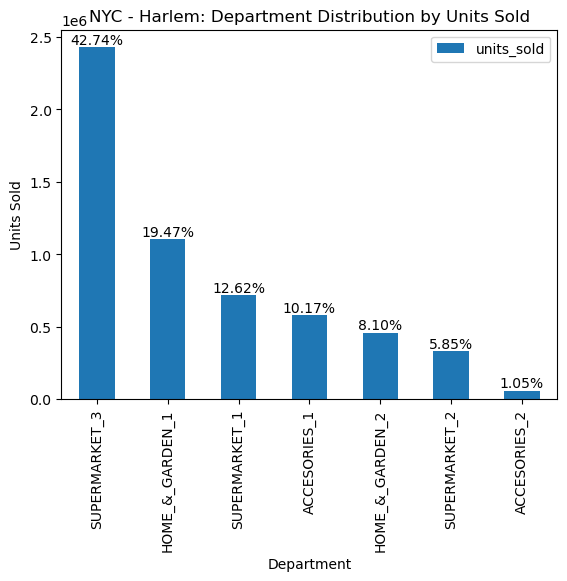

<Figure size 1000x600 with 0 Axes>

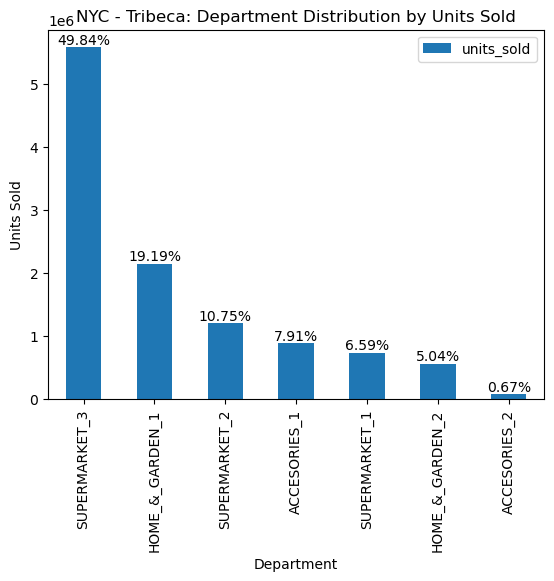

<Figure size 1000x600 with 0 Axes>

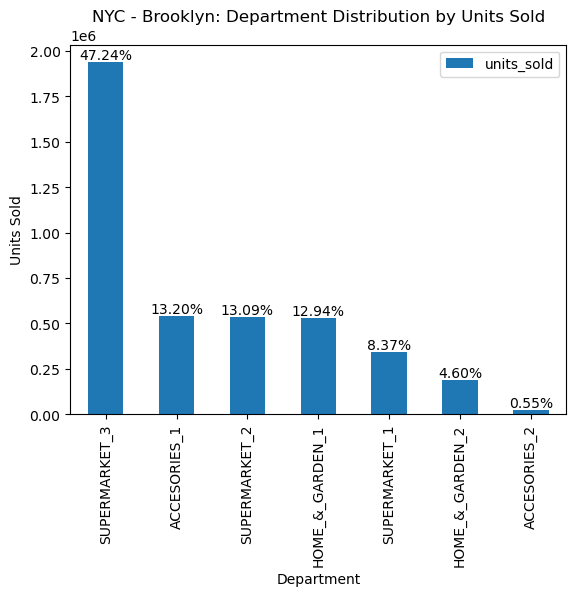

<Figure size 1000x600 with 0 Axes>

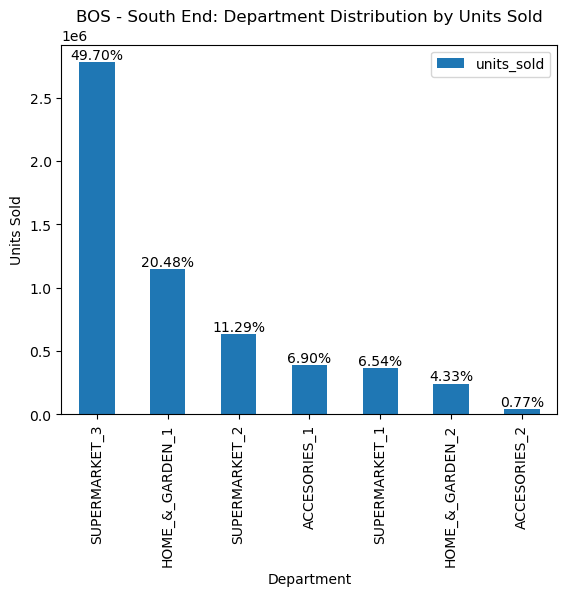

<Figure size 1000x600 with 0 Axes>

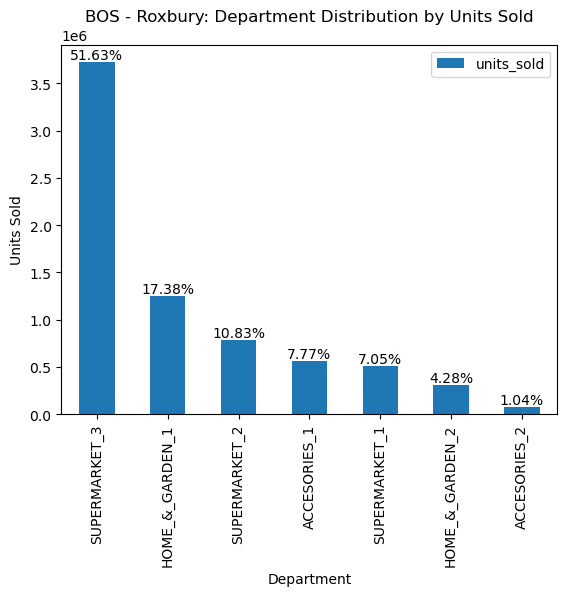

<Figure size 1000x600 with 0 Axes>

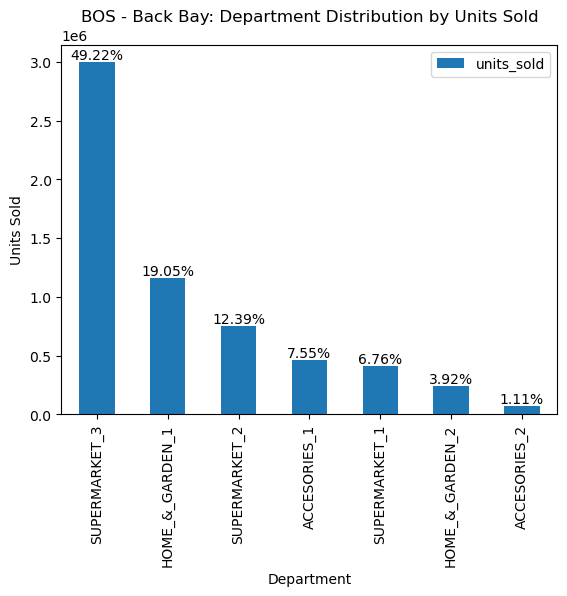

<Figure size 1000x600 with 0 Axes>

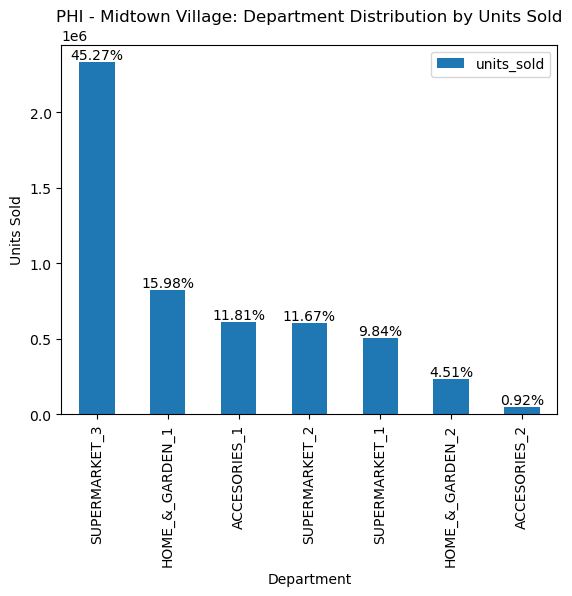

<Figure size 1000x600 with 0 Axes>

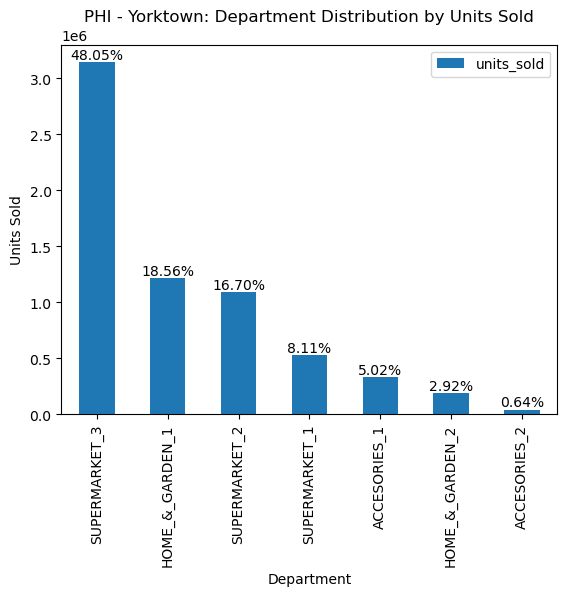

<Figure size 1000x600 with 0 Axes>

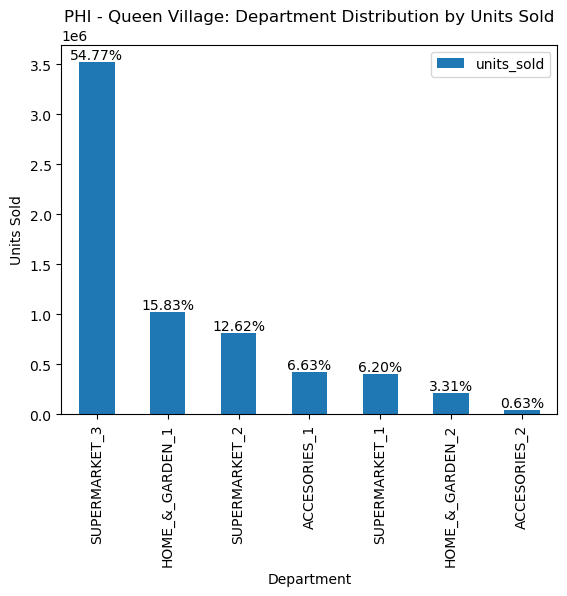

In [74]:
#distribuiçao por departamento por loja
for i in range(len(dataframes)):
    df = dataframes[i]
    name = names[i]
    grouped_df = df.groupby('department')[['units_sold']].sum()
    grouped_df = grouped_df.sort_values(by='units_sold', ascending=False)
    plt.figure(figsize=(10, 6))
    ax = grouped_df.plot(kind='bar', title=f'{name}: Department Distribution by Units Sold')
    plt.xlabel('Department')
    plt.ylabel('Units Sold')


    for p in ax.patches:
        percentage = f"{p.get_height()/grouped_df['units_sold'].sum()*100:.2f}%"
        ax.annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
        
            
    plt.show()


Fazendo abordagem por CIDADE

In [87]:
#Segmentando por cidade
nyc = df[(df['store_code'] == 'NYC_1') | (df['store_code'] == 'NYC_2') | (df['store_code'] == 'NYC_3') | (df['store_code'] == 'NYC_4')]
bos = df[(df['store_code'] == 'BOS_1') | (df['store_code'] == 'BOS_2') | (df['store_code'] == 'BOS_3')]
phi = df[(df['store_code'] == 'PHI_1') | (df['store_code'] == 'PHI_2') | (df['store_code'] == 'PHI_3')]

In [89]:
df_nyc = nyc.groupby('date')['total_sale'].sum()
df_bos = bos.groupby('date')['total_sale'].sum()
df_phi = phi.groupby('date')['total_sale'].sum()

In [91]:
ts_nyc = pd.Series(df_nyc)
ts_bos = pd.Series(df_bos)
ts_phi = pd.Series(df_phi)

Text(0.5, 1.0, 'Sales - PHI')

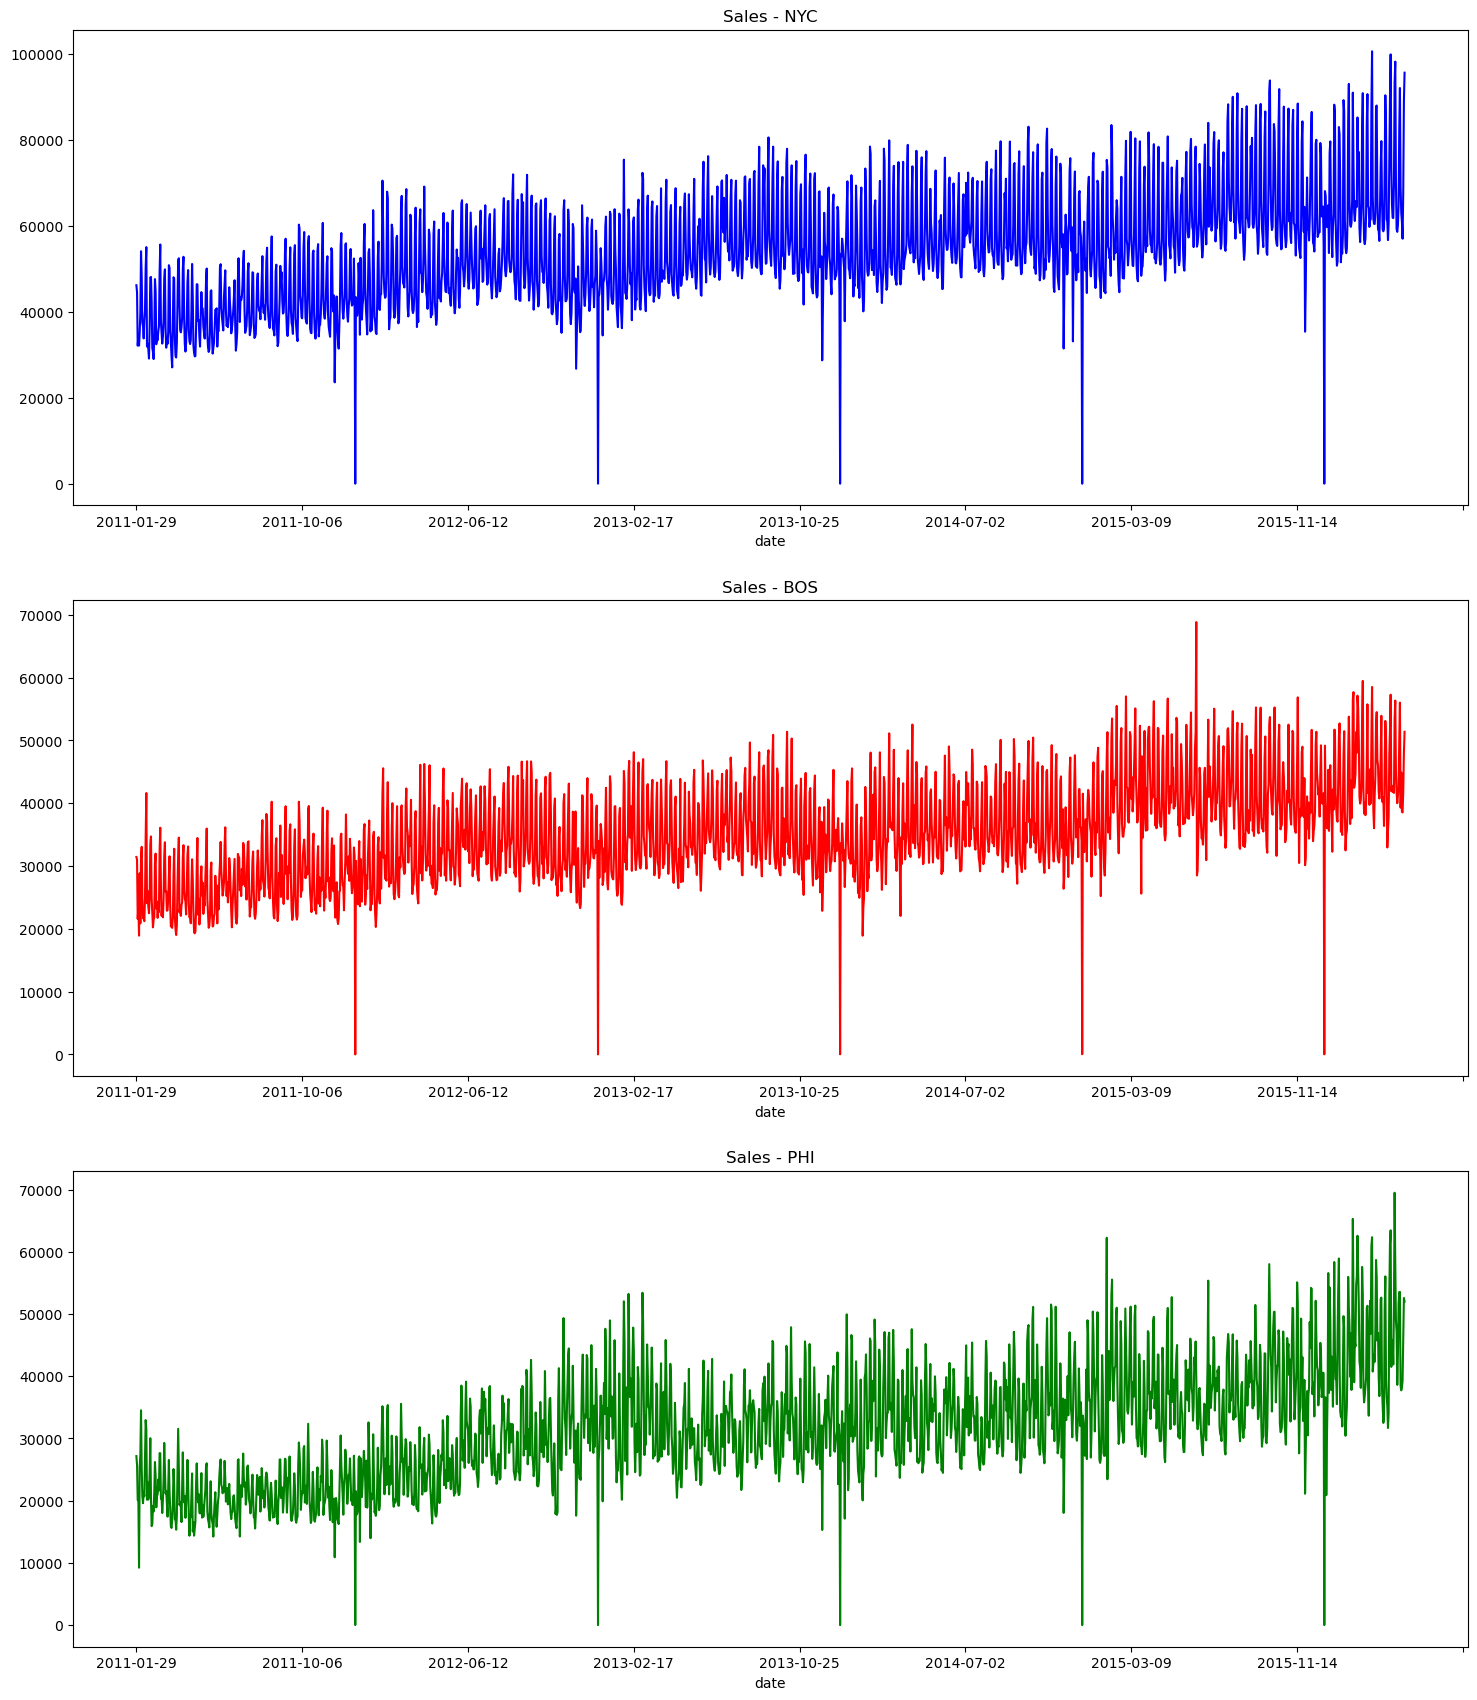

In [93]:
#plotando graficos das vendas em cada cidade
fig, axs = plt.subplots(3, 1, figsize=(18, 21))

ts_nyc.plot(ax=axs[0], color='blue')
axs[0].set_title('Sales - NYC')

ts_bos.plot(ax=axs[1], color='red')
axs[1].set_title('Sales - BOS')

ts_phi.plot(ax=axs[2], color='green')
axs[2].set_title('Sales - PHI')

In [95]:
dataframes_cidades = [nyc, bos, phi]
nomes = ['New York', 'Boston', 'Philadelphia']

<Figure size 1000x600 with 0 Axes>

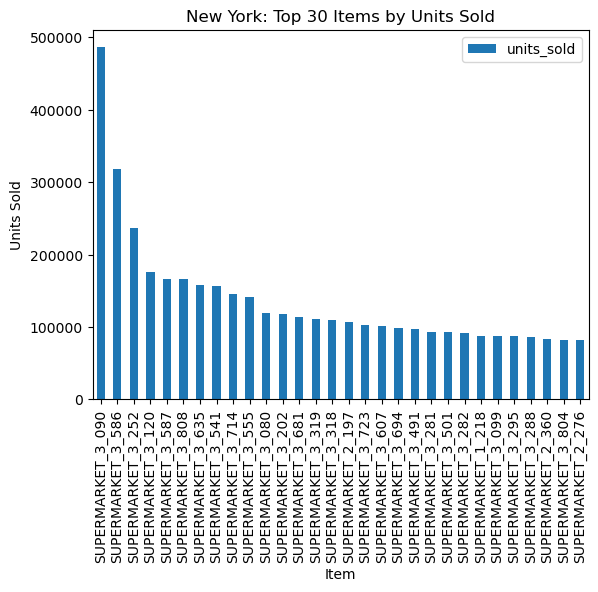

<Figure size 1000x600 with 0 Axes>

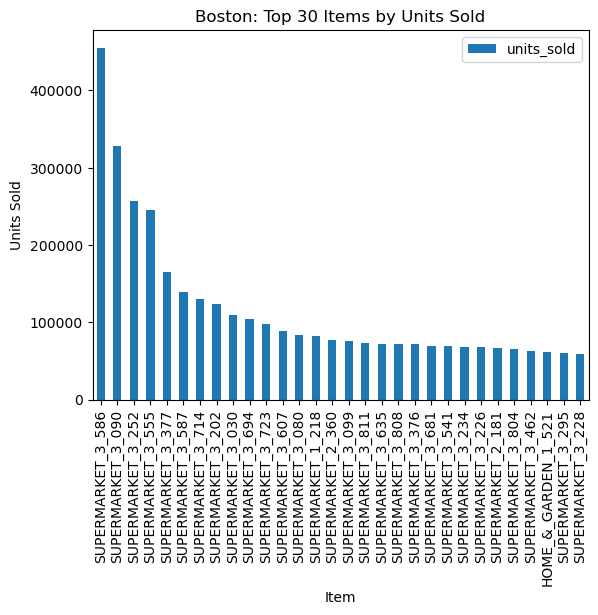

<Figure size 1000x600 with 0 Axes>

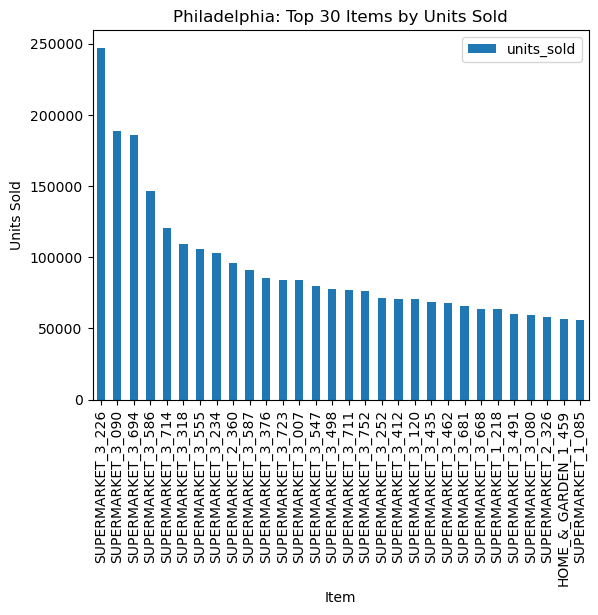

In [97]:
#30 itens mais vendidos por cidade
for i in range(len(dataframes_cidades)):
    df = dataframes_cidades[i]
    name = nomes[i]
    gp_df = df.groupby('item')[['units_sold']].sum()
    gp_df = gp_df.sort_values(by='units_sold', ascending=False)
    plt.figure(figsize=(10, 6))
    gp_df.iloc[0:30,:].plot(kind='bar', title=f'{name}: Top 30 Items by Units Sold')
    plt.xlabel('Item')
    plt.ylabel('Units Sold')
    plt.show()

<Figure size 1000x600 with 0 Axes>

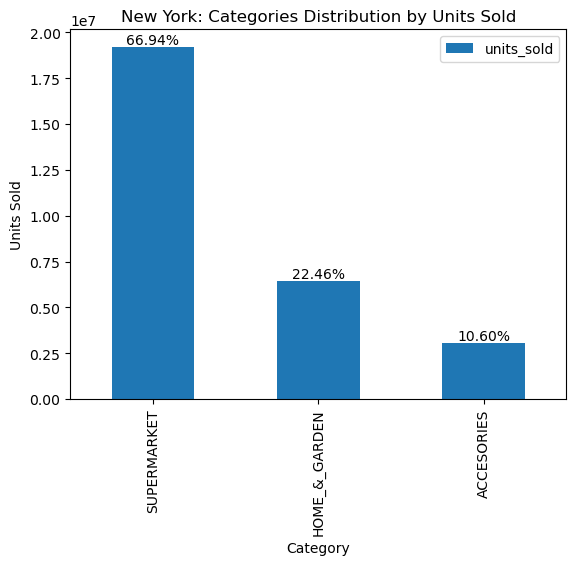

<Figure size 1000x600 with 0 Axes>

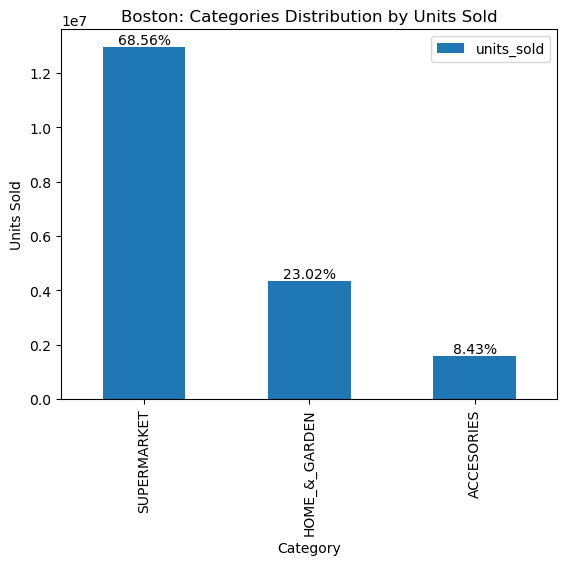

<Figure size 1000x600 with 0 Axes>

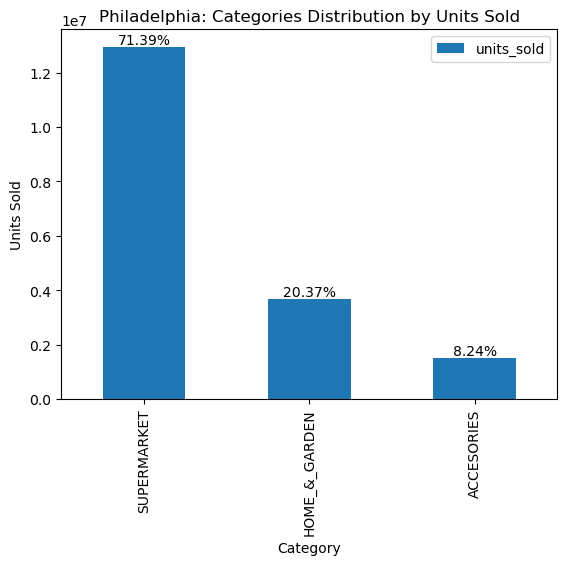

In [99]:
#distribuiçao por categoria por cidade
for i in range(len(dataframes_cidades)):
    df = dataframes_cidades[i]
    name = nomes[i]
    gp_df = df.groupby('category')[['units_sold']].sum()
    gp_df = gp_df.sort_values(by='units_sold', ascending=False)
    plt.figure(figsize=(10, 6))
    ax = gp_df.plot(kind='bar', title=f'{name}: Categories Distribution by Units Sold')
    plt.xlabel('Category')
    plt.ylabel('Units Sold')


    for p in ax.patches:
        percentage = f"{p.get_height()/gp_df['units_sold'].sum()*100:.2f}%"
        ax.annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
            
    plt.show()

<Figure size 1000x600 with 0 Axes>

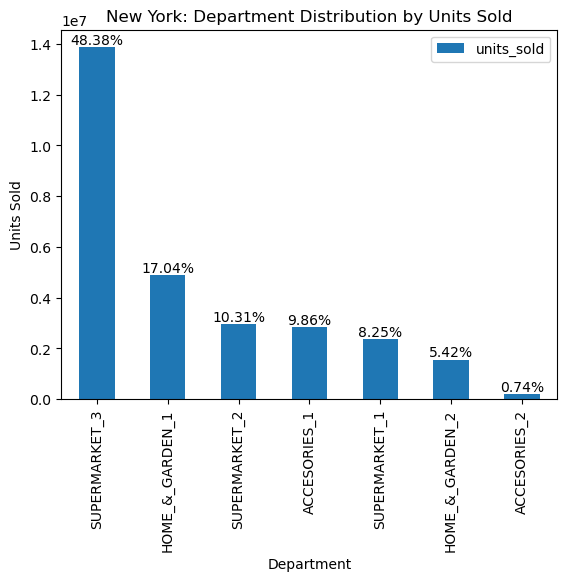

<Figure size 1000x600 with 0 Axes>

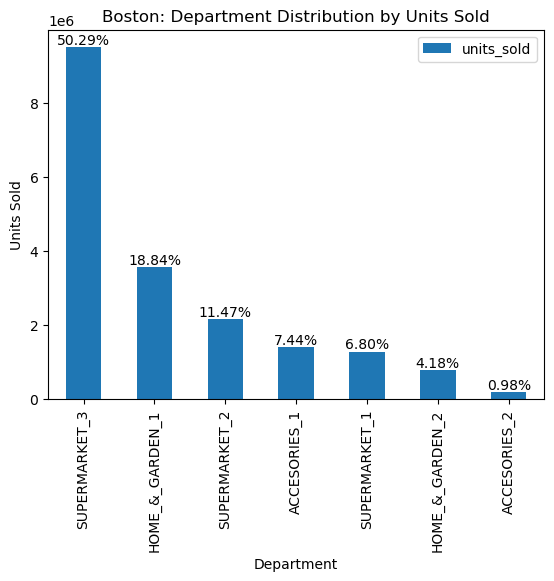

<Figure size 1000x600 with 0 Axes>

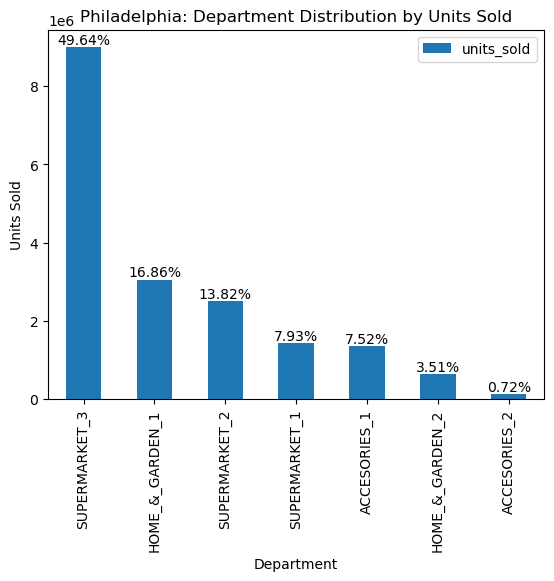

In [101]:
#distribuiçao por departamento por loja
for i in range(len(dataframes_cidades)):
    df = dataframes_cidades[i]
    name = nomes[i]
    gp_df = df.groupby('department')[['units_sold']].sum()
    gp_df = gp_df.sort_values(by='units_sold', ascending=False)
    plt.figure(figsize=(10, 6))
    ax = gp_df.plot(kind='bar', title=f'{name}: Department Distribution by Units Sold')
    plt.xlabel('Department')
    plt.ylabel('Units Sold')


    for p in ax.patches:
        percentage = f"{p.get_height()/gp_df['units_sold'].sum()*100:.2f}%"
        ax.annotate(percentage, (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
        
            
    plt.show()

# Conferindo eventos

In [163]:
events = df.loc[df['event'].notna()]

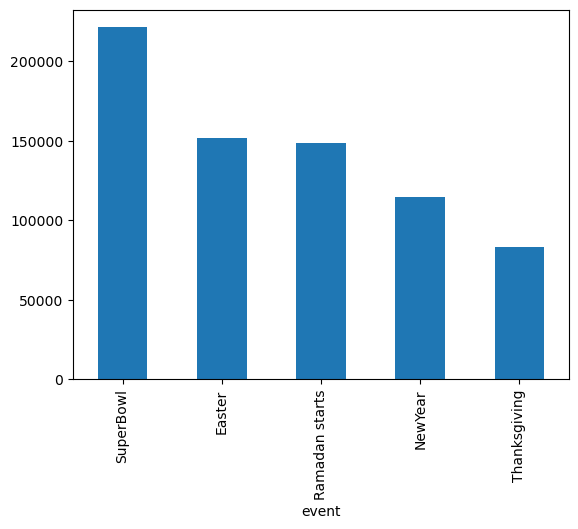

In [194]:
event_types = events.groupby('event')['total_sale'].sum().sort_values(ascending=False).plot(kind='bar')

In [89]:
# Filtrar os dados onde o evento é SuperBowl
superbowl_sales = df[df['event'] == 'SuperBowl']
top_30_products = superbowl_sales.groupby('item')['units_sold'].sum().sort_values(ascending=False).head(30)
top_30_products.plot(kind='bar', title='Top 30 Produtos Mais Vendidos - SuperBowl')



<Axes: title={'center': 'Top 30 Produtos Mais Vendidos - SuperBowl'}, xlabel='item'>

# Encoding e Feature Engineering

In [118]:
df.head()

id              item    category    department  \
0  ACCESORIES_1_001_NYC_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_002_NYC_1  ACCESORIES_1_002  ACCESORIES  ACCESORIES_1   
2  ACCESORIES_1_003_NYC_1  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1   
3  ACCESORIES_1_004_NYC_1  ACCESORIES_1_004  ACCESORIES  ACCESORIES_1   
4  ACCESORIES_1_005_NYC_1  ACCESORIES_1_005  ACCESORIES  ACCESORIES_1   

               store store_code    region  day  units_sold       date  \
0  Greenwich_Village      NYC_1  New York  d_1           0 2011-01-29   
1  Greenwich_Village      NYC_1  New York  d_1           0 2011-01-29   
2  Greenwich_Village      NYC_1  New York  d_1           0 2011-01-29   
3  Greenwich_Village      NYC_1  New York  d_1           0 2011-01-29   
4  Greenwich_Village      NYC_1  New York  d_1           0 2011-01-29   

    weekday  weekday_int  event  sell_price  total_sale  
0  Saturday            1      0   11.015625         0.0  
1  Saturday            1      0    5.281250         0.0  
2  Saturday            1      0    3.949219         0.0  
3  Saturday            1      0    6.023438         0.0  
4  Saturday            1      0    3.910156         0.0

In [120]:
#Vamos salvar as variavesi categoricas que nao são essenciais ao modelo para depois concatenar no final. Salvando como dicionário

d_id = dict(zip(df.id.cat.codes, df.id))
d_item = dict(zip(df.item.cat.codes, df.item))
d_department = dict(zip(df.department.cat.codes, df.department))
d_category = dict(zip(df.category.cat.codes, df.category))
d_store_code = dict(zip(df.store_code.cat.codes, df.store_code))
d_region = dict(zip(df.region.cat.codes, df.region))

In [126]:
# Salvar o dicionário em um arquivo .pkl
with open("d_item.pkl", "wb") as f:
    pickle.dump(d_item, f)

In [121]:
#Fazendo o tratmento da variavel "day", vamos remover o traço entre d_1, d_2 etc
def clean_day_column(df, column_name):
    """
    Remove o prefixo 'd_' da coluna e converte os valores para int16.
    
    """
    df[column_name] = df[column_name].str.replace('d_', '').astype('int16')
    return df

In [124]:
df = clean_day_column(df, 'day')

In [126]:
#Vamos agora dropar a coluna date

df.drop('date',axis=1,inplace=True)

In [128]:
df.head()

id              item    category    department  \
0  ACCESORIES_1_001_NYC_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_002_NYC_1  ACCESORIES_1_002  ACCESORIES  ACCESORIES_1   
2  ACCESORIES_1_003_NYC_1  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1   
3  ACCESORIES_1_004_NYC_1  ACCESORIES_1_004  ACCESORIES  ACCESORIES_1   
4  ACCESORIES_1_005_NYC_1  ACCESORIES_1_005  ACCESORIES  ACCESORIES_1   

               store store_code    region  day  units_sold   weekday  \
0  Greenwich_Village      NYC_1  New York    1           0  Saturday   
1  Greenwich_Village      NYC_1  New York    1           0  Saturday   
2  Greenwich_Village      NYC_1  New York    1           0  Saturday   
3  Greenwich_Village      NYC_1  New York    1           0  Saturday   
4  Greenwich_Village      NYC_1  New York    1           0  Saturday   

   weekday_int  event  sell_price  total_sale  
0            1      0   11.015625         0.0  
1            1      0    5.281250         0.0  
2            1      0    3.949219         0.0  
3            1      0    6.023438         0.0  
4            1      0    3.910156         0.0

In [130]:
#Dropar oluna Weekday (categorica), não faz sentido manter as duas weekday e weekday_int
df.drop('weekday',axis=1,inplace=True)

In [132]:
df.dtypes

id             category
item           category
category       category
department     category
store          category
store_code     category
region         category
day               int16
units_sold        int16
weekday_int        int8
event              int8
sell_price      float16
total_sale      float16
dtype: object

In [134]:
#vamos converter as categorias para os codes
cols = df.dtypes.index.tolist()
types = df.dtypes.values.tolist()
for i,type in enumerate(types):
    if type.name == 'category':
        df[cols[i]] = df[cols[i]].cat.codes

Vamos criar colunas com lag para podermos capturar tendencias de vendas. Para isso vamos pegar lags de 1, 3, 7, 14, 21, 28, 35 dias anteriores

In [137]:
lags = [1,2,3,7,14,21,28,35]
for lag in lags:
    df['sold_lag_' + str(lag)] = df.groupby(['id'])['units_sold'].transform(lambda x: x.shift(lag)).astype(np.float16)

Criando variaveis de media para mapear tendencias

In [139]:
#media de unidades vendidas por item
df['iteam_sold_avg'] = df.groupby('item')['units_sold'].transform('mean').astype(np.float16)

#media de unidades vendidas por regiao
df['region_sold_avg'] = df.groupby('region')['units_sold'].transform('mean').astype(np.float16)

#media de unidades vendidas por cada loja
df['store_sold_avg'] = df.groupby('store_code')['units_sold'].transform('mean').astype(np.float16)

#media de unidades vendidas por categoria de produto
df['cat_sold_avg'] = df.groupby('category')['units_sold'].transform('mean').astype(np.float16)

#media de unidades vendidas por departamento
df['dept_sold_avg'] = df.groupby('department')['units_sold'].transform('mean').astype(np.float16)

#Media de unidades vendidas por categoria e departamento
df['cat_dept_sold_avg'] = df.groupby(['category','department'])['units_sold'].transform('mean').astype(np.float16)

#media de unidades vendidas segmentando por loja e item
df['store_item_sold_avg'] = df.groupby(['store_code','item'])['units_sold'].transform('mean').astype(np.float16)

#media de unidades vendidas segmentando por categoria e item
df['cat_item_sold_avg'] = df.groupby(['category','item'])['units_sold'].transform('mean').astype(np.float16)

#media de unidades vendidas segmentando por departamento e item
df['dept_item_sold_avg'] = df.groupby(['department','item'])['units_sold'].transform('mean').astype(np.float16)

#media de unidades vendidas segmentando por região e loja
df['state_store_sold_avg'] = df.groupby(['region','store_code'])['units_sold'].transform('mean').astype(np.float16)

#media de unidades vendidas segmentando por região, loja e categoria
df['state_store_cat_sold_avg'] = df.groupby(['region','store_code','category'])['units_sold'].transform('mean').astype(np.float16)

#media de unidades vendidas segmentando por loja, categoria e departamento
df['store_cat_dept_sold_avg'] = df.groupby(['store_code','category','department'])['units_sold'].transform('mean').astype(np.float16)


In [141]:
df.head(10)

id  item  category  department  store  store_code  region  day  units_sold  \
0   3     0         0           0      2           3       1    1           0   
1  13     1         0           0      2           3       1    1           0   
2  23     2         0           0      2           3       1    1           0   
3  33     3         0           0      2           3       1    1           0   
4  43     4         0           0      2           3       1    1           0   
5  53     5         0           0      2           3       1    1           0   
6  63     6         0           0      2           3       1    1           0   
7  73     7         0           0      2           3       1    1          12   
8  83     8         0           0      2           3       1    1           2   
9  93     9         0           0      2           3       1    1           0   

   weekday_int  ...  store_sold_avg  cat_sold_avg  dept_sold_avg  \
0            1  ...        1.320312      0.566895       0.703125   
1            1  ...        1.320312      0.566895       0.703125   
2            1  ...        1.320312      0.566895       0.703125   
3            1  ...        1.320312      0.566895       0.703125   
4            1  ...        1.320312      0.566895       0.703125   
5            1  ...        1.320312      0.566895       0.703125   
6            1  ...        1.320312      0.566895       0.703125   
7            1  ...        1.320312      0.566895       0.703125   
8            1  ...        1.320312      0.566895       0.703125   
9            1  ...        1.320312      0.566895       0.703125   

   cat_dept_sold_avg  store_item_sold_avg  cat_item_sold_avg  \
0           0.703125             0.313721           0.213989   
1           0.703125             0.257812           0.264404   
2           0.703125             0.150513           0.075012   
3           0.703125             1.718750           2.046875   
4           0.703125             0.966309           0.764160   
5           0.703125             0.858398           0.683105   
6           0.703125             0.221680           0.157593   
7           0.703125             7.230469           4.582031   
8           0.703125             1.186523           0.818359   
9           0.703125             0.719238           0.610840   

   dept_item_sold_avg  state_store_sold_avg  state_store_cat_sold_avg  \
0            0.213989              1.320312                  0.811035   
1            0.264404              1.320312                  0.811035   
2            0.075012              1.320312                  0.811035   
3            2.046875              1.320312                  0.811035   
4            0.764160              1.320312                  0.811035   
5            0.683105              1.320312                  0.811035   
6            0.157593              1.320312                  0.811035   
7            4.582031              1.320312                  0.811035   
8            0.818359              1.320312                  0.811035   
9            0.610840              1.320312                  0.811035   

   store_cat_dept_sold_avg  
0                 1.032227  
1                 1.032227  
2                 1.032227  
3                 1.032227  
4                 1.032227  
5                 1.032227  
6                 1.032227  
7                 1.032227  
8                 1.032227  
9                 1.032227  

[10 rows x 33 columns]

In [143]:
#Rolling window statistics (media movel) das vendas agrupadas por item, categoria, departamento, loja e regiao
agrupamento = df.groupby(['item', 'category', 'department', 'store_code', 'region'])['units_sold']

df['rolling_sold_mean'] = agrupamento.transform(lambda x: x.rolling(window=7).mean()).astype(np.float16)

In [145]:
#Expanding rolling window (media expansiva) das vendas agrupadas por item, categoria, departamento, loja e regiao
agrupamento_1 = df.groupby(['item', 'category', 'department', 'store_code', 'region'])['units_sold']

df['expanding_sold_mean'] = agrupamento_1.transform(lambda x: x.expanding(2).mean()).astype(np.float16)

In [147]:
# Calcular a tendência diretamente em uma única linha
df['selling_trend'] = (
    df.groupby(['item', 'category', 'department', 'store_code', 'region', 'day'])['units_sold'].transform('mean') -
    df.groupby(['item', 'category', 'department', 'store_code', 'region'])['units_sold'].transform('mean')
).astype(np.float16)


In [151]:
#começar no dia 35 pois os lags inserem valores nulos no df
df = df[df['day']>=35]

In [153]:
df.head()

id  item  category  department  store  store_code  region  day  \
1036660   3     0         0           0      2           3       1   35   
1036661  13     1         0           0      2           3       1   35   
1036662  23     2         0           0      2           3       1   35   
1036663  33     3         0           0      2           3       1   35   
1036664  43     4         0           0      2           3       1   35   

         units_sold  weekday_int  ...  cat_dept_sold_avg  store_item_sold_avg  \
1036660           0            7  ...           0.703125             0.313721   
1036661           0            7  ...           0.703125             0.257812   
1036662           0            7  ...           0.703125             0.150513   
1036663           0            7  ...           0.703125             1.718750   
1036664           0            7  ...           0.703125             0.966309   

         cat_item_sold_avg  dept_item_sold_avg  state_store_sold_avg  \
1036660           0.213989            0.213989              1.320312   
1036661           0.264404            0.264404              1.320312   
1036662           0.075012            0.075012              1.320312   
1036663           2.046875            2.046875              1.320312   
1036664           0.764160            0.764160              1.320312   

         state_store_cat_sold_avg  store_cat_dept_sold_avg  rolling_sold_mean  \
1036660                  0.811035                 1.032227                0.0   
1036661                  0.811035                 1.032227                0.0   
1036662                  0.811035                 1.032227                0.0   
1036663                  0.811035                 1.032227                0.0   
1036664                  0.811035                 1.032227                0.0   

         expanding_sold_mean  selling_trend  
1036660                  0.0      -0.313721  
1036661                  0.0      -0.257812  
1036662                  0.0      -0.150513  
1036663                  0.0      -1.718750  
1036664                  0.0      -0.966309  

[5 rows x 36 columns]

In [155]:
#codigos das lojas para rodar o modelo por loja
print(d_store_code)

{3: 'NYC_1', 4: 'NYC_2', 5: 'NYC_3', 6: 'NYC_4', 0: 'BOS_1', 1: 'BOS_2', 2: 'BOS_3', 7: 'PHI_1', 8: 'PHI_2', 9: 'PHI_3'}


In [157]:
#codigos das regioes para rodar o modelo por cidade
print(d_region)

{1: 'New York', 0: 'Boston', 2: 'Philadelphia'}


In [117]:
#salvando no formato pickle para economizar memoria
df.to_pickle('data.pkl')
del df

# Modelo LightGBM

In [8]:
data = pd.read_pickle('data.pkl')

In [74]:
#Vamos separar os arquivos para treino por loja, melhorar a vizualização
#(data[data['store_code']== 0]).to_pickle('boston1.pkl')
#(data[data['store_code']== 1]).to_pickle('boston2.pkl')
#(data[data['store_code']== 2]).to_pickle('boston3.pkl')
#(data[data['store_code']== 3]).to_pickle('nyc1.pkl')
#(data[data['store_code']== 4]).to_pickle('nyc2.pkl')
#(data[data['store_code']== 5]).to_pickle('nyc3.pkl')
#(data[data['store_code']== 6]).to_pickle('nyc4.pkl')
#(data[data['store_code']== 7]).to_pickle('phi1.pkl')
#(data[data['store_code']== 8]).to_pickle('phi2.pkl')
#(data[data['store_code']== 9]).to_pickle('phi3.pkl')

In [5]:
data.head()

id  item  category  department  store  store_code  region  day  \
1036660   3     0         0           0      2           3       1   35   
1036661  13     1         0           0      2           3       1   35   
1036662  23     2         0           0      2           3       1   35   
1036663  33     3         0           0      2           3       1   35   
1036664  43     4         0           0      2           3       1   35   

         units_sold  weekday_int  ...  cat_dept_sold_avg  store_item_sold_avg  \
1036660           0            7  ...           0.703125             0.313721   
1036661           0            7  ...           0.703125             0.257812   
1036662           0            7  ...           0.703125             0.150513   
1036663           0            7  ...           0.703125             1.718750   
1036664           0            7  ...           0.703125             0.966309   

         cat_item_sold_avg  dept_item_sold_avg  state_store_sold_avg  \
1036660           0.213989            0.213989              1.320312   
1036661           0.264404            0.264404              1.320312   
1036662           0.075012            0.075012              1.320312   
1036663           2.046875            2.046875              1.320312   
1036664           0.764160            0.764160              1.320312   

         state_store_cat_sold_avg  store_cat_dept_sold_avg  rolling_sold_mean  \
1036660                  0.811035                 1.032227                0.0   
1036661                  0.811035                 1.032227                0.0   
1036662                  0.811035                 1.032227                0.0   
1036663                  0.811035                 1.032227                0.0   
1036664                  0.811035                 1.032227                0.0   

         expanding_sold_mean  selling_trend  
1036660                  0.0      -0.313721  
1036661                  0.0      -0.257812  
1036662                  0.0      -0.150513  
1036663                  0.0      -1.718750  
1036664                  0.0      -0.966309  

[5 rows x 36 columns]

In [8]:
data.shape

(57290710, 36)

In [373]:
#Dropando ID, uma vez que os dados ja estao segmentados por loja
data = data.drop('id', axis=1)

KeyError: "['id'] not found in axis"

# BOS_1

In [292]:
df_b1 = data[data['store_code']== 0]

# Conjunto de treino
X_train = df_b1[df_b1['day'] < 1565].drop('units_sold', axis=1)
y_train = df_b1[df_b1['day'] < 1565]['units_sold']

# Conjunto de validação
X_valid = df_b1[(df_b1['day'] >= 1565) & (df_b1['day'] < 1884)].drop('units_sold', axis=1)
y_valid = df_b1[(df_b1['day'] >= 1565) & (df_b1['day'] < 1884)]['units_sold']

# Conjunto de teste
X_test = df_b1[df_b1['day'] >= 1884].drop('units_sold', axis=1)
y_test = df_b1[df_b1['day'] >= 1884]['units_sold']

In [300]:
#Modelo BOS_1
modelo_b1 = LGBMRegressor()

#Parametros
param_grid = {
    #'learning_rate': [0.01, 0.05, 0.1],
    #'n_estimators': [500, 1000, 1500],
    #'max_depth': [6, 8, 10],
    #'num_leaves': [31, 50, 70],
    #'min_child_weight': [50, 70, 100],
    #'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

# Configurar o GridSearchCV
grid_search_b1 = GridSearchCV(
    estimator=modelo_b1,
    param_grid=param_grid,
    cv=tscv,  # Usando TimeSeriesSplit para validação cruzada
    scoring='neg_root_mean_squared_error',  # Avaliação com RMSE
    verbose=1,
)

In [302]:
grid_search_b1.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3544
[LightGBM] [Info] Number of data points in the train set: 777495, number of used features: 28
[LightGBM] [Info] Start training from score 0.782674
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3521
[LightGBM] [Info] Number of data points in the train set: 1554990, number of used features: 28
[LightGBM] [Info] Start training from score 0.848210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057447 seconds.
You can set `force_ro

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [278]:
# Exibir os melhores parâmetros encontrados learning_rate e n_estimators
print("Melhores parâmetros:", grid_search_b1.best_params_)

Melhores parâmetros: {'learning_rate': 0.01, 'n_estimators': 1500}


In [290]:
# Exibir os melhores parâmetros encontrados max_depth e num_leaves
print("Melhores parâmetros:", grid_search_b1.best_params_)

Melhores parâmetros: {'max_depth': 8, 'num_leaves': 50}


In [298]:
# Exibir os melhores parâmetros encontrados min_child_weight e subsample
print("Melhores parâmetros:", grid_search_b1.best_params_)

Melhores parâmetros: {'min_child_weight': 50, 'subsample': 0.6}


In [304]:
# Exibir os melhores parâmetros encontrados colsample_bytree
print("Melhores parâmetros:", grid_search_b1.best_params_)

Melhores parâmetros: {'colsample_bytree': 1.0}


In [306]:
model_b1 = LGBMRegressor(
    n_estimators=1500,
    learning_rate=0.01,
    subsample=0.6,
    colsample_bytree=1.0,
    max_depth=8,
    num_leaves=50,
    min_child_weight=50
    )

In [308]:
model_b1.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_valid,y_valid)],
             eval_metric='rmse')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.129008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3500
[LightGBM] [Info] Number of data points in the train set: 4664970, number of used features: 32
[LightGBM] [Info] Start training from score 0.945537
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(learning_rate=0.01, max_depth=8, min_child_weight=50,
              n_estimators=1500, num_leaves=50, subsample=0.6)

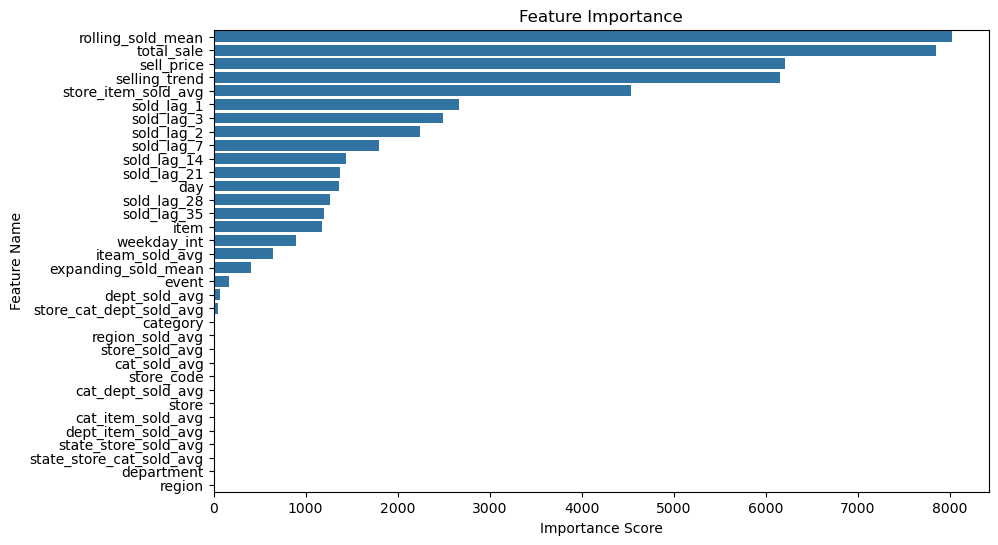

In [310]:
# Calculate feature importance using the model's feature_importances_ attribute
feature_importances = model_b1.feature_importances_

# Create a dataframe with feature names and importance scores
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

In [312]:
y_pred = model_b1.predict(X_valid)

In [314]:
# MSE
mse = mean_squared_error(y_valid, y_pred)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.28


In [316]:
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.04


## Avaliando a performance do test set em BOS_1

In [319]:
#fazendo predict do restante da base de dados
y_pred_test = model_b1.predict(X_test)

In [321]:
# MSE Test set
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculando o RMSE test set
rmse_test = mse ** 0.5

print(f"Root Mean Squared Error (RMSE) Test set: {rmse_test:.2f}")

Root Mean Squared Error (RMSE) Test set: 0.28


In [323]:
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")

Mean Absolute Error (MAE): 0.04


## Previsao de 28 dias futuros

In [326]:
X_recent = df_b1[df_b1['day'] <= 1913].drop('units_sold', axis=1)

In [328]:
# Lista para armazenar todas as previsões de 28 dias por item
future_predictions = []

# Itera sobre cada item único no dataset
for item in df_b1['item'].unique():
    # Seleciona os dados para o item atual até o último dia conhecido (1913)
    X_recent = df_b1[(df_b1['item'] == item) & (df_b1['day'] <= 1913)].copy()

    # Remove a coluna target 'units_sold' das features
    X_recent = X_recent.drop(columns=['units_sold'])

    # Lista para armazenar previsões temporárias
    temp_predictions = []
    
    for day in range(1, 29):  # Prever 28 dias
        # Atualizar lags para o dia atual com base nas previsões ou valores históricos
        for lag in [1, 2, 3, 7, 14, 21, 28, 35]:
            if len(temp_predictions) >= lag:
                X_recent[f'sold_lag_{lag}'] = temp_predictions[-lag]
            else:
                X_recent[f'sold_lag_{lag}'] = X_recent[f'sold_lag_{lag}'].iloc[-1]
        
        # Atualizar médias e agregações baseadas em previsões recentes
        if len(temp_predictions) > 0:
            X_recent['iteam_sold_avg'] = (
                sum(temp_predictions[-7:]) / len(temp_predictions[-7:]) 
                if len(temp_predictions) >= 7 else X_recent['iteam_sold_avg'].iloc[-1]
            )
            X_recent['region_sold_avg'] = (
                sum(temp_predictions[-7:]) / len(temp_predictions[-7:]) 
                if len(temp_predictions) >= 7 else X_recent['region_sold_avg'].iloc[-1]
            )
            X_recent['store_sold_avg'] = (
                sum(temp_predictions[-7:]) / len(temp_predictions[-7:]) 
                if len(temp_predictions) >= 7 else X_recent['store_sold_avg'].iloc[-1]
            )
            X_recent['cat_sold_avg'] = (
                sum(temp_predictions[-7:]) / len(temp_predictions[-7:]) 
                if len(temp_predictions) >= 7 else X_recent['cat_sold_avg'].iloc[-1]
            )
            X_recent['dept_sold_avg'] = (
                sum(temp_predictions[-7:]) / len(temp_predictions[-7:]) 
                if len(temp_predictions) >= 7 else X_recent['dept_sold_avg'].iloc[-1]
            )

        # Atualizar as médias de vendas por combinação de categorias
        if len(temp_predictions) > 0:
            X_recent['cat_dept_sold_avg'] = (
                sum(temp_predictions[-7:]) / len(temp_predictions[-7:]) 
                if len(temp_predictions) >= 7 else X_recent['cat_dept_sold_avg'].iloc[-1]
            )
            X_recent['store_item_sold_avg'] = (
                sum(temp_predictions[-7:]) / len(temp_predictions[-7:]) 
                if len(temp_predictions) >= 7 else X_recent['store_item_sold_avg'].iloc[-1]
            )
            X_recent['cat_item_sold_avg'] = (
                sum(temp_predictions[-7:]) / len(temp_predictions[-7:]) 
                if len(temp_predictions) >= 7 else X_recent['cat_item_sold_avg'].iloc[-1]
            )
            X_recent['dept_item_sold_avg'] = (
                sum(temp_predictions[-7:]) / len(temp_predictions[-7:]) 
                if len(temp_predictions) >= 7 else X_recent['dept_item_sold_avg'].iloc[-1]
            )
            X_recent['state_store_sold_avg'] = (
                sum(temp_predictions[-7:]) / len(temp_predictions[-7:]) 
                if len(temp_predictions) >= 7 else X_recent['state_store_sold_avg'].iloc[-1]
            )
            X_recent['state_store_cat_sold_avg'] = (
                sum(temp_predictions[-7:]) / len(temp_predictions[-7:]) 
                if len(temp_predictions) >= 7 else X_recent['state_store_cat_sold_avg'].iloc[-1]
            )
            X_recent['store_cat_dept_sold_avg'] = (
                sum(temp_predictions[-7:]) / len(temp_predictions[-7:]) 
                if len(temp_predictions) >= 7 else X_recent['store_cat_dept_sold_avg'].iloc[-1]
            )

        # Atualizar médias móveis e expandindo média de vendas
        X_recent['rolling_sold_mean'] = (
            sum(temp_predictions[-7:]) / len(temp_predictions[-7:])
            if len(temp_predictions) >= 7 else X_recent['rolling_sold_mean'].iloc[-1]
        )
        X_recent['expanding_sold_mean'] = (
            sum(temp_predictions) / len(temp_predictions)
            if len(temp_predictions) > 0 else X_recent['expanding_sold_mean'].iloc[-1]
        )

        # Atualizar a tendência de vendas
        X_recent['selling_trend'] = X_recent['rolling_sold_mean'] - X_recent['expanding_sold_mean']
        
        # Previsão para o dia atual usando o modelo
        day_prediction = model_b1.predict(X_recent.tail(1))  # Previsão para o último dia em X_recent
        temp_predictions.append(day_prediction[0])  # Adiciona a previsão para os próximos dias

        # Não adiciona a coluna `units_sold` ao `X_recent`, apenas mantém as previsões no `temp_predictions`

    # Adiciona as previsões de 28 dias para o item atual à lista geral
    future_predictions.append(pd.DataFrame({
        'item': item,
        'day': list(range(1914, 1942)),
        'units_sold_pred': temp_predictions
    }))

# Concatena todas as previsões de cada item em um único dataframe
future_predictions_df = pd.concat(future_predictions, ignore_index=True)


In [330]:
future_predictions_df.head()

item   day  units_sold_pred
0     0  1914         0.892167
1     0  1915         0.033885
2     0  1916         0.857999
3     0  1917         0.023376
4     0  1918         0.870291

In [332]:
#convertando os numeros para codigo dos itens salvos no dict d_item
with open("d_item.pkl", "rb") as f:
    d_item = pickle.load(f)

future_predictions_df['item'] = future_predictions_df['item'].map(d_item)

In [334]:
pivot_pred28_bos1 = future_predictions_df.pivot_table(
    index='item',       # Índice da tabela pivotada será o item
    columns='day',      # Cada dia futuro será uma coluna
    values='units_sold_pred'  # Valores são as previsões de 'units_sold_pred'
)


In [336]:
pivot_pred28_bos1.head(10)

day                   1914      1915      1916      1917      1918      1919  \
item                                                                           
ACCESORIES_1_001  0.892167  0.033885  0.857999  0.023376  0.870291  0.852528   
ACCESORIES_1_002  0.850196  0.024138  0.020703  0.020703  0.020703  0.020703   
ACCESORIES_1_003  0.020703  0.020703  0.020703  0.020703  0.020703  0.020703   
ACCESORIES_1_004  0.138818  1.649610  0.181804  1.544148  0.181804  0.180822   
ACCESORIES_1_005  2.063374  0.196757  0.989664  0.988504  0.984625  0.984280   
ACCESORIES_1_006  0.021253  0.879516  0.021253  0.021253  0.850747  0.021253   
ACCESORIES_1_007  0.878965  0.031973  0.020703  0.020703  0.850196  0.020703   
ACCESORIES_1_008  0.655754  2.489974  1.558932  2.551120  1.208513  1.188516   
ACCESORIES_1_009  0.024201  0.892718  0.870842  0.023927  0.870842  0.853079   
ACCESORIES_1_010  0.022700  0.892625  0.022280  0.869956  0.022280  0.857664   

day                   1920      1921      1922      1923  ...      1932  \
item                                                      ...             
ACCESORIES_1_001  0.023376  0.349539  0.022700  0.108359  ...  0.020703   
ACCESORIES_1_002  0.020703  0.346656  0.020703  0.020703  ...  0.020703   
ACCESORIES_1_003  0.020703  0.315482  0.850196  0.850196  ...  0.980996   
ACCESORIES_1_004  1.560009  0.370701  0.882105  0.044748  ...  0.020703   
ACCESORIES_1_005  0.984280  0.666950  0.083387  0.060109  ...  0.020703   
ACCESORIES_1_006  0.021253  0.347207  0.850747  0.021253  ...  0.893070   
ACCESORIES_1_007  0.020703  0.347207  0.020703  0.020703  ...  0.020703   
ACCESORIES_1_008  1.188516  0.992244  1.708281  0.282472  ...  0.024138   
ACCESORIES_1_009  0.023927  0.349539  0.858969  0.853079  ...  0.883479   
ACCESORIES_1_010  0.022280  0.348233  0.851773  0.108359  ...  0.888226   

day                   1933      1934      1935      1936      1937      1938  \
item                                                                           
ACCESORIES_1_001  0.020703  0.020703  0.020703  0.020703  0.020703  0.020703   
ACCESORIES_1_002  0.020703  0.020703  0.020703  0.020703  0.020703  0.020703   
ACCESORIES_1_003  0.981337  0.983346  0.975104  1.019338  1.019338  1.034869   
ACCESORIES_1_004  0.020703  0.020703  0.020703  0.020703  0.020703  0.020703   
ACCESORIES_1_005  0.020703  0.020703  0.020703  0.020703  0.020703  0.020703   
ACCESORIES_1_006  0.887884  0.942671  0.942671  0.960023  0.973095  0.973095   
ACCESORIES_1_007  0.020703  0.020703  0.020703  0.020703  0.020703  0.020703   
ACCESORIES_1_008  0.023157  0.023157  0.021738  0.021738  0.021738  0.021738   
ACCESORIES_1_009  0.883479  0.883479  0.920174  0.920174  0.920174  0.937185   
ACCESORIES_1_010  0.943013  0.943287  0.960297  0.973369  0.973369  0.973369   

day                   1939      1940      1941  
item                                            
ACCESORIES_1_001  0.020703  0.020703  0.020703  
ACCESORIES_1_002  0.020703  0.020703  0.020703  
ACCESORIES_1_003  1.034869  1.066252  1.066252  
ACCESORIES_1_004  0.020703  0.020703  0.020703  
ACCESORIES_1_005  0.020703  0.020703  0.020703  
ACCESORIES_1_006  0.973095  0.975378  0.975378  
ACCESORIES_1_007  0.020703  0.020703  0.020703  
ACCESORIES_1_008  0.021464  0.021464  0.021464  
ACCESORIES_1_009  0.950257  0.950257  0.950257  
ACCESORIES_1_010  0.975378  0.975378  0.975378  

[10 rows x 28 columns]

## Testando reduzir features

Aparentemente temos features com menos importância ou nenhuma importância no modelo acima. Testamos dropar estas features para reduzir a complexidade do modelo e ver a performance.

In [338]:
db1 = data[data['store_code']== 0]

In [340]:
db1 = db1.drop(['event', 'dept_item_sold_avg', 'category', 'department', 
                'cat_sold_avg', 'region_sold_avg', 
                'store', 'state_store_sold_avg', 'state_store_cat_sold_avg', 
                'store_code', 'region', 'store_sold_avg'], 
               axis=1)

In [342]:
# Conjunto de treino
X_train1 = db1[db1['day'] < 1565].drop('units_sold', axis=1)
y_train1 = db1[db1['day'] < 1565]['units_sold']

# Conjunto de validação
X_valid1 = db1[(db1['day'] >= 1565) & (db1['day'] < 1884)].drop('units_sold', axis=1)
y_valid1 = db1[(db1['day'] >= 1565) & (db1['day'] < 1884)]['units_sold']

# Conjunto de teste
X_test1 = db1[db1['day'] >= 1884].drop('units_sold', axis=1)
y_test1 = db1[db1['day'] >= 1884]['units_sold']

In [344]:
model_b1 = LGBMRegressor(
    n_estimators=1500,
    learning_rate=0.01,
    subsample=0.6,
    colsample_bytree=1.0,
    max_depth=8,
    num_leaves=50,
    min_child_weight=50
    )

In [346]:
model_bos1.fit(X_train1, y_train1, eval_set=[(X_train1,y_train1),(X_valid1,y_valid1)],
             eval_metric='rmse')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.117954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3472
[LightGBM] [Info] Number of data points in the train set: 4664970, number of used features: 23
[LightGBM] [Info] Start training from score 0.945537
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.3, max_depth=8,
              min_child_weight=300, n_estimators=1000, num_leaves=50,
              subsample=0.8)

In [348]:
y_pred1 = model_bos1.predict(X_valid1)

In [350]:
# MSE
mse = mean_squared_error(y_valid1, y_pred1)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.30


In [352]:
mae = mean_absolute_error(y_valid1, y_pred1)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.05


Após o drop, vemos que o modelos teve uma leve piora no erro, onde o RMSE passou de 0.28 para 0.30 e o MAE passou de 0.04 para 0.05. 

# BOS_2

Vamos treinar agora para a loja BOS_2

In [377]:
df_b2 = data[data['store_code']== 1]

# Conjunto de treino
X_train_2 = df_b2[df_b2['day'] < 1565].drop('units_sold', axis=1)
y_train_2 = df_b2[df_b2['day'] < 1565]['units_sold']

# Conjunto de validação
X_valid_2 = df_b2[(df_b2['day'] >= 1565) & (df_b2['day'] < 1884)].drop('units_sold', axis=1)
y_valid_2 = df_b2[(df_b2['day'] >= 1565) & (df_b2['day'] < 1884)]['units_sold']

# Conjunto de teste
X_test_2 = df_b2[df_b2['day'] >= 1884].drop('units_sold', axis=1)
y_test_2 = df_b2[df_b2['day'] >= 1884]['units_sold']

In [379]:
#Modelo BOS_2
modelo_b2 = LGBMRegressor()

#Parametros
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 1000, 1500],
    #'max_depth': [6, 8, 10],
    #'num_leaves': [31, 50, 70],
    #'min_child_weight': [50, 70, 100],
    #'subsample': [0.6, 0.8, 1.0],
    #'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

# Configurar o GridSearchCV
grid_search_b2 = GridSearchCV(
    estimator=modelo_b2,
    param_grid=param_grid,
    cv=tscv,  # Usando TimeSeriesSplit para validação cruzada
    scoring='neg_root_mean_squared_error',  # Avaliação com RMSE
    verbose=1,
)

In [ ]:
# Ajustar o GridSearchCV nos dados de treino
grid_search_b2.fit(X_train_2, y_train_2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3673
[LightGBM] [Info] Number of data points in the train set: 777495, number of used features: 28
[LightGBM] [Info] Start training from score 1.028270
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3729
[LightGBM] [Info] Number of data points in the train set: 1554990, number of used features: 28
[LightGBM] [Info] Start training from score 1.144801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067435 seconds.
You can set `force_ro

In [ ]:
# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search_b2.best_params_)

In [25]:
# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search_b2.best_params_)

Melhores parâmetros: {'max_depth': 10, 'num_leaves': 70}


In [31]:
# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search_b2.best_params_)

Melhores parâmetros: {'min_child_weight': 100, 'subsample': 0.6}


In [41]:
# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search_b2.best_params_)

Melhores parâmetros: {'colsample_bytree': 1.0}


In [154]:
model_b2 = LGBMRegressor(
    n_estimators=1500, 
    learning_rate=0.01,
    subsample=0.6, 
    colsample_bytree=1.0,
    max_depth=10, 
    num_leaves=70, 
    min_child_weight=100 
    )

In [156]:
model_b2.fit(X_train_2, y_train_2, eval_set=[(X_train_2,y_train_2),(X_valid_2,y_valid_2)],
             eval_metric='rmse')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.138181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3973
[LightGBM] [Info] Number of data points in the train set: 4664970, number of used features: 34
[LightGBM] [Info] Start training from score 1.236374
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(learning_rate=0.01, max_depth=10, min_child_weight=100,
              n_estimators=1500, num_leaves=70, subsample=0.6)

In [160]:
y_pred_2 = model_b2.predict(X_valid_2)

In [162]:
# MSE
mse = mean_squared_error(y_valid_2, y_pred_2)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.41


In [164]:
mae = mean_absolute_error(y_valid_2, y_pred_2)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.04


## Validando na base de teste BOS_2

In [166]:
#fazendo predict do restante da base de dados
y_pred_test_2 = model_b2.predict(X_test_2)

In [168]:
# MSE
mse = mean_squared_error(y_test_2, y_pred_test_2)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.33


In [170]:
mae = mean_absolute_error(y_test_2, y_pred_test_2)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.05


## Previsao de 28 dias futuros

In [177]:
X_recent_b2 = df_b2.drop('units_sold', axis=1)
y_recent_b2 = df_b2['units_sold']

In [193]:
# Lista para armazenar todas as previsões de 28 dias por item
future_predictions_bos2 = []

# Itera sobre cada item único no dataset
for item in df_b2['item'].unique():
    # Seleciona os dados para o item atual até o último dia conhecido (1913)
    X_recent_b2 = df_b2[(df_b2['item'] == item) & (df_b2['day'] <= 1913)].copy()

    # Remove a coluna target 'units_sold' das features
    X_recent_b2 = X_recent_b2.drop(columns=['units_sold'])

    # Lista para armazenar previsões temporárias
    temp_predictions_b2 = []
    
    for day in range(1, 29):  # Prever 28 dias
        # Atualizar lags para o dia atual com base nas previsões ou valores históricos
        for lag in [1, 2, 3, 7, 14, 21, 28, 35]:
            if len(temp_predictions_b2) >= lag:
                X_recent_b2[f'sold_lag_{lag}'] = temp_predictions_b2[-lag]
            else:
                X_recent_b2[f'sold_lag_{lag}'] = X_recent_b2[f'sold_lag_{lag}'].iloc[-1]
        
        # Atualizar médias e agregações baseadas em previsões recentes
        if len(temp_predictions_b2) > 0:
            X_recent_b2['iteam_sold_avg'] = (
                sum(temp_predictions_b2[-7:]) / len(temp_predictions_b2[-7:]) 
                if len(temp_predictions_b2) >= 7 else X_recent_b2['iteam_sold_avg'].iloc[-1]
            )
            X_recent_b2['region_sold_avg'] = (
                sum(temp_predictions_b2[-7:]) / len(temp_predictions_b2[-7:]) 
                if len(temp_predictions_b2) >= 7 else X_recent_b2['region_sold_avg'].iloc[-1]
            )
            X_recent_b2['store_sold_avg'] = (
                sum(temp_predictions_b2[-7:]) / len(temp_predictions_b2[-7:]) 
                if len(temp_predictions_b2) >= 7 else X_recent_b2['store_sold_avg'].iloc[-1]
            )
            X_recent_b2['cat_sold_avg'] = (
                sum(temp_predictions_b2[-7:]) / len(temp_predictions_b2[-7:]) 
                if len(temp_predictions_b2) >= 7 else X_recent_b2['cat_sold_avg'].iloc[-1]
            )
            X_recent_b2['dept_sold_avg'] = (
                sum(temp_predictions_b2[-7:]) / len(temp_predictions_b2[-7:]) 
                if len(temp_predictions_b2) >= 7 else X_recent_b2['dept_sold_avg'].iloc[-1]
            )

        # Atualizar as médias de vendas por combinação de categorias
        if len(temp_predictions_b2) > 0:
            X_recent_b2['cat_dept_sold_avg'] = (
                sum(temp_predictions_b2[-7:]) / len(temp_predictions_b2[-7:]) 
                if len(temp_predictions_b2) >= 7 else X_recent_b2['cat_dept_sold_avg'].iloc[-1]
            )
            X_recent_b2['store_item_sold_avg'] = (
                sum(temp_predictions_b2[-7:]) / len(temp_predictions_b2[-7:]) 
                if len(temp_predictions_b2) >= 7 else X_recent_b2['store_item_sold_avg'].iloc[-1]
            )
            X_recent_b2['cat_item_sold_avg'] = (
                sum(temp_predictions_b2[-7:]) / len(temp_predictions_b2[-7:]) 
                if len(temp_predictions_b2) >= 7 else X_recent_b2['cat_item_sold_avg'].iloc[-1]
            )
            X_recent_b2['dept_item_sold_avg'] = (
                sum(temp_predictions_b2[-7:]) / len(temp_predictions_b2[-7:]) 
                if len(temp_predictions_b2) >= 7 else X_recent_b2['dept_item_sold_avg'].iloc[-1]
            )
            X_recent_b2['state_store_sold_avg'] = (
                sum(temp_predictions_b2[-7:]) / len(temp_predictions_b2[-7:]) 
                if len(temp_predictions_b2) >= 7 else X_recent_b2['state_store_sold_avg'].iloc[-1]
            )
            X_recent_b2['state_store_cat_sold_avg'] = (
                sum(temp_predictions_b2[-7:]) / len(temp_predictions_b2[-7:]) 
                if len(temp_predictions_b2) >= 7 else X_recent_b2['state_store_cat_sold_avg'].iloc[-1]
            )
            X_recent_b2['store_cat_dept_sold_avg'] = (
                sum(temp_predictions_b2[-7:]) / len(temp_predictions_b2[-7:]) 
                if len(temp_predictions_b2) >= 7 else X_recent_b2['store_cat_dept_sold_avg'].iloc[-1]
            )

        # Atualizar médias móveis e expandindo média de vendas
        X_recent_b2['rolling_sold_mean'] = (
            sum(temp_predictions_b2[-7:]) / len(temp_predictions_b2[-7:])
            if len(temp_predictions_b2) >= 7 else X_recent_b2['rolling_sold_mean'].iloc[-1]
        )
        X_recent_b2['expanding_sold_mean'] = (
            sum(temp_predictions_b2) / len(temp_predictions_b2)
            if len(temp_predictions_b2) > 0 else X_recent_b2['expanding_sold_mean'].iloc[-1]
        )

        # Atualizar a tendência de vendas
        X_recent_b2['selling_trend'] = X_recent_b2['rolling_sold_mean'] - X_recent_b2['expanding_sold_mean']
        
        # Previsão para o dia atual usando o modelo
        day_prediction_b2 = model_b2.predict(X_recent_b2.tail(1))  # Previsão para o último dia em X_recent
        temp_predictions_b2.append(day_prediction_b2[0])  # Adiciona a previsão para os próximos dias

        # Não adiciona a coluna `units_sold` ao `X_recent`, apenas mantém as previsões no `temp_predictions`

    # Adiciona as previsões de 28 dias para o item atual à lista geral
    future_predictions_bos2.append(pd.DataFrame({
        'item': item,
        'day': list(range(1914, 1942)),
        'units_sold_pred': temp_predictions_b2
    }))

# Concatena todas as previsões de cada item em um único dataframe
future_predictions_df_b2 = pd.concat(future_predictions_bos2, ignore_index=True)


In [195]:
#convertando os numeros para codigo dos itens salvos no dict d_item
with open("d_item.pkl", "rb") as f:
    d_item = pickle.load(f)

future_predictions_df_b2['item'] = future_predictions_df_b2['item'].map(d_item)

In [197]:
pivot_pred28_bos2 = future_predictions_df_b2.pivot_table(
    index='item',       # Índice da tabela pivotada será o item
    columns='day',      # Cada dia futuro será uma coluna
    values='units_sold_pred'
)

In [199]:
pivot_pred28_bos2.head(10)

day                   1914      1915      1916      1917      1918      1919  \
item                                                                           
ACCESORIES_1_001  0.000550  0.032555  0.032555  0.032555  0.032555  0.032555   
ACCESORIES_1_002  1.006157  0.974104  0.974104  0.974104  0.974104  0.974104   
ACCESORIES_1_003  0.000612 -0.009815 -0.033072 -0.033072 -0.033072 -0.033072   
ACCESORIES_1_004  1.984921  1.884850  1.979905  1.884850  1.979905  1.979905   
ACCESORIES_1_005  0.000667  0.159261  0.154246  0.122168  0.122168  0.122168   
ACCESORIES_1_006  1.080727  1.068918  1.068918  1.068918  1.068918  1.068918   
ACCESORIES_1_007  0.025223  0.032555  0.032555  0.032555  0.032555  0.032555   
ACCESORIES_1_008  1.839228  3.934334  3.049729  3.049729  3.049729  3.051005   
ACCESORIES_1_009  1.030679  1.011613  1.009670  1.009670  1.009670  1.009670   
ACCESORIES_1_010  0.984172  0.984172  0.984172  0.984172  0.984172  0.984172   

day                   1920      1921      1922      1923  ...      1932  \
item                                                      ...             
ACCESORIES_1_001  0.032555 -0.063160 -0.074430 -0.009878  ... -0.009878   
ACCESORIES_1_002  0.974104  0.996801  0.987202  0.987202  ...  1.049664   
ACCESORIES_1_003 -0.033072 -0.063098 -0.009815 -0.009815  ... -0.009815   
ACCESORIES_1_004  1.884850  1.848650  1.793203  1.793203  ...  1.103536   
ACCESORIES_1_005  0.122168  0.021225  0.025540  0.022349  ...  0.001023   
ACCESORIES_1_006  1.068918  1.591851  1.772290  1.780758  ...  1.906692   
ACCESORIES_1_007  0.032555 -0.063160 -0.009878 -0.009878  ... -0.009878   
ACCESORIES_1_008  3.051005  2.909033  3.522183  3.424630  ...  3.591231   
ACCESORIES_1_009  1.009670  1.065442  1.017887  1.017887  ...  1.909625   
ACCESORIES_1_010  0.984172  0.986778  0.991381  0.991381  ...  0.991381   

day                   1933      1934      1935      1936      1937      1938  \
item                                                                           
ACCESORIES_1_001 -0.009878 -0.009878 -0.009878 -0.009878 -0.009878 -0.009878   
ACCESORIES_1_002  1.049664  1.088326  1.106190  1.438106  1.835301  1.907668   
ACCESORIES_1_003 -0.009815 -0.009815 -0.074367 -0.009815 -0.074367 -0.009815   
ACCESORIES_1_004  1.103184  1.103184  1.103184  1.089370  1.089370  1.089370   
ACCESORIES_1_005  0.001023  0.001023  0.001222  0.001301  0.001301  0.001301   
ACCESORIES_1_006  1.906692  1.906692  1.906692  1.906692  1.913408  1.913408   
ACCESORIES_1_007 -0.009878 -0.009878 -0.009878 -0.009878 -0.009878 -0.009878   
ACCESORIES_1_008  3.591231  3.591231  3.591231  3.591231  3.591231  3.591231   
ACCESORIES_1_009  1.909904  1.927032  1.933748  1.933748  1.933748  1.933748   
ACCESORIES_1_010  0.991381  0.991381  0.991381  0.991381  0.991381  0.991381   

day                   1939      1940      1941  
item                                            
ACCESORIES_1_001 -0.009878 -0.009878 -0.009878  
ACCESORIES_1_002  1.907668  1.908587  1.911795  
ACCESORIES_1_003 -0.009815 -0.009815 -0.009815  
ACCESORIES_1_004  1.089370  1.089370  1.089370  
ACCESORIES_1_005  0.001301  0.001301  0.001301  
ACCESORIES_1_006  1.913408  1.913408  1.913408  
ACCESORIES_1_007 -0.009878 -0.009878 -0.009878  
ACCESORIES_1_008  3.591231  3.591231  3.591231  
ACCESORIES_1_009  1.933748  1.933748  1.933748  
ACCESORIES_1_010  0.991381  0.991381  0.991381  

[10 rows x 28 columns]

## BOS_3

In [39]:
df_b3 = data[data['store_code']== 2]

# Conjunto de treino
X_train_3 = df_b3[df_b3['day'] < 1565].drop('units_sold', axis=1)
y_train_3 = df_b3[df_b3['day'] < 1565]['units_sold']

# Conjunto de validação
X_valid_3 = df_b3[(df_b3['day'] >= 1565) & (df_b3['day'] < 1884)].drop('units_sold', axis=1)
y_valid_3 = df_b3[(df_b3['day'] >= 1565) & (df_b3['day'] < 1884)]['units_sold']

# Conjunto de teste
X_test_3 = df_b3[df_b3['day'] >= 1884].drop('units_sold', axis=1)
y_test_3 = df_b3[df_b3['day'] >= 1884]['units_sold']

In [85]:
#Modelo BOS_3
modelo_b3 = LGBMRegressor()

#Parametros
param_grid = {
    #'learning_rate': [0.01, 0.05, 0.3],
    #'n_estimators': [500, 1000, 1500],
    #'max_depth': [6, 8, 10],
    #'num_leaves': [31, 50, 70],
    #'min_child_weight': [100, 300, 500],
    #'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

# Configurar o GridSearchCV
grid_search_b3 = GridSearchCV(
    estimator=modelo_b3,
    param_grid=param_grid,
    cv=tscv,  # Usando TimeSeriesSplit para validação cruzada
    scoring='neg_root_mean_squared_error',  # Avaliação com RMSE
    verbose=1,
)

In [87]:
# Ajustar o GridSearchCV nos dados de treino
grid_search_b3.fit(X_train_3, y_train_3)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3922
[LightGBM] [Info] Number of data points in the train set: 777495, number of used features: 29
[LightGBM] [Info] Start training from score 0.834157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3901
[LightGBM] [Info] Number of data points in the train set: 1554990, number of used features: 29
[LightGBM] [Info] Start training from score 0.883706
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055777 seconds.
You can set `force_ro

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [71]:
# Exibir os melhores parâmetros encontrados learning rate e nestimators
print("Melhores parâmetros:", grid_search_b3.best_params_)

Melhores parâmetros: {'learning_rate': 0.05, 'n_estimators': 1500}


In [77]:
# Exibir os melhores parâmetros encontrados mx_depth e num_leaves
print("Melhores parâmetros:", grid_search_b3.best_params_)

Melhores parâmetros: {'max_depth': 10, 'num_leaves': 70}


In [83]:
# Exibir os melhores parâmetros encontrados min_child_weight e subsample
print("Melhores parâmetros:", grid_search_b3.best_params_)

Melhores parâmetros: {'min_child_weight': 100, 'subsample': 0.6}


In [89]:
# Exibir os melhores parâmetros encontrados colsample_bytree
print("Melhores parâmetros:", grid_search_b3.best_params_)

Melhores parâmetros: {'colsample_bytree': 1.0}


In [7]:
model_b3 = LGBMRegressor(
    n_estimators=1500, #ok
    learning_rate=0.05, #ok
    subsample=0.6,
    colsample_bytree=1.0,
    max_depth=10, #ok
    num_leaves=70, #ok
    min_child_weight=100 
    )

In [11]:
model_b3.fit(X_train_3, y_train_3, eval_set=[(X_train_3,y_train_3),(X_valid_3,y_valid_3)],
             eval_metric='rmse')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.146948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3870
[LightGBM] [Info] Number of data points in the train set: 4664970, number of used features: 33
[LightGBM] [Info] Start training from score 1.008962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

KeyboardInterrupt: 

In [170]:
y_pred_3 = model_b3.predict(X_valid_3)

In [172]:
# MSE
mse = mean_squared_error(y_valid_3, y_pred_3)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.40


In [174]:
mae = mean_absolute_error(y_valid, y_pred_3)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.14


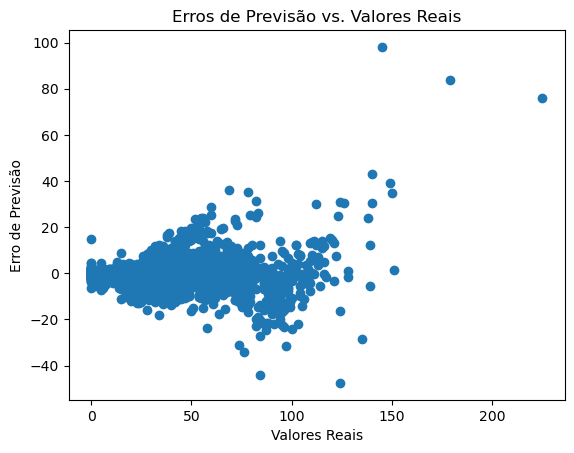

In [192]:
errors = y_valid_3 - y_pred_3

plt.scatter(y_valid_3, errors)
plt.xlabel('Valores Reais')
plt.ylabel('Erro de Previsão')
plt.title('Erros de Previsão vs. Valores Reais')
plt.show()


Vemos dificuldades do modelo LGBM em prever outliers, uma vez que temos RMSE baixo e proximo aos outros, porem o MAE muito mais alto, o que indica dificuldade do modelo em lidar com outliers. O Scatter confirma isso. Vamos tentar uma aproximação atraves do XGBoost, onde ocnsgeuimos regularizar melhor o modelo para lidar com outliers.

In [17]:
model_xgb_b3 = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.6,
    colsample_bytree=1.0,
    objective='reg:squarederror',
    eval_metric='rmse'
)

In [19]:
model_xgb_b3.fit(X_train_3, y_train_3)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
y_pred_xgb = model_xgb_b3.predict(X_valid_3)

In [23]:
# MSE
mse = mean_squared_error(y_valid_3, y_pred_xgb)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.43


In [25]:
mae = mean_absolute_error(y_valid_3, y_pred_xgb)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.02


## Validaçao na base de test BOS_3

In [28]:
#fazendo predict do restante da base de dados
y_pred_test_3 = model_xgb_b3.predict(X_test_3)

In [30]:
# MSE
mse = mean_squared_error(y_test_3, y_pred_test_3)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.29


In [32]:
mae = mean_absolute_error(y_test_3, y_pred_test_3)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.02


## Previsão 28 dias futuros

In [41]:
X_recent_b3 = df_b3.drop('units_sold', axis=1)
y_recent_b3 = df_b3['units_sold']

In [51]:
# Lista para armazenar todas as previsões de 28 dias por item
future_predictions_bos3 = []

# Itera sobre cada item único no dataset
for item in df_b3['item'].unique():
    # Seleciona os dados para o item atual até o último dia conhecido (1913)
    X_recent_b3 = df_b3[(df_b3['item'] == item) & (df_b3['day'] <= 1913)].copy()

    # Remove a coluna target 'units_sold' das features
    X_recent_b3 = X_recent_b3.drop(columns=['units_sold'])

    # Lista para armazenar previsões temporárias
    temp_predictions_b3 = []
    
    for day in range(1, 29):  # Prever 28 dias
        # Atualizar lags para o dia atual com base nas previsões ou valores históricos
        for lag in [1, 2, 3, 7, 14, 21, 28, 35]:
            if len(temp_predictions_b3) >= lag:
                X_recent_b3[f'sold_lag_{lag}'] = temp_predictions_b3[-lag]
            else:
                X_recent_b3[f'sold_lag_{lag}'] = X_recent_b3[f'sold_lag_{lag}'].iloc[-1]
        
        # Atualizar médias e agregações baseadas em previsões recentes
        if len(temp_predictions_b3) > 0:
            X_recent_b3['iteam_sold_avg'] = (
                sum(temp_predictions_b3[-7:]) / len(temp_predictions_b3[-7:]) 
                if len(temp_predictions_b3) >= 7 else X_recent_b3['iteam_sold_avg'].iloc[-1]
            )
            X_recent_b3['region_sold_avg'] = (
                sum(temp_predictions_b3[-7:]) / len(temp_predictions_b3[-7:]) 
                if len(temp_predictions_b3) >= 7 else X_recent_b3['region_sold_avg'].iloc[-1]
            )
            X_recent_b3['store_sold_avg'] = (
                sum(temp_predictions_b3[-7:]) / len(temp_predictions_b3[-7:]) 
                if len(temp_predictions_b3) >= 7 else X_recent_b3['store_sold_avg'].iloc[-1]
            )
            X_recent_b3['cat_sold_avg'] = (
                sum(temp_predictions_b3[-7:]) / len(temp_predictions_b3[-7:]) 
                if len(temp_predictions_b3) >= 7 else X_recent_b3['cat_sold_avg'].iloc[-1]
            )
            X_recent_b3['dept_sold_avg'] = (
                sum(temp_predictions_b3[-7:]) / len(temp_predictions_b3[-7:]) 
                if len(temp_predictions_b3) >= 7 else X_recent_b3['dept_sold_avg'].iloc[-1]
            )

        # Atualizar as médias de vendas por combinação de categorias
        if len(temp_predictions_b3) > 0:
            X_recent_b3['cat_dept_sold_avg'] = (
                sum(temp_predictions_b3[-7:]) / len(temp_predictions_b3[-7:]) 
                if len(temp_predictions_b3) >= 7 else X_recent_b3['cat_dept_sold_avg'].iloc[-1]
            )
            X_recent_b3['store_item_sold_avg'] = (
                sum(temp_predictions_b3[-7:]) / len(temp_predictions_b3[-7:]) 
                if len(temp_predictions_b3) >= 7 else X_recent_b3['store_item_sold_avg'].iloc[-1]
            )
            X_recent_b3['cat_item_sold_avg'] = (
                sum(temp_predictions_b3[-7:]) / len(temp_predictions_b3[-7:]) 
                if len(temp_predictions_b3) >= 7 else X_recent_b3['cat_item_sold_avg'].iloc[-1]
            )
            X_recent_b3['dept_item_sold_avg'] = (
                sum(temp_predictions_b3[-7:]) / len(temp_predictions_b3[-7:]) 
                if len(temp_predictions_b3) >= 7 else X_recent_b3['dept_item_sold_avg'].iloc[-1]
            )
            X_recent_b3['state_store_sold_avg'] = (
                sum(temp_predictions_b3[-7:]) / len(temp_predictions_b3[-7:]) 
                if len(temp_predictions_b3) >= 7 else X_recent_b3['state_store_sold_avg'].iloc[-1]
            )
            X_recent_b3['state_store_cat_sold_avg'] = (
                sum(temp_predictions_b3[-7:]) / len(temp_predictions_b3[-7:]) 
                if len(temp_predictions_b3) >= 7 else X_recent_b3['state_store_cat_sold_avg'].iloc[-1]
            )
            X_recent_b3['store_cat_dept_sold_avg'] = (
                sum(temp_predictions_b3[-7:]) / len(temp_predictions_b3[-7:]) 
                if len(temp_predictions_b3) >= 7 else X_recent_b3['store_cat_dept_sold_avg'].iloc[-1]
            )

        # Atualizar médias móveis e expandindo média de vendas
        X_recent_b3['rolling_sold_mean'] = (
            sum(temp_predictions_b3[-7:]) / len(temp_predictions_b3[-7:])
            if len(temp_predictions_b3) >= 7 else X_recent_b3['rolling_sold_mean'].iloc[-1]
        )
        X_recent_b3['expanding_sold_mean'] = (
            sum(temp_predictions_b3) / len(temp_predictions_b3)
            if len(temp_predictions_b3) > 0 else X_recent_b3['expanding_sold_mean'].iloc[-1]
        )

        # Atualizar a tendência de vendas
        X_recent_b3['selling_trend'] = X_recent_b3['rolling_sold_mean'] - X_recent_b3['expanding_sold_mean']
        
        # Previsão para o dia atual usando o modelo
        day_prediction_b3 = model_xgb_b3.predict(X_recent_b3.tail(1))  # Previsão para o último dia em X_recent
        temp_predictions_b3.append(day_prediction_b3[0])  # Adiciona a previsão para os próximos dias

        # Não adiciona a coluna `units_sold` ao `X_recent`, apenas mantém as previsões no `temp_predictions`

    # Adiciona as previsões de 28 dias para o item atual à lista geral
    future_predictions_bos3.append(pd.DataFrame({
        'item': item,
        'day': list(range(1914, 1942)),
        'units_sold_pred': temp_predictions_b3
    }))

# Concatena todas as previsões de cada item em um único dataframe
future_predictions_df_b3 = pd.concat(future_predictions_bos3, ignore_index=True)


In [53]:
#convertando os numeros para codigo dos itens salvos no dict d_item
with open("d_item.pkl", "rb") as f:
    d_item = pickle.load(f)

future_predictions_df_b3['item'] = future_predictions_df_b3['item'].map(d_item)

In [55]:
pivot_pred28_bos3 = future_predictions_df_b3.pivot_table(
    index='item',       # Índice da tabela pivotada será o item
    columns='day',      # Cada dia futuro será uma coluna
    values='units_sold_pred'
)

In [65]:
pivot_pred28_bos3.head(10)

day                   1914      1915      1916      1917      1918      1919  \
item                                                                           
ACCESORIES_1_001 -0.000062 -0.000114 -0.000114 -0.000114 -0.000114 -0.000114   
ACCESORIES_1_002  0.999680  0.999477  0.999477  0.999477  0.999477  0.999477   
ACCESORIES_1_003  0.995330  0.000001  0.000011  0.000033  0.000033  0.000033   
ACCESORIES_1_004  1.003044  1.003143  1.003143  1.003143  1.003143  1.003143   
ACCESORIES_1_005  0.999358  0.999337  0.999337  0.999337  0.999337  0.999337   
ACCESORIES_1_006  0.998515  0.998484  0.998484  0.998484  0.998484  0.998484   
ACCESORIES_1_007  0.999830  0.999736  0.999736  0.999736  0.999736  0.999736   
ACCESORIES_1_008  1.031877  2.020751  2.020297  2.019650  2.019741  2.019162   
ACCESORIES_1_009  0.000131  0.000199  0.000199  0.000199  0.000199  0.000199   
ACCESORIES_1_010  0.000033  0.995665  0.000033  0.995330  0.000033  0.995330   

day                   1920      1921      1922      1923  ...      1932  \
item                                                      ...             
ACCESORIES_1_001 -0.000114 -0.000114 -0.000114 -0.000114  ... -0.000114   
ACCESORIES_1_002  0.999477  1.000190  1.000190  1.000190  ...  1.000190   
ACCESORIES_1_003  0.000063  0.000079  0.000033  0.000033  ...  0.000033   
ACCESORIES_1_004  1.003143  1.002411  1.002411  1.002411  ...  1.002411   
ACCESORIES_1_005  0.999337  0.999840  0.999840  0.999840  ...  0.999840   
ACCESORIES_1_006  0.998484  0.999038  0.999038  0.999038  ...  0.999038   
ACCESORIES_1_007  0.999736  1.000633  1.000633  1.000633  ...  1.000633   
ACCESORIES_1_008  2.018960  0.773656  2.007968  2.007968  ...  0.023870   
ACCESORIES_1_009  0.000199  0.000199  0.000199  0.000199  ...  0.000199   
ACCESORIES_1_010  0.000033  0.000079  0.995330  0.000079  ...  0.000033   

day                   1933      1934      1935      1936      1937      1938  \
item                                                                           
ACCESORIES_1_001 -0.000114 -0.000114 -0.000114 -0.000114 -0.000114 -0.000114   
ACCESORIES_1_002  1.000190  1.000190  1.000190  1.000190  1.000190  1.000190   
ACCESORIES_1_003  0.000033  0.000033  0.000033  0.000033  0.000033  0.000033   
ACCESORIES_1_004  1.002411  1.002411  1.002411  1.002411  1.002411  1.002411   
ACCESORIES_1_005  0.999840  0.999840  0.999840  0.999840  0.999840  0.999840   
ACCESORIES_1_006  0.999038  0.999038  0.999038  0.999038  0.999038  0.999038   
ACCESORIES_1_007  1.000633  1.000633  1.000633  1.000633  1.000633  1.000633   
ACCESORIES_1_008 -0.001840 -0.001791 -0.001778 -0.001778 -0.002509 -0.002360   
ACCESORIES_1_009  0.000199  0.000199  0.000199  0.000199  0.000199  0.000199   
ACCESORIES_1_010  0.000033  0.000033  0.000033  0.000033  0.000033  0.000033   

day                   1939      1940      1941  
item                                            
ACCESORIES_1_001 -0.000114 -0.000114 -0.000114  
ACCESORIES_1_002  1.000190  1.000190  1.000190  
ACCESORIES_1_003  0.000033  0.000033  0.000033  
ACCESORIES_1_004  1.002411  1.002411  1.002411  
ACCESORIES_1_005  0.999840  0.999840  0.999840  
ACCESORIES_1_006  0.999038  0.999038  0.999038  
ACCESORIES_1_007  1.000633  1.000633  1.000633  
ACCESORIES_1_008 -0.002360 -0.002360 -0.002360  
ACCESORIES_1_009  0.000199  0.000199  0.000199  
ACCESORIES_1_010  0.000033  0.000033  0.000033  

[10 rows x 28 columns]

## NYC_1

In [67]:
df_ny1 = data[data['store_code']== 3]

# Conjunto de treino
X_train_4 = df_ny1[df_ny1['day'] < 1565].drop('units_sold', axis=1)
y_train_4 = df_ny1[df_ny1['day'] < 1565]['units_sold']

# Conjunto de validação
X_valid_4 = df_ny1[(df_ny1['day'] >= 1565) & (df_ny1['day'] < 1884)].drop('units_sold', axis=1)
y_valid_4 = df_ny1[(df_ny1['day'] >= 1565) & (df_ny1['day'] < 1884)]['units_sold']

# Conjunto de teste
X_test_4 = df_ny1[df_ny1['day'] >= 1884].drop('units_sold', axis=1)
y_test_4 = df_ny1[df_ny1['day'] >= 1884]['units_sold']

In [95]:
#Modelo NYC_1
modelo_ny1 = LGBMRegressor()

#Parametros
param_grid = {
    #'learning_rate': [0.01, 0.05, 0.3],
    #'n_estimators': [500, 1000, 1500],
    #'max_depth': [6, 8, 10],
    #'num_leaves': [31, 50, 70],
    #'min_child_weight': [100, 300, 500],
    #'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

# Configurar o GridSearchCV
grid_search_ny1 = GridSearchCV(
    estimator=modelo_ny1,
    param_grid=param_grid,
    cv=tscv,  # Usando TimeSeriesSplit para validação cruzada
    scoring='neg_root_mean_squared_error',  # Avaliação com RMSE
    verbose=1,
)

In [97]:
# Ajustar o GridSearchCV nos dados de treino
grid_search_ny1.fit(X_train_4, y_train_4)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3774
[LightGBM] [Info] Number of data points in the train set: 777495, number of used features: 29
[LightGBM] [Info] Start training from score 1.018544
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3815
[LightGBM] [Info] Number of data points in the train set: 1554990, number of used features: 29
[LightGBM] [Info] Start training from score 1.131485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069750 seconds.
You can set `force_ro

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [81]:
# Exibir os melhores parâmetros encontrados learning rate e nestimators
print("Melhores parâmetros:", grid_search_ny1.best_params_)

Melhores parâmetros: {'learning_rate': 0.05, 'n_estimators': 500}


In [87]:
# Exibir os melhores parâmetros encontrados max_depth e num_leaves
print("Melhores parâmetros:", grid_search_ny1.best_params_)

Melhores parâmetros: {'max_depth': 10, 'num_leaves': 70}


In [93]:
# Exibir os melhores parâmetros encontrados min_child_weight e subsample
print("Melhores parâmetros:", grid_search_ny1.best_params_)

Melhores parâmetros: {'min_child_weight': 100, 'subsample': 0.6}


In [99]:
# Exibir os melhores parâmetros encontrados colsample_bytree
print("Melhores parâmetros:", grid_search_ny1.best_params_)

Melhores parâmetros: {'colsample_bytree': 1.0}


In [101]:
model_ny1 = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    subsample=0.6,
    colsample_bytree=1.0,
    max_depth=10,
    num_leaves=70, 
    min_child_weight=100 
    )

In [103]:
model_ny1.fit(X_train_4, y_train_4, eval_set=[(X_train_4,y_train_4),(X_valid_4,y_valid_4)],
             eval_metric='rmse')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.127793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3821
[LightGBM] [Info] Number of data points in the train set: 4664970, number of used features: 35
[LightGBM] [Info] Start training from score 1.295698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(learning_rate=0.05, max_depth=10, min_child_weight=100,
              n_estimators=500, num_leaves=70, subsample=0.6)

In [107]:
y_pred_4 = model_ny1.predict(X_valid_4)

In [109]:
# MSE
mse = mean_squared_error(y_valid_4, y_pred_4)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.33


In [111]:
mae = mean_absolute_error(y_valid_4, y_pred_4)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.05


# Validaçao na base de teste NYC_1

In [113]:
#fazendo predict do restante da base de dados
y_pred_test_4 = model_ny1.predict(X_test_4)

In [115]:
# MSE
mse = mean_squared_error(y_test_4, y_pred_test_4)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.30


In [117]:
mae = mean_absolute_error(y_test_4, y_pred_test_4)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.05


## Previsão 28 dias futuros

In [120]:
X_recent_ny1 = df_ny1.drop('units_sold', axis=1)

In [124]:
# Lista para armazenar todas as previsões de 28 dias por item
future_predictions_nyc1 = []

# Itera sobre cada item único no dataset
for item in df_ny1['item'].unique():
    # Seleciona os dados para o item atual até o último dia conhecido (1913)
    X_recent_ny1 = df_ny1[(df_ny1['item'] == item) & (df_ny1['day'] <= 1913)].copy()

    # Remove a coluna target 'units_sold' das features
    X_recent_ny1 = X_recent_ny1.drop(columns=['units_sold'])

    # Lista para armazenar previsões temporárias
    temp_predictions_nyc1 = []
    
    for day in range(1, 29):  # Prever 28 dias
        # Atualizar lags para o dia atual com base nas previsões ou valores históricos
        for lag in [1, 2, 3, 7, 14, 21, 28, 35]:
            if len(temp_predictions_nyc1) >= lag:
                X_recent_ny1[f'sold_lag_{lag}'] = temp_predictions_nyc1[-lag]
            else:
                X_recent_ny1[f'sold_lag_{lag}'] = X_recent_ny1[f'sold_lag_{lag}'].iloc[-1]
        
        # Atualizar médias e agregações baseadas em previsões recentes
        if len(temp_predictions_nyc1) > 0:
            X_recent_ny1['iteam_sold_avg'] = (
                sum(temp_predictions_nyc1[-7:]) / len(temp_predictions_nyc1[-7:]) 
                if len(temp_predictions_nyc1) >= 7 else X_recent_ny1['iteam_sold_avg'].iloc[-1]
            )
            X_recent_ny1['region_sold_avg'] = (
                sum(temp_predictions_nyc1[-7:]) / len(temp_predictions_nyc1[-7:]) 
                if len(temp_predictions_nyc1) >= 7 else X_recent_ny1['region_sold_avg'].iloc[-1]
            )
            X_recent_ny1['store_sold_avg'] = (
                sum(temp_predictions_nyc1[-7:]) / len(temp_predictions_nyc1[-7:]) 
                if len(temp_predictions_nyc1) >= 7 else X_recent_ny1['store_sold_avg'].iloc[-1]
            )
            X_recent_ny1['cat_sold_avg'] = (
                sum(temp_predictions_nyc1[-7:]) / len(temp_predictions_nyc1[-7:]) 
                if len(temp_predictions_nyc1) >= 7 else X_recent_ny1['cat_sold_avg'].iloc[-1]
            )
            X_recent_ny1['dept_sold_avg'] = (
                sum(temp_predictions_nyc1[-7:]) / len(temp_predictions_nyc1[-7:]) 
                if len(temp_predictions_nyc1) >= 7 else X_recent_ny1['dept_sold_avg'].iloc[-1]
            )

        # Atualizar as médias de vendas por combinação de categorias
        if len(temp_predictions_nyc1) > 0:
            X_recent_ny1['cat_dept_sold_avg'] = (
                sum(temp_predictions_nyc1[-7:]) / len(temp_predictions_nyc1[-7:]) 
                if len(temp_predictions_nyc1) >= 7 else X_recent_ny1['cat_dept_sold_avg'].iloc[-1]
            )
            X_recent_ny1['store_item_sold_avg'] = (
                sum(temp_predictions_nyc1[-7:]) / len(temp_predictions_nyc1[-7:]) 
                if len(temp_predictions_nyc1) >= 7 else X_recent_ny1['store_item_sold_avg'].iloc[-1]
            )
            X_recent_ny1['cat_item_sold_avg'] = (
                sum(temp_predictions_nyc1[-7:]) / len(temp_predictions_nyc1[-7:]) 
                if len(temp_predictions_nyc1) >= 7 else X_recent_ny1['cat_item_sold_avg'].iloc[-1]
            )
            X_recent_ny1['dept_item_sold_avg'] = (
                sum(temp_predictions_nyc1[-7:]) / len(temp_predictions_nyc1[-7:]) 
                if len(temp_predictions_nyc1) >= 7 else X_recent_ny1['dept_item_sold_avg'].iloc[-1]
            )
            X_recent_ny1['state_store_sold_avg'] = (
                sum(temp_predictions_nyc1[-7:]) / len(temp_predictions_nyc1[-7:]) 
                if len(temp_predictions_nyc1) >= 7 else X_recent_ny1['state_store_sold_avg'].iloc[-1]
            )
            X_recent_ny1['state_store_cat_sold_avg'] = (
                sum(temp_predictions_nyc1[-7:]) / len(temp_predictions_nyc1[-7:]) 
                if len(temp_predictions_nyc1) >= 7 else X_recent_ny1['state_store_cat_sold_avg'].iloc[-1]
            )
            X_recent_ny1['store_cat_dept_sold_avg'] = (
                sum(temp_predictions_nyc1[-7:]) / len(temp_predictions_nyc1[-7:]) 
                if len(temp_predictions_nyc1) >= 7 else X_recent_ny1['store_cat_dept_sold_avg'].iloc[-1]
            )

        # Atualizar médias móveis e expandindo média de vendas
        X_recent_ny1['rolling_sold_mean'] = (
            sum(temp_predictions_nyc1[-7:]) / len(temp_predictions_nyc1[-7:])
            if len(temp_predictions_nyc1) >= 7 else X_recent_ny1['rolling_sold_mean'].iloc[-1]
        )
        X_recent_ny1['expanding_sold_mean'] = (
            sum(temp_predictions_nyc1) / len(temp_predictions_nyc1)
            if len(temp_predictions_nyc1) > 0 else X_recent_ny1['expanding_sold_mean'].iloc[-1]
        )

        # Atualizar a tendência de vendas
        X_recent_ny1['selling_trend'] = X_recent_ny1['rolling_sold_mean'] - X_recent_ny1['expanding_sold_mean']
        
        # Previsão para o dia atual usando o modelo
        day_prediction_nyc1 = model_ny1.predict(X_recent_ny1.tail(1))  # Previsão para o último dia em X_recent
        temp_predictions_nyc1.append(day_prediction_nyc1[0])  # Adiciona a previsão para os próximos dias

        # Não adiciona a coluna `units_sold` ao `X_recent`, apenas mantém as previsões no `temp_predictions`

    # Adiciona as previsões de 28 dias para o item atual à lista geral
    future_predictions_nyc1.append(pd.DataFrame({
        'item': item,
        'day': list(range(1914, 1942)),
        'units_sold_pred': temp_predictions_nyc1
    }))

# Concatena todas as previsões de cada item em um único dataframe
future_predictions_df_nyc1 = pd.concat(future_predictions_nyc1, ignore_index=True)

In [126]:
#convertando os numeros para codigo dos itens salvos no dict d_item
with open("d_item.pkl", "rb") as f:
    d_item = pickle.load(f)

future_predictions_df_nyc1['item'] = future_predictions_df_nyc1['item'].map(d_item)

In [128]:
pivot_pred28_nyc1 = future_predictions_df_nyc1.pivot_table(
    index='item',       
    columns='day',      
    values='units_sold_pred'
)

In [130]:
pivot_pred28_nyc1.head(10)

day                   1914       1915      1916      1917      1918      1919  \
item                                                                            
ACCESORIES_1_001  1.017866   1.014677  1.014677  1.014677  1.014677  1.014677   
ACCESORIES_1_002 -0.000380   0.019314  0.019115  0.019115  0.019115  0.019115   
ACCESORIES_1_003  0.998233   0.977726  0.978691  0.978691  0.978691  0.978691   
ACCESORIES_1_004  1.960690   1.945299  1.945299  1.945299  1.945299  1.945299   
ACCESORIES_1_005  1.395683   1.394759  1.394759  1.394759  1.394759  1.394759   
ACCESORIES_1_006  0.004166   0.039332  0.039332  0.039332  0.039332  0.039332   
ACCESORIES_1_007  1.006982   0.990663  0.990663  0.990663  0.990663  0.990663   
ACCESORIES_1_008  1.909852  11.387283  2.406973  4.450383  4.448784  5.028639   
ACCESORIES_1_009  0.002190   1.004100  0.116228  0.116228  0.116228  0.116228   
ACCESORIES_1_010  1.262769   1.260326  1.260326  1.260326  1.260326  1.260326   

day                   1920      1921      1922      1923  ...      1932  \
item                                                      ...             
ACCESORIES_1_001  1.014677  1.016445  1.016445  1.016445  ...  1.756855   
ACCESORIES_1_002  0.019115  0.006541  0.002142  0.002142  ...  0.003713   
ACCESORIES_1_003  0.978691  0.990857  0.988028  0.988028  ...  0.995428   
ACCESORIES_1_004  1.945299  1.931463  1.920080  1.920080  ...  1.919706   
ACCESORIES_1_005  1.394759  2.125989  2.140429  2.140429  ...  3.132243   
ACCESORIES_1_006  0.039332  0.013728  0.009329  0.009329  ...  0.010900   
ACCESORIES_1_007  0.990663  0.998581  0.998581  0.998581  ...  1.000200   
ACCESORIES_1_008  5.028639  1.722996  1.824119  1.620753  ...  1.173277   
ACCESORIES_1_009  0.117152  0.014355  0.021146  0.002190  ...  0.002190   
ACCESORIES_1_010  1.260326  1.902497  1.914094  1.914094  ...  1.949000   

day                   1933      1934      1935      1936      1937      1938  \
item                                                                           
ACCESORIES_1_001  1.760175  1.760175  1.760175  1.760175  1.760175  1.760175   
ACCESORIES_1_002  0.003713  0.003713  0.003713  0.003713  0.003713  0.003713   
ACCESORIES_1_003  0.995428  0.995428  0.995428  0.995428  0.995428  0.995428   
ACCESORIES_1_004  1.919706  1.919706  1.919706  1.919706  1.919706  1.919706   
ACCESORIES_1_005  3.227149  3.420859  3.936743  4.268567  4.882554  4.945039   
ACCESORIES_1_006  0.010900  0.010900  0.010900  0.010900  0.010900  0.010900   
ACCESORIES_1_007  1.000200  1.000200  1.000200  1.000200  1.000200  1.000200   
ACCESORIES_1_008  1.173277  1.173277  1.173277  1.173277  1.173277  1.173277   
ACCESORIES_1_009  0.002190  0.002190  0.002190  0.002190  0.002190  0.002190   
ACCESORIES_1_010  1.949000  1.945680  1.945680  1.945680  1.932645  1.932645   

day                   1939      1940      1941  
item                                            
ACCESORIES_1_001  1.765063  1.765063  1.765063  
ACCESORIES_1_002  0.003713  0.003713  0.003713  
ACCESORIES_1_003  0.995428  0.995428  0.995428  
ACCESORIES_1_004  1.919706  1.919706  1.919706  
ACCESORIES_1_005  5.053568  5.554731  5.943297  
ACCESORIES_1_006  0.010900  0.010900  0.010900  
ACCESORIES_1_007  1.000200  1.000200  1.000200  
ACCESORIES_1_008  1.173277  1.173277  1.173277  
ACCESORIES_1_009  0.002190  0.002190  0.002190  
ACCESORIES_1_010  1.932645  1.932645  1.932645  

[10 rows x 28 columns]

## NYC_2

In [133]:
df_ny2 = data[data['store_code']== 4]

# Conjunto de treino
X_train_5 = df_ny2[df_ny2['day'] < 1565].drop('units_sold', axis=1)
y_train_5 = df_ny2[df_ny2['day'] < 1565]['units_sold']

# Conjunto de validação
X_valid_5 = df_ny2[(df_ny2['day'] >= 1565) & (df_ny2['day'] < 1884)].drop('units_sold', axis=1)
y_valid_5 = df_ny2[(df_ny2['day'] >= 1565) & (df_ny2['day'] < 1884)]['units_sold']

# Conjunto de teste
X_test_5 = df_ny2[df_ny2['day'] >= 1884].drop('units_sold', axis=1)
y_test_5 = df_ny2[df_ny2['day'] >= 1884]['units_sold']

In [157]:
#Modelo NYC_2
modelo_ny2 = LGBMRegressor()

#Parametros
param_grid = {
    #'learning_rate': [0.01, 0.05, 0.3],
    #'n_estimators': [500, 1000, 1500],
    #'max_depth': [6, 8, 10],
    #'num_leaves': [31, 50, 70],
    #'min_child_weight': [100, 300, 500],
    #'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

# Configurar o GridSearchCV
grid_search_ny2 = GridSearchCV(
    estimator=modelo_ny2,
    param_grid=param_grid,
    cv=tscv,  # Usando TimeSeriesSplit para validação cruzada
    scoring='neg_root_mean_squared_error',  # Avaliação com RMSE
    verbose=1,
)

In [159]:
# Ajustar o GridSearchCV nos dados de treino
grid_search_ny2.fit(X_train_5, y_train_5)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3574
[LightGBM] [Info] Number of data points in the train set: 777495, number of used features: 29
[LightGBM] [Info] Start training from score 0.802113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3590
[LightGBM] [Info] Number of data points in the train set: 1554990, number of used features: 29
[LightGBM] [Info] Start training from score 0.853011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054012 seconds.
You can set `force_ro

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [143]:
# Exibir os melhores parâmetros encontrados learning rate e nestimators
print("Melhores parâmetros:", grid_search_ny2.best_params_)

Melhores parâmetros: {'learning_rate': 0.05, 'n_estimators': 1500}


In [149]:
# Exibir os melhores parâmetros encontrados max_depth e num_leaves
print("Melhores parâmetros:", grid_search_ny2.best_params_)

Melhores parâmetros: {'max_depth': 10, 'num_leaves': 50}


In [155]:
# Exibir os melhores parâmetros encontrados min_child_weight e subsample
print("Melhores parâmetros:", grid_search_ny2.best_params_)

Melhores parâmetros: {'min_child_weight': 100, 'subsample': 0.6}


In [161]:
# Exibir os melhores parâmetros encontrados colsample_bytree
print("Melhores parâmetros:", grid_search_ny2.best_params_)

Melhores parâmetros: {'colsample_bytree': 1.0}


In [163]:
model_ny2 = LGBMRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    subsample=0.6,
    colsample_bytree=1.0,
    max_depth=10,
    num_leaves=50, 
    min_child_weight=100 
    )

In [165]:
model_ny2.fit(X_train_5, y_train_5, eval_set=[(X_train_5,y_train_5),(X_valid_5,y_valid_5)],
             eval_metric='rmse')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.133159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3584
[LightGBM] [Info] Number of data points in the train set: 4664970, number of used features: 35
[LightGBM] [Info] Start training from score 0.905710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(learning_rate=0.05, max_depth=10, min_child_weight=100,
              n_estimators=1500, num_leaves=50, subsample=0.6)

In [167]:
y_pred_5 = model_ny2.predict(X_valid_5)

In [169]:
# MSE
mse = mean_squared_error(y_valid_5, y_pred_5)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.34


In [171]:
mae = mean_absolute_error(y_valid_5, y_pred_5)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.04


# Validaçao na base de teste NYC_2

In [176]:
#fazendo predict do restante da base de dados
y_pred_test_5 = model_ny2.predict(X_test_5)

In [178]:
# MSE
mse = mean_squared_error(y_test_5, y_pred_test_5)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.30


In [180]:
mae = mean_absolute_error(y_test_5, y_pred_test_5)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.04


## Previsao 28 dias futuros

In [183]:
X_recent_ny2 = df_ny2.drop('units_sold', axis=1)

In [185]:
# Lista para armazenar todas as previsões de 28 dias por item
future_predictions_nyc2 = []

# Itera sobre cada item único no dataset
for item in df_ny2['item'].unique():
    # Seleciona os dados para o item atual até o último dia conhecido (1913)
    X_recent_ny2 = df_ny2[(df_ny2['item'] == item) & (df_ny2['day'] <= 1913)].copy()

    # Remove a coluna target 'units_sold' das features
    X_recent_ny2 = X_recent_ny2.drop(columns=['units_sold'])

    # Lista para armazenar previsões temporárias
    temp_predictions_nyc2 = []
    
    for day in range(1, 29):  # Prever 28 dias
        # Atualizar lags para o dia atual com base nas previsões ou valores históricos
        for lag in [1, 2, 3, 7, 14, 21, 28, 35]:
            if len(temp_predictions_nyc2) >= lag:
                X_recent_ny2[f'sold_lag_{lag}'] = temp_predictions_nyc2[-lag]
            else:
                X_recent_ny2[f'sold_lag_{lag}'] = X_recent_ny2[f'sold_lag_{lag}'].iloc[-1]
        
        # Atualizar médias e agregações baseadas em previsões recentes
        if len(temp_predictions_nyc2) > 0:
            X_recent_ny2['iteam_sold_avg'] = (
                sum(temp_predictions_nyc2[-7:]) / len(temp_predictions_nyc2[-7:]) 
                if len(temp_predictions_nyc2) >= 7 else X_recent_ny2['iteam_sold_avg'].iloc[-1]
            )
            X_recent_ny2['region_sold_avg'] = (
                sum(temp_predictions_nyc2[-7:]) / len(temp_predictions_nyc2[-7:]) 
                if len(temp_predictions_nyc2) >= 7 else X_recent_ny2['region_sold_avg'].iloc[-1]
            )
            X_recent_ny2['store_sold_avg'] = (
                sum(temp_predictions_nyc2[-7:]) / len(temp_predictions_nyc2[-7:]) 
                if len(temp_predictions_nyc2) >= 7 else X_recent_ny2['store_sold_avg'].iloc[-1]
            )
            X_recent_ny2['cat_sold_avg'] = (
                sum(temp_predictions_nyc2[-7:]) / len(temp_predictions_nyc2[-7:]) 
                if len(temp_predictions_nyc2) >= 7 else X_recent_ny2['cat_sold_avg'].iloc[-1]
            )
            X_recent_ny2['dept_sold_avg'] = (
                sum(temp_predictions_nyc2[-7:]) / len(temp_predictions_nyc2[-7:]) 
                if len(temp_predictions_nyc2) >= 7 else X_recent_ny2['dept_sold_avg'].iloc[-1]
            )

        # Atualizar as médias de vendas por combinação de categorias
        if len(temp_predictions_nyc2) > 0:
            X_recent_ny2['cat_dept_sold_avg'] = (
                sum(temp_predictions_nyc2[-7:]) / len(temp_predictions_nyc2[-7:]) 
                if len(temp_predictions_nyc2) >= 7 else X_recent_ny2['cat_dept_sold_avg'].iloc[-1]
            )
            X_recent_ny2['store_item_sold_avg'] = (
                sum(temp_predictions_nyc2[-7:]) / len(temp_predictions_nyc2[-7:]) 
                if len(temp_predictions_nyc2) >= 7 else X_recent_ny2['store_item_sold_avg'].iloc[-1]
            )
            X_recent_ny2['cat_item_sold_avg'] = (
                sum(temp_predictions_nyc2[-7:]) / len(temp_predictions_nyc2[-7:]) 
                if len(temp_predictions_nyc2) >= 7 else X_recent_ny2['cat_item_sold_avg'].iloc[-1]
            )
            X_recent_ny2['dept_item_sold_avg'] = (
                sum(temp_predictions_nyc2[-7:]) / len(temp_predictions_nyc2[-7:]) 
                if len(temp_predictions_nyc2) >= 7 else X_recent_ny2['dept_item_sold_avg'].iloc[-1]
            )
            X_recent_ny2['state_store_sold_avg'] = (
                sum(temp_predictions_nyc2[-7:]) / len(temp_predictions_nyc2[-7:]) 
                if len(temp_predictions_nyc2) >= 7 else X_recent_ny2['state_store_sold_avg'].iloc[-1]
            )
            X_recent_ny2['state_store_cat_sold_avg'] = (
                sum(temp_predictions_nyc2[-7:]) / len(temp_predictions_nyc2[-7:]) 
                if len(temp_predictions_nyc2) >= 7 else X_recent_ny2['state_store_cat_sold_avg'].iloc[-1]
            )
            X_recent_ny2['store_cat_dept_sold_avg'] = (
                sum(temp_predictions_nyc2[-7:]) / len(temp_predictions_nyc2[-7:]) 
                if len(temp_predictions_nyc2) >= 7 else X_recent_ny2['store_cat_dept_sold_avg'].iloc[-1]
            )

        # Atualizar médias móveis e expandindo média de vendas
        X_recent_ny2['rolling_sold_mean'] = (
            sum(temp_predictions_nyc2[-7:]) / len(temp_predictions_nyc2[-7:])
            if len(temp_predictions_nyc2) >= 7 else X_recent_ny2['rolling_sold_mean'].iloc[-1]
        )
        X_recent_ny2['expanding_sold_mean'] = (
            sum(temp_predictions_nyc2) / len(temp_predictions_nyc2)
            if len(temp_predictions_nyc2) > 0 else X_recent_ny2['expanding_sold_mean'].iloc[-1]
        )

        # Atualizar a tendência de vendas
        X_recent_ny2['selling_trend'] = X_recent_ny2['rolling_sold_mean'] - X_recent_ny2['expanding_sold_mean']
        
        # Previsão para o dia atual usando o modelo
        day_prediction_nyc2 = model_ny1.predict(X_recent_ny2.tail(1))  # Previsão para o último dia em X_recent
        temp_predictions_nyc2.append(day_prediction_nyc2[0])  # Adiciona a previsão para os próximos dias

        # Não adiciona a coluna `units_sold` ao `X_recent`, apenas mantém as previsões no `temp_predictions`

    # Adiciona as previsões de 28 dias para o item atual à lista geral
    future_predictions_nyc2.append(pd.DataFrame({
        'item': item,
        'day': list(range(1914, 1942)),
        'units_sold_pred': temp_predictions_nyc2
    }))

# Concatena todas as previsões de cada item em um único dataframe
future_predictions_df_nyc2 = pd.concat(future_predictions_nyc2, ignore_index=True)

In [187]:
#convertando os numeros para codigo dos itens salvos no dict d_item
with open("d_item.pkl", "rb") as f:
    d_item = pickle.load(f)

future_predictions_df_nyc2['item'] = future_predictions_df_nyc2['item'].map(d_item)

In [189]:
pivot_pred28_nyc2 = future_predictions_df_nyc2.pivot_table(
    index='item',       
    columns='day',      
    values='units_sold_pred'
)

In [191]:
pivot_pred28_nyc2.head(10)

day                   1914      1915      1916      1917      1918      1919  \
item                                                                           
ACCESORIES_1_001  1.989500  1.087689  1.087689  1.092715  1.093254  1.093454   
ACCESORIES_1_002  0.019115  0.021381  0.021381  0.021381  0.021381  0.021381   
ACCESORIES_1_003 -0.006220 -0.006220 -0.006220 -0.006220 -0.006220 -0.006220   
ACCESORIES_1_004  1.538430  3.411627  2.396004  2.396004  2.402530  2.402530   
ACCESORIES_1_005  1.337398  1.337398  1.337398  1.337398  1.337398  1.337398   
ACCESORIES_1_006  0.004166  0.026501  0.026302  0.026302  0.026302  0.026302   
ACCESORIES_1_007  0.017024  0.017024  0.017024  0.017024  0.017024  0.017024   
ACCESORIES_1_008  6.056540  5.189775  5.310187  5.310187  5.356104  5.356104   
ACCESORIES_1_009  0.021884  0.024874  0.024874  0.024874  0.024874  0.024874   
ACCESORIES_1_010  0.997816  0.975284  0.975284  0.975284  0.975284  0.975284   

day                   1920      1921      1922      1923  ...      1932  \
item                                                      ...             
ACCESORIES_1_001  1.093454  1.845845  1.339572  1.398005  ...  1.922261   
ACCESORIES_1_002  0.021381  0.006541  0.002142  0.003713  ...  0.003713   
ACCESORIES_1_003 -0.006220  0.008076  0.003677  0.003677  ...  0.003677   
ACCESORIES_1_004  2.407607  2.358551  2.396352  2.299966  ...  1.050762   
ACCESORIES_1_005  1.337398  1.902497  1.914094  1.914094  ...  1.945680   
ACCESORIES_1_006  0.026302  0.013728  0.009329  0.009329  ...  0.010900   
ACCESORIES_1_007  0.017024  0.006541  0.003713  0.003713  ...  0.003713   
ACCESORIES_1_008  5.356104  6.335981  5.899878  6.394249  ...  7.206632   
ACCESORIES_1_009  0.024874  0.009111  0.004712  0.006283  ...  0.006283   
ACCESORIES_1_010  0.975284  0.990857  0.988028  0.988028  ...  0.995428   

day                   1933      1934      1935      1936      1937      1938  \
item                                                                           
ACCESORIES_1_001  1.923959  1.923959  1.923959  1.923959  1.923959  1.923959   
ACCESORIES_1_002  0.003713  0.003713  0.003713  0.003713  0.003713  0.003713   
ACCESORIES_1_003  0.003677  0.003677  0.003677  0.003677  0.003677  0.003677   
ACCESORIES_1_004  1.050762  1.050762  1.050762  1.043119  1.007987  1.007987   
ACCESORIES_1_005  1.945680  1.945680  1.932645  1.932645  1.932645  1.932645   
ACCESORIES_1_006  0.010900  0.010900  0.010900  0.010900  0.010900  0.010900   
ACCESORIES_1_007  0.003713  0.003713  0.003713  0.003713  0.003713  0.003713   
ACCESORIES_1_008  7.226614  7.261691  7.334555  7.334555  7.334555  7.331535   
ACCESORIES_1_009  0.006283  0.006283  0.006283  0.006283  0.006283  0.006283   
ACCESORIES_1_010  0.995428  0.995428  0.995428  0.995428  0.995428  0.995428   

day                   1939      1940      1941  
item                                            
ACCESORIES_1_001  1.923959  1.923959  1.916429  
ACCESORIES_1_002  0.003713  0.003713  0.003713  
ACCESORIES_1_003  0.003677  0.003677  0.003677  
ACCESORIES_1_004  0.974603  0.974603  0.974603  
ACCESORIES_1_005  1.932645  1.932645  1.932645  
ACCESORIES_1_006  0.010900  0.010900  0.010900  
ACCESORIES_1_007  0.003713  0.003713  0.003713  
ACCESORIES_1_008  7.331535  7.331535  7.331535  
ACCESORIES_1_009  0.006283  0.006283  0.006283  
ACCESORIES_1_010  0.995428  0.995428  0.995428  

[10 rows x 28 columns]

## NYC_3

In [193]:
df_ny3 = data[data['store_code']== 5]

# Conjunto de treino
X_train_6 = df_ny3[df_ny3['day'] < 1565].drop('units_sold', axis=1)
y_train_6 = df_ny3[df_ny3['day'] < 1565]['units_sold']

# Conjunto de validação
X_valid_6 = df_ny3[(df_ny3['day'] >= 1565) & (df_ny3['day'] < 1884)].drop('units_sold', axis=1)
y_valid_6 = df_ny3[(df_ny3['day'] >= 1565) & (df_ny3['day'] < 1884)]['units_sold']

# Conjunto de teste
X_test_6 = df_ny3[df_ny3['day'] >= 1884].drop('units_sold', axis=1)
y_test_6 = df_ny3[df_ny3['day'] >= 1884]['units_sold']

In [258]:
#Modelo NYC_3
modelo_ny3 = LGBMRegressor()

#Parametros
param_grid = {
    'learning_rate': [0.01, 0.05, 0.3],
    'n_estimators': [500, 1000, 1500],
    #'max_depth': [6, 8, 10],
    #'num_leaves': [31, 50, 70],
    #'min_child_weight': [100, 300, 500],
    #'subsample': [0.6, 0.8, 1.0],
    #'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

# Configurar o GridSearchCV
grid_search_ny3 = GridSearchCV(
    estimator=modelo_ny3,
    param_grid=param_grid,
    cv=tscv,  # Usando TimeSeriesSplit para validação cruzada
    scoring='neg_root_mean_squared_error',  # Avaliação com RMSE
    verbose=1,
)

In [260]:
# Ajustar o GridSearchCV nos dados de treino
grid_search_ny3.fit(X_train_6, y_train_6)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3822
[LightGBM] [Info] Number of data points in the train set: 777495, number of used features: 29
[LightGBM] [Info] Start training from score 1.472417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3899
[LightGBM] [Info] Number of data points in the train set: 1554990, number of used features: 29
[LightGBM] [Info] Start training from score 1.651168
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050044 seconds.
You can set `force_ro

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [244]:
# Exibir os melhores parâmetros encontrados learning rate e nestimators
print("Melhores parâmetros:", grid_search_ny3.best_params_)

Melhores parâmetros: {'learning_rate': 0.01, 'n_estimators': 1500}


In [250]:
# Exibir os melhores parâmetros encontrados mx_depth e num_leaves
print("Melhores parâmetros:", grid_search_ny3.best_params_)

Melhores parâmetros: {'max_depth': 6, 'num_leaves': 50}


In [256]:
# Exibir os melhores parâmetros encontrados min_child_weight e subsample
print("Melhores parâmetros:", grid_search_ny3.best_params_)

Melhores parâmetros: {'min_child_weight': 100, 'subsample': 0.6}


In [262]:
# Exibir os melhores parâmetros encontrados colsample_bytree
print("Melhores parâmetros:", grid_search_ny3.best_params_)

Melhores parâmetros: {'colsample_bytree': 0.8}


In [195]:
model_ny3 = LGBMRegressor(
    n_estimators=1500, 
    learning_rate=0.01, 
    subsample=0.6,
    colsample_bytree=0.8,
    max_depth=6, 
    num_leaves=50, 
    min_child_weight=100 
    )

In [197]:
model_ny3.fit(X_train_6, y_train_6, eval_set=[(X_train_6,y_train_6),(X_valid_6,y_valid_6)],
             eval_metric='rmse')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.143701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3930
[LightGBM] [Info] Number of data points in the train set: 4664970, number of used features: 35
[LightGBM] [Info] Start training from score 1.897009
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.01, max_depth=6,
              min_child_weight=100, n_estimators=1500, num_leaves=50,
              subsample=0.6)

In [199]:
y_pred_6 = model_ny3.predict(X_valid_6)

In [201]:
# MSE
mse = mean_squared_error(y_valid_6, y_pred_6)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 1.09


In [203]:
mae = mean_absolute_error(y_valid_6, y_pred_6)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.16


# Validaçao na base de teste NYC_3

In [274]:
#fazendo predict do restante da base de dados
y_pred_test_6 = model_ny3.predict(X_test_6)

In [276]:
# MSE
mse = mean_squared_error(y_test_6, y_pred_test_6)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.72


In [278]:
mae = mean_absolute_error(y_test_6, y_pred_test_6)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.15


## MODELO XGBOOST NYC_3

Vamos fazer o teste com o XGBoost na loja NYC_3 para ver se temos ganhos.

In [217]:
model_xgb_ny3 = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.01,
    max_depth=7,
    subsample=0.7,
    colsample_bytree=1.0,
    objective='reg:squarederror',
    eval_metric='rmse',
    reg_alpha=0.01,
    reg_lambda=0.01
)

In [219]:
model_xgb_ny3.fit(
    X_train_6, y_train_6,
    eval_set=[(X_valid_6, y_valid_6)],
    #early_stopping_rounds=50,
    verbose=True
)

[0]	validation_0-rmse:5.40718
[1]	validation_0-rmse:5.35604
[2]	validation_0-rmse:5.30650
[3]	validation_0-rmse:5.25684
[4]	validation_0-rmse:5.20818
[5]	validation_0-rmse:5.15961
[6]	validation_0-rmse:5.11174
[7]	validation_0-rmse:5.06412
[8]	validation_0-rmse:5.01709
[9]	validation_0-rmse:4.97008
[10]	validation_0-rmse:4.92418
[11]	validation_0-rmse:4.87831
[12]	validation_0-rmse:4.83308
[13]	validation_0-rmse:4.78819
[14]	validation_0-rmse:4.74432
[15]	validation_0-rmse:4.69971
[16]	validation_0-rmse:4.65698
[17]	validation_0-rmse:4.61455
[18]	validation_0-rmse:4.57232
[19]	validation_0-rmse:4.53073
[20]	validation_0-rmse:4.48935
[21]	validation_0-rmse:4.44794
[22]	validation_0-rmse:4.40679
[23]	validation_0-rmse:4.36609
[24]	validation_0-rmse:4.32658
[25]	validation_0-rmse:4.28775
[26]	validation_0-rmse:4.24850
[27]	validation_0-rmse:4.21005
[28]	validation_0-rmse:4.17221
[29]	validation_0-rmse:4.13424
[30]	validation_0-rmse:4.09775
[31]	validation_0-rmse:4.06116
[32]	validation_0-

KeyboardInterrupt: 

In [211]:
y_pred_xgb_ny3 = model_xgb_ny3.predict(X_valid_6)

In [213]:
# MSE
mse = mean_squared_error(y_valid_6, y_pred_xgb_ny3)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 1.13


In [215]:
mae = mean_absolute_error(y_valid_6, y_pred_xgb_ny3)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.10


In [421]:
y_pred_xgb_ny3 = model_xgb_ny3.predict(X_test_6)

In [423]:
# MSE
mse = mean_squared_error(y_test_6, y_pred_xgb_ny3)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.70


In [425]:
mae = mean_absolute_error(y_test_6, y_pred_xgb_ny3)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.09


## NYC_4

In [241]:
df_ny4 = data[data['store_code']== 6]

# Conjunto de treino
X_train_7 = df_ny4[df_ny4['day'] < 1565].drop('units_sold', axis=1)
y_train_7 = df_ny4[df_ny4['day'] < 1565]['units_sold']

# Conjunto de validação
X_valid_7 = df_ny4[(df_ny4['day'] >= 1565) & (df_ny4['day'] < 1884)].drop('units_sold', axis=1)
y_valid_7 = df_ny4[(df_ny4['day'] >= 1565) & (df_ny4['day'] < 1884)]['units_sold']

# Conjunto de teste
X_test_7 = df_ny4[df_ny4['day'] >= 1884].drop('units_sold', axis=1)
y_test_7 = df_ny4[df_ny4['day'] >= 1884]['units_sold']

In [262]:
#Modelo NYC_4
modelo_ny4 = LGBMRegressor()

#Parametros
param_grid = {
    #'learning_rate': [0.01, 0.05, 0.3],
    #'n_estimators': [500, 1000, 1500],
    #'max_depth': [6, 8, 10],
    #'num_leaves': [31, 50, 70],
    #'min_child_weight': [100, 300, 500],
    #'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

# Configurar o GridSearchCV
grid_search_ny4 = GridSearchCV(
    estimator=modelo_ny4,
    param_grid=param_grid,
    cv=tscv,  # Usando TimeSeriesSplit para validação cruzada
    scoring='neg_root_mean_squared_error',  # Avaliação com RMSE
    verbose=1,
)

In [264]:
# Ajustar o GridSearchCV nos dados de treino
grid_search_ny4.fit(X_train_7, y_train_7)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2861
[LightGBM] [Info] Number of data points in the train set: 777495, number of used features: 27
[LightGBM] [Info] Start training from score 0.516016
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2898
[LightGBM] [Info] Number of data points in the train set: 1554990, number of used features: 27
[LightGBM] [Info] Start training from score 0.578328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051749 seconds.
You can set `force_ro

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [247]:
# Exibir os melhores parâmetros encontrados learning rate e nestimators
print("Melhores parâmetros:", grid_search_ny4.best_params_)

Melhores parâmetros: {'learning_rate': 0.01, 'n_estimators': 1500}


In [253]:
# Exibir os melhores parâmetros encontrados mx_depth e num_leaves
print("Melhores parâmetros:", grid_search_ny4.best_params_)

Melhores parâmetros: {'max_depth': 10, 'num_leaves': 31}


In [260]:
# Exibir os melhores parâmetros encontrados min_child_weight e subsample
print("Melhores parâmetros:", grid_search_ny4.best_params_)

Melhores parâmetros: {'min_child_weight': 100, 'subsample': 0.6}


In [267]:
# Exibir os melhores parâmetros encontrados colsample_bytree
print("Melhores parâmetros:", grid_search_ny4.best_params_)

Melhores parâmetros: {'colsample_bytree': 1.0}


In [269]:
model_ny4 = LGBMRegressor(
    n_estimators=1500, 
    learning_rate=0.01, 
    subsample=0.6,
    colsample_bytree=1.0,
    max_depth=10, 
    num_leaves=31, 
    min_child_weight=100 
    )

In [271]:
model_ny4.fit(X_train_7, y_train_7, eval_set=[(X_train_7,y_train_7),(X_valid_7,y_valid_7)],
             eval_metric='rmse')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.230619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2914
[LightGBM] [Info] Number of data points in the train set: 4664970, number of used features: 35
[LightGBM] [Info] Start training from score 0.684459
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(learning_rate=0.01, max_depth=10, min_child_weight=100,
              n_estimators=1500, subsample=0.6)

In [273]:
y_pred_7 = model_ny4.predict(X_valid_7)

In [275]:
# MSE
mse = mean_squared_error(y_valid_7, y_pred_7)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.35


In [277]:
mae = mean_absolute_error(y_valid_7, y_pred_7)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.04


# Validaçao na base de teste NYC_4

In [281]:
#fazendo predict do restante da base de dados
y_pred_test_7 = model_ny4.predict(X_test_7)

In [283]:
# MSE
mse = mean_squared_error(y_test_7, y_pred_test_7)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.28


In [285]:
mae = mean_absolute_error(y_test_7, y_pred_test_7)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.04


## Previsão 28 dias futuros

In [288]:
X_recent_ny4 = df_ny4.drop('units_sold', axis=1)

In [313]:
# Lista para armazenar todas as previsões de 28 dias por item
future_predictions_nyc4 = []

# Itera sobre cada item único no dataset
for item in df_ny4['item'].unique():
    # Seleciona os dados para o item atual até o último dia conhecido (1913)
    X_recent_ny4 = df_ny4[(df_ny4['item'] == item) & (df_ny4['day'] <= 1913)].copy()

    # Remove a coluna target 'units_sold' das features
    X_recent_ny4 = X_recent_ny4.drop(columns=['units_sold'])

    # Lista para armazenar previsões temporárias
    temp_predictions_nyc4 = []
    
    for day in range(1, 29):  # Prever 28 dias
        # Atualizar lags para o dia atual com base nas previsões ou valores históricos
        for lag in [1, 2, 3, 7, 14, 21, 28, 35]:
            if len(temp_predictions_nyc4) >= lag:
                X_recent_ny4[f'sold_lag_{lag}'] = temp_predictions_nyc4[-lag]
            else:
                X_recent_ny4[f'sold_lag_{lag}'] = X_recent_ny4[f'sold_lag_{lag}'].iloc[-1]
        
        # Atualizar médias e agregações baseadas em previsões recentes
        if len(temp_predictions_nyc4) > 0:
            X_recent_ny4['iteam_sold_avg'] = (
                sum(temp_predictions_nyc4[-7:]) / len(temp_predictions_nyc4[-7:]) 
                if len(temp_predictions_nyc4) >= 7 else X_recent_ny4['iteam_sold_avg'].iloc[-1]
            )
            X_recent_ny4['region_sold_avg'] = (
                sum(temp_predictions_nyc4[-7:]) / len(temp_predictions_nyc4[-7:]) 
                if len(temp_predictions_nyc4) >= 7 else X_recent_ny4['region_sold_avg'].iloc[-1]
            )
            X_recent_ny4['store_sold_avg'] = (
                sum(temp_predictions_nyc4[-7:]) / len(temp_predictions_nyc4[-7:]) 
                if len(temp_predictions_nyc4) >= 7 else X_recent_ny4['store_sold_avg'].iloc[-1]
            )
            X_recent_ny4['cat_sold_avg'] = (
                sum(temp_predictions_nyc4[-7:]) / len(temp_predictions_nyc4[-7:]) 
                if len(temp_predictions_nyc4) >= 7 else X_recent_ny4['cat_sold_avg'].iloc[-1]
            )
            X_recent_ny4['dept_sold_avg'] = (
                sum(temp_predictions_nyc4[-7:]) / len(temp_predictions_nyc4[-7:]) 
                if len(temp_predictions_nyc4) >= 7 else X_recent_ny4['dept_sold_avg'].iloc[-1]
            )

        # Atualizar as médias de vendas por combinação de categorias
        if len(temp_predictions_nyc4) > 0:
            X_recent_ny4['cat_dept_sold_avg'] = (
                sum(temp_predictions_nyc4[-7:]) / len(temp_predictions_nyc4[-7:]) 
                if len(temp_predictions_nyc4) >= 7 else X_recent_ny4['cat_dept_sold_avg'].iloc[-1]
            )
            X_recent_ny4['store_item_sold_avg'] = (
                sum(temp_predictions_nyc4[-7:]) / len(temp_predictions_nyc4[-7:]) 
                if len(temp_predictions_nyc4) >= 7 else X_recent_ny4['store_item_sold_avg'].iloc[-1]
            )
            X_recent_ny4['cat_item_sold_avg'] = (
                sum(temp_predictions_nyc4[-7:]) / len(temp_predictions_nyc4[-7:]) 
                if len(temp_predictions_nyc4) >= 7 else X_recent_ny4['cat_item_sold_avg'].iloc[-1]
            )
            X_recent_ny4['dept_item_sold_avg'] = (
                sum(temp_predictions_nyc4[-7:]) / len(temp_predictions_nyc4[-7:]) 
                if len(temp_predictions_nyc4) >= 7 else X_recent_ny4['dept_item_sold_avg'].iloc[-1]
            )
            X_recent_ny4['state_store_sold_avg'] = (
                sum(temp_predictions_nyc4[-7:]) / len(temp_predictions_nyc4[-7:]) 
                if len(temp_predictions_nyc4) >= 7 else X_recent_ny4['state_store_sold_avg'].iloc[-1]
            )
            X_recent_ny4['state_store_cat_sold_avg'] = (
                sum(temp_predictions_nyc4[-7:]) / len(temp_predictions_nyc4[-7:]) 
                if len(temp_predictions_nyc4) >= 7 else X_recent_ny4['state_store_cat_sold_avg'].iloc[-1]
            )
            X_recent_ny4['store_cat_dept_sold_avg'] = (
                sum(temp_predictions_nyc4[-7:]) / len(temp_predictions_nyc4[-7:]) 
                if len(temp_predictions_nyc4) >= 7 else X_recent_ny4['store_cat_dept_sold_avg'].iloc[-1]
            )

        # Atualizar médias móveis e expandindo média de vendas
        X_recent_ny4['rolling_sold_mean'] = (
            sum(temp_predictions_nyc4[-7:]) / len(temp_predictions_nyc4[-7:])
            if len(temp_predictions_nyc4) >= 7 else X_recent_ny4['rolling_sold_mean'].iloc[-1]
        )
        X_recent_ny4['expanding_sold_mean'] = (
            sum(temp_predictions_nyc4) / len(temp_predictions_nyc4)
            if len(temp_predictions_nyc4) > 0 else X_recent_ny4['expanding_sold_mean'].iloc[-1]
        )

        # Atualizar a tendência de vendas
        X_recent_ny4['selling_trend'] = X_recent_ny4['rolling_sold_mean'] - X_recent_ny4['expanding_sold_mean']
        
        # Previsão para o dia atual usando o modelo
        day_prediction_nyc4 = model_ny4.predict(X_recent_ny4.tail(1))  # Previsão para o último dia em X_recent
        temp_predictions_nyc4.append(day_prediction_nyc4[0])  # Adiciona a previsão para os próximos dias

        # Não adiciona a coluna `units_sold` ao `X_recent`, apenas mantém as previsões no `temp_predictions`

    # Adiciona as previsões de 28 dias para o item atual à lista geral
    future_predictions_nyc4.append(pd.DataFrame({
        'item': item,
        'day': list(range(1914, 1942)),
        'units_sold_pred': temp_predictions_nyc4
    }))

# Concatena todas as previsões de cada item em um único dataframe
future_predictions_df_nyc4 = pd.concat(future_predictions_nyc4, ignore_index=True)

In [315]:
#convertando os numeros para codigo dos itens salvos no dict d_item
with open("d_item.pkl", "rb") as f:
    d_item = pickle.load(f)

future_predictions_df_nyc4['item'] = future_predictions_df_nyc4['item'].map(d_item)

In [317]:
pivot_pred28_nyc4 = future_predictions_df_nyc4.pivot_table(
    index='item',       
    columns='day',      
    values='units_sold_pred'
)

In [319]:
pivot_pred28_nyc4.head(10)

day                   1914      1915      1916      1917      1918      1919  \
item                                                                           
ACCESORIES_1_001  0.994479  0.000828  0.993920  0.989745  0.982664  0.936618   
ACCESORIES_1_002  0.991676  0.000808  0.000828  0.982664  0.000828  0.936618   
ACCESORIES_1_003  0.989745  0.000684  0.000828  0.000828  0.936618  0.000828   
ACCESORIES_1_004  0.019649  0.999264  0.993166  0.940040  0.019649  0.991909   
ACCESORIES_1_005  0.990991  0.000828  0.990991  0.936618  0.000828  0.988488   
ACCESORIES_1_006  0.769703  0.000828  0.778201  0.805831  0.812478  0.829822   
ACCESORIES_1_007  0.000828  0.454025  0.000828  0.000828  0.000828  0.000828   
ACCESORIES_1_008  4.081673  4.978561  4.119135  4.130620  4.128687  4.630341   
ACCESORIES_1_009  2.014225  0.992263  2.021060  0.992263  2.021060  0.992263   
ACCESORIES_1_010  0.936618  0.000659  0.000828  0.000828  0.936618  0.000828   

day                   1920      1921      1922      1923  ...      1932  \
item                                                      ...             
ACCESORIES_1_001  0.936618  0.823691  0.019649  0.986085  ...  0.000828   
ACCESORIES_1_002  0.000828  0.820270  0.000828  0.000828  ...  0.000828   
ACCESORIES_1_003  0.000828  0.820270  0.000828  0.000828  ...  0.000828   
ACCESORIES_1_004  0.940040  0.823573  0.986085  0.986085  ...  2.013291   
ACCESORIES_1_005  0.936618  0.821628  0.010739  0.937976  ...  0.000828   
ACCESORIES_1_006  0.878316  0.823573  0.459373  0.986085  ...  2.011250   
ACCESORIES_1_007  0.000828  0.820270  0.936618  0.936618  ...  2.013994   
ACCESORIES_1_008  4.130620  4.959150  4.960145  4.097899  ...  6.009207   
ACCESORIES_1_009  2.021060  1.909484  0.992823  1.971813  ...  0.966351   
ACCESORIES_1_010  0.000828  0.820270  0.000828  0.000828  ...  0.000828   

day                   1933      1934      1935      1936      1937      1938  \
item                                                                           
ACCESORIES_1_001  0.000828  0.000828 -0.002853 -0.002853 -0.002853 -0.002853   
ACCESORIES_1_002  0.000828 -0.002853 -0.002853 -0.002853 -0.002853 -0.002853   
ACCESORIES_1_003 -0.002853 -0.002853 -0.002853 -0.002853 -0.002853 -0.002853   
ACCESORIES_1_004  2.014340  2.014340  2.013031  2.072128  2.460379  2.904085   
ACCESORIES_1_005  0.000828  0.000828 -0.002853 -0.002853 -0.002853 -0.002853   
ACCESORIES_1_006  2.013286  2.013838  2.014340  2.014340  2.014758  2.072128   
ACCESORIES_1_007  2.013994  2.014758  2.019257  2.019257  2.087526  2.979094   
ACCESORIES_1_008  6.011060  6.019313  6.017624  6.017807  6.599581  6.463279   
ACCESORIES_1_009  0.959749  0.959749  0.126884  0.040261  0.029054  0.014967   
ACCESORIES_1_010  0.000828  0.000828  0.000828 -0.002853 -0.002853 -0.002853   

day                   1939      1940      1941  
item                                            
ACCESORIES_1_001 -0.002853 -0.002853 -0.002853  
ACCESORIES_1_002 -0.002853 -0.002853 -0.002853  
ACCESORIES_1_003 -0.002853 -0.002853 -0.002853  
ACCESORIES_1_004  2.904085  3.071184  3.897270  
ACCESORIES_1_005 -0.002853 -0.002853 -0.002853  
ACCESORIES_1_006  2.460379  2.904085  2.904085  
ACCESORIES_1_007  3.710429  4.070510  4.088731  
ACCESORIES_1_008  7.333667  7.865596  7.907890  
ACCESORIES_1_009  0.000684  0.000684  0.000012  
ACCESORIES_1_010 -0.002853 -0.002853 -0.002853  

[10 rows x 28 columns]

## PHI_1

In [302]:
df_ph1 = data[data['store_code']== 7]

# Conjunto de treino
X_train_8 = df_ph1[df_ph1['day'] < 1565].drop('units_sold', axis=1)
y_train_8 = df_ph1[df_ph1['day'] < 1565]['units_sold']

# Conjunto de validação
X_valid_8 = df_ph1[(df_ph1['day'] >= 1565) & (df_ph1['day'] < 1884)].drop('units_sold', axis=1)
y_valid_8 = df_ph1[(df_ph1['day'] >= 1565) & (df_ph1['day'] < 1884)]['units_sold']

# Conjunto de teste
X_test_8 = df_ph1[df_ph1['day'] >= 1884].drop('units_sold', axis=1)
y_test_8 = df_ph1[df_ph1['day'] >= 1884]['units_sold']

In [334]:
#Modelo PHI_1
modelo_ph1 = LGBMRegressor()

#Parametros
param_grid = {
    #'learning_rate': [0.01, 0.05, 0.3],
    #'n_estimators': [500, 1000, 1500],
    #'max_depth': [6, 8, 10],
    #'num_leaves': [31, 50, 70],
    #'min_child_weight': [100, 300, 500],
    #'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

# Configurar o GridSearchCV
grid_search_ph1 = GridSearchCV(
    estimator=modelo_ph1,
    param_grid=param_grid,
    cv=tscv,  # Usando TimeSeriesSplit para validação cruzada
    scoring='neg_root_mean_squared_error',  # Avaliação com RMSE
    verbose=1,
)

In [336]:
# Ajustar o GridSearchCV nos dados de treino
grid_search_ph1.fit(X_train_8, y_train_8)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3428
[LightGBM] [Info] Number of data points in the train set: 777495, number of used features: 29
[LightGBM] [Info] Start training from score 0.517926
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3433
[LightGBM] [Info] Number of data points in the train set: 1554990, number of used features: 29
[LightGBM] [Info] Start training from score 0.557321
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051799 seconds.
You can set `force_ro

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [311]:
# Exibir os melhores parâmetros encontrados learning rate e nestimators
print("Melhores parâmetros:", grid_search_ph1.best_params_)

Melhores parâmetros: {'learning_rate': 0.05, 'n_estimators': 1500}


In [326]:
# Exibir os melhores parâmetros encontrados mx_depth e num_leaves
print("Melhores parâmetros:", grid_search_ph1.best_params_)

Melhores parâmetros: {'max_depth': 10, 'num_leaves': 50}


In [332]:
# Exibir os melhores parâmetros encontrados min_child_weight e subsample
print("Melhores parâmetros:", grid_search_ph1.best_params_)

Melhores parâmetros: {'min_child_weight': 100, 'subsample': 0.6}


In [338]:
# Exibir os melhores parâmetros encontrados colsample_bytree
print("Melhores parâmetros:", grid_search_ph1.best_params_)

Melhores parâmetros: {'colsample_bytree': 1.0}


In [340]:
model_ph1 = LGBMRegressor(
    n_estimators=1500, 
    learning_rate=0.05, 
    subsample=0.6,
    colsample_bytree=1.0,
    max_depth=10, 
    num_leaves=50, 
    min_child_weight=100 
    )

In [342]:
model_ph1.fit(X_train_8, y_train_8, eval_set=[(X_train_8,y_train_8),(X_valid_8,y_valid_8)],
             eval_metric='rmse')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.141553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3579
[LightGBM] [Info] Number of data points in the train set: 4664970, number of used features: 35
[LightGBM] [Info] Start training from score 0.822724
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(learning_rate=0.05, max_depth=10, min_child_weight=100,
              n_estimators=1500, num_leaves=50, subsample=0.6)

In [344]:
y_pred_8 = model_ph1.predict(X_valid_8)

In [346]:
# MSE
mse = mean_squared_error(y_valid_8, y_pred_8)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.20


In [348]:
mae = mean_absolute_error(y_valid_8, y_pred_8)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.02


# Validaçao na base de teste PHI_1

In [351]:
#fazendo predict do restante da base de dados
y_pred_test_8 = model_ph1.predict(X_test_8)

In [353]:
# MSE
mse = mean_squared_error(y_test_8, y_pred_test_8)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.15


In [355]:
mae = mean_absolute_error(y_test_8, y_pred_test_8)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.03


## Previsao 28 dias futuros

In [358]:
X_recent_ph1 = df_ph1.drop('units_sold', axis=1)

In [360]:
# Lista para armazenar todas as previsões de 28 dias por item
future_predictions_ph1 = []

# Itera sobre cada item único no dataset
for item in df_ph1['item'].unique():
    # Seleciona os dados para o item atual até o último dia conhecido (1913)
    X_recent_ph1 = df_ph1[(df_ph1['item'] == item) & (df_ph1['day'] <= 1913)].copy()

    # Remove a coluna target 'units_sold' das features
    X_recent_ph1 = X_recent_ph1.drop(columns=['units_sold'])

    # Lista para armazenar previsões temporárias
    temp_predictions_ph1 = []
    
    for day in range(1, 29):  # Prever 28 dias
        # Atualizar lags para o dia atual com base nas previsões ou valores históricos
        for lag in [1, 2, 3, 7, 14, 21, 28, 35]:
            if len(temp_predictions_ph1) >= lag:
                X_recent_ph1[f'sold_lag_{lag}'] = temp_predictions_ph1[-lag]
            else:
                X_recent_ph1[f'sold_lag_{lag}'] = X_recent_ph1[f'sold_lag_{lag}'].iloc[-1]
        
        # Atualizar médias e agregações baseadas em previsões recentes
        if len(temp_predictions_ph1) > 0:
            X_recent_ph1['iteam_sold_avg'] = (
                sum(temp_predictions_ph1[-7:]) / len(temp_predictions_ph1[-7:]) 
                if len(temp_predictions_ph1) >= 7 else X_recent_ph1['iteam_sold_avg'].iloc[-1]
            )
            X_recent_ph1['region_sold_avg'] = (
                sum(temp_predictions_ph1[-7:]) / len(temp_predictions_ph1[-7:]) 
                if len(temp_predictions_ph1) >= 7 else X_recent_ph1['region_sold_avg'].iloc[-1]
            )
            X_recent_ph1['store_sold_avg'] = (
                sum(temp_predictions_ph1[-7:]) / len(temp_predictions_ph1[-7:]) 
                if len(temp_predictions_ph1) >= 7 else X_recent_ph1['store_sold_avg'].iloc[-1]
            )
            X_recent_ph1['cat_sold_avg'] = (
                sum(temp_predictions_ph1[-7:]) / len(temp_predictions_ph1[-7:]) 
                if len(temp_predictions_ph1) >= 7 else X_recent_ph1['cat_sold_avg'].iloc[-1]
            )
            X_recent_ph1['dept_sold_avg'] = (
                sum(temp_predictions_ph1[-7:]) / len(temp_predictions_ph1[-7:]) 
                if len(temp_predictions_ph1) >= 7 else X_recent_ph1['dept_sold_avg'].iloc[-1]
            )

        # Atualizar as médias de vendas por combinação de categorias
        if len(temp_predictions_ph1) > 0:
            X_recent_ph1['cat_dept_sold_avg'] = (
                sum(temp_predictions_ph1[-7:]) / len(temp_predictions_ph1[-7:]) 
                if len(temp_predictions_ph1) >= 7 else X_recent_ph1['cat_dept_sold_avg'].iloc[-1]
            )
            X_recent_ph1['store_item_sold_avg'] = (
                sum(temp_predictions_ph1[-7:]) / len(temp_predictions_ph1[-7:]) 
                if len(temp_predictions_ph1) >= 7 else X_recent_ph1['store_item_sold_avg'].iloc[-1]
            )
            X_recent_ph1['cat_item_sold_avg'] = (
                sum(temp_predictions_ph1[-7:]) / len(temp_predictions_ph1[-7:]) 
                if len(temp_predictions_ph1) >= 7 else X_recent_ph1['cat_item_sold_avg'].iloc[-1]
            )
            X_recent_ph1['dept_item_sold_avg'] = (
                sum(temp_predictions_ph1[-7:]) / len(temp_predictions_ph1[-7:]) 
                if len(temp_predictions_ph1) >= 7 else X_recent_ph1['dept_item_sold_avg'].iloc[-1]
            )
            X_recent_ph1['state_store_sold_avg'] = (
                sum(temp_predictions_ph1[-7:]) / len(temp_predictions_ph1[-7:]) 
                if len(temp_predictions_ph1) >= 7 else X_recent_ph1['state_store_sold_avg'].iloc[-1]
            )
            X_recent_ph1['state_store_cat_sold_avg'] = (
                sum(temp_predictions_ph1[-7:]) / len(temp_predictions_ph1[-7:]) 
                if len(temp_predictions_ph1) >= 7 else X_recent_ph1['state_store_cat_sold_avg'].iloc[-1]
            )
            X_recent_ph1['store_cat_dept_sold_avg'] = (
                sum(temp_predictions_ph1[-7:]) / len(temp_predictions_ph1[-7:]) 
                if len(temp_predictions_ph1) >= 7 else X_recent_ph1['store_cat_dept_sold_avg'].iloc[-1]
            )

        # Atualizar médias móveis e expandindo média de vendas
        X_recent_ph1['rolling_sold_mean'] = (
            sum(temp_predictions_ph1[-7:]) / len(temp_predictions_ph1[-7:])
            if len(temp_predictions_ph1) >= 7 else X_recent_ph1['rolling_sold_mean'].iloc[-1]
        )
        X_recent_ph1['expanding_sold_mean'] = (
            sum(temp_predictions_ph1) / len(temp_predictions_ph1)
            if len(temp_predictions_ph1) > 0 else X_recent_ph1['expanding_sold_mean'].iloc[-1]
        )

        # Atualizar a tendência de vendas
        X_recent_ph1['selling_trend'] = X_recent_ph1['rolling_sold_mean'] - X_recent_ph1['expanding_sold_mean']
        
        # Previsão para o dia atual usando o modelo
        day_prediction_ph1 = model_ph1.predict(X_recent_ph1.tail(1))  # Previsão para o último dia em X_recent
        temp_predictions_ph1.append(day_prediction_ph1[0])  # Adiciona a previsão para os próximos dias

        # Não adiciona a coluna `units_sold` ao `X_recent`, apenas mantém as previsões no `temp_predictions`

    # Adiciona as previsões de 28 dias para o item atual à lista geral
    future_predictions_ph1.append(pd.DataFrame({
        'item': item,
        'day': list(range(1914, 1942)),
        'units_sold_pred': temp_predictions_ph1
    }))

# Concatena todas as previsões de cada item em um único dataframe
future_predictions_df_ph1 = pd.concat(future_predictions_ph1, ignore_index=True)

In [362]:
#convertando os numeros para codigo dos itens salvos no dict d_item
with open("d_item.pkl", "rb") as f:
    d_item = pickle.load(f)

future_predictions_df_ph1['item'] = future_predictions_df_ph1['item'].map(d_item)

In [364]:
pivot_pred28_ph1 = future_predictions_df_ph1.pivot_table(
    index='item',       
    columns='day',      
    values='units_sold_pred'
)

In [366]:
pivot_pred28_ph1.head(10)

day                   1914      1915      1916      1917      1918      1919  \
item                                                                           
ACCESORIES_1_001  1.001194  0.973806  0.973806  0.973806  0.973806  0.973806   
ACCESORIES_1_002  1.037129  1.013702  1.013702  1.013702  1.013702  1.013702   
ACCESORIES_1_003  0.996337  0.955430  0.955430  0.955430  0.955430  0.955430   
ACCESORIES_1_004  0.038563  0.044851  0.044851  0.044851  0.044851  0.044851   
ACCESORIES_1_005  0.998283  0.996875  0.996875  0.996875  0.996875  0.996875   
ACCESORIES_1_006  1.946252  1.944315  1.944315  1.946836  1.946836  1.946836   
ACCESORIES_1_007  0.042289  0.044370  0.044370  0.044370  0.044370  0.044370   
ACCESORIES_1_008  4.130424  4.921655  4.158800  4.163406  4.218370  4.345817   
ACCESORIES_1_009  1.061970  1.050834  1.050834  1.050834  1.050834  1.050834   
ACCESORIES_1_010  1.039092  1.018100  1.018100  1.018100  1.018100  1.018100   

day                   1920      1921      1922      1923  ...      1932  \
item                                                      ...             
ACCESORIES_1_001  0.973806  1.004586  1.004586  1.004586  ...  1.920242   
ACCESORIES_1_002  1.013702  1.059194  1.059194  1.228436  ...  1.999718   
ACCESORIES_1_003  0.955430  0.983030  0.976249  0.976249  ...  1.238191   
ACCESORIES_1_004  0.044851  0.017322  0.030005  0.003155  ...  0.003155   
ACCESORIES_1_005  0.996875  1.004807  0.998026  1.135899  ...  1.943780   
ACCESORIES_1_006  1.946836  1.682343  1.579679  1.544202  ...  1.103039   
ACCESORIES_1_007  0.044370  0.017365  0.003198  0.003198  ...  0.003198   
ACCESORIES_1_008  4.345817  4.841597  4.841597  4.722736  ...  5.887468   
ACCESORIES_1_009  1.050834  1.099273  1.531190  1.733988  ...  2.287546   
ACCESORIES_1_010  1.018100  1.071616  1.071616  1.240858  ...  2.091847   

day                   1933      1934      1935      1936      1937      1938  \
item                                                                           
ACCESORIES_1_001  1.933855  1.953617  1.965483  2.055470  2.055470  2.055470   
ACCESORIES_1_002  2.089705  2.271084  2.271084  2.797790  3.014768  3.014768   
ACCESORIES_1_003  1.247712  1.827539  1.907346  1.908128  1.910389  1.910406   
ACCESORIES_1_004  0.003155  0.003155  0.003155  0.003155  0.003155  0.003155   
ACCESORIES_1_005  1.955647  2.038001  2.038001  2.038001  2.219380  2.219380   
ACCESORIES_1_006  1.103039  1.103039  1.103039  1.103039  1.103039  1.103039   
ACCESORIES_1_007  0.003198  0.003198  0.003198  0.003198  0.003198  0.003198   
ACCESORIES_1_008  5.899279  5.911022  6.057893  6.077716  6.179479  6.793201   
ACCESORIES_1_009  2.825568  2.970757  3.042546  3.046530  3.053159  3.143042   
ACCESORIES_1_010  2.273226  2.273226  2.799932  3.016911  3.016911  3.020894   

day                   1939      1940      1941  
item                                            
ACCESORIES_1_001  2.236849  2.236849  2.763555  
ACCESORIES_1_002  3.018752  3.074360  3.485809  
ACCESORIES_1_003  1.924019  1.949572  1.955647  
ACCESORIES_1_004  0.003155  0.003155  0.003155  
ACCESORIES_1_005  2.746086  2.891275  2.963065  
ACCESORIES_1_006  1.103039  1.103039  1.103039  
ACCESORIES_1_007  0.003198  0.003198  0.003198  
ACCESORIES_1_008  7.071061  7.336119  8.136008  
ACCESORIES_1_009  3.624562  4.727813  4.838445  
ACCESORIES_1_010  3.083029  3.490488  3.989107  

[10 rows x 28 columns]

## PHI_2

In [10]:
df_ph2 = data[data['store_code']== 8]

# Conjunto de treino
X_train_9 = df_ph2[df_ph2['day'] < 1565].drop('units_sold', axis=1)
y_train_9 = df_ph2[df_ph2['day'] < 1565]['units_sold']

# Conjunto de validação
X_valid_9 = df_ph2[(df_ph2['day'] >= 1565) & (df_ph2['day'] < 1884)].drop('units_sold', axis=1)
y_valid_9 = df_ph2[(df_ph2['day'] >= 1565) & (df_ph2['day'] < 1884)]['units_sold']

# Conjunto de teste
X_test_9 = df_ph2[df_ph2['day'] >= 1884].drop('units_sold', axis=1)
y_test_9 = df_ph2[df_ph2['day'] >= 1884]['units_sold']

In [124]:
#Modelo PHI_2
modelo_ph2 = LGBMRegressor()

#Parametros
param_grid = {
    #'learning_rate': [0.01, 0.05, 0.3],
    #'n_estimators': [500, 1000, 1500],
    'max_depth': [6, 8, 10],
    'num_leaves': [31, 50, 70],
    #'min_child_weight': [50, 80, 100],
    #'subsample': [0.4, 0.5, 0.6],
    #'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

# Configurar o GridSearchCV
grid_search_ph2 = GridSearchCV(
    estimator=modelo_ph2,
    param_grid=param_grid,
    cv=tscv,  # Usando TimeSeriesSplit para validação cruzada
    scoring='neg_root_mean_squared_error',  # Avaliação com RMSE
    verbose=1,
)

In [126]:
grid_search_ph2.fit(X_train_9, y_train_9)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3587
[LightGBM] [Info] Number of data points in the train set: 777495, number of used features: 29
[LightGBM] [Info] Start training from score 0.541956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3621
[LightGBM] [Info] Number of data points in the train set: 1554990, number of used features: 29
[LightGBM] [Info] Start training from score 0.624565
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059200 seconds.
You can set `force_ro

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(),
             param_grid={'max_depth': [8], 'num_leaves': [20, 25, 31]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [376]:
# Exibir os melhores parâmetros encontrados learning rate e nestimators
print("Melhores parâmetros:", grid_search_ph2.best_params_)

Melhores parâmetros: {'learning_rate': 0.05, 'n_estimators': 1500}


In [130]:
# Exibir os melhores parâmetros encontrados mx_depth e num_leaves
print("Melhores parâmetros:", grid_search_ph2.best_params_)

Melhores parâmetros: {'max_depth': 8, 'num_leaves': 31}


In [99]:
# Exibir os melhores parâmetros encontrados min_child_weight e subsample
print("Melhores parâmetros:", grid_search_ph2.best_params_)

Melhores parâmetros: {'min_child_weight': 50, 'subsample': 0.4}


In [28]:
# Exibir os melhores parâmetros encontrados colsample_bytree
print("Melhores parâmetros:", grid_search_ph2.best_params_)

Melhores parâmetros: {'colsample_bytree': 1.0}


In [101]:
model_ph2 = LGBMRegressor(
    n_estimators=1500, 
    learning_rate=0.05, 
    subsample=0.4,
    colsample_bytree=1.0,
    max_depth=8, 
    num_leaves=31, 
    min_child_weight=50 
    )

In [103]:
model_ph2.fit(X_train_9, y_train_9, eval_set=[(X_train_9,y_train_9),(X_valid_9,y_valid_9)],
             eval_metric='rmse')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.132948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3803
[LightGBM] [Info] Number of data points in the train set: 4664970, number of used features: 35
[LightGBM] [Info] Start training from score 1.053619
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(learning_rate=0.05, max_depth=8, min_child_weight=50,
              n_estimators=1500, subsample=0.4)

In [105]:
y_pred_9 = model_ph2.predict(X_valid_9)

In [107]:
# MSE
mse = mean_squared_error(y_valid_9, y_pred_9)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.33


In [109]:
mae = mean_absolute_error(y_valid_9, y_pred_9)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.04


# Validaçao na base de teste PHI_2

In [112]:
#fazendo predict do restante da base de dados
y_pred_test_9 = model_ph2.predict(X_test_9)

In [114]:
# MSE
mse = mean_squared_error(y_test_9, y_pred_test_9)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.38


In [116]:
mae = mean_absolute_error(y_test_9, y_pred_test_9)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.05


# Previsao 28 dias futuros

In [132]:
X_recent_ph2 = df_ph2.drop('units_sold', axis=1)

In [136]:
# Lista para armazenar todas as previsões de 28 dias por item
future_predictions_ph2 = []

# Itera sobre cada item único no dataset
for item in df_ph2['item'].unique():
    # Seleciona os dados para o item atual até o último dia conhecido (1913)
    X_recent_ph2 = df_ph2[(df_ph2['item'] == item) & (df_ph2['day'] <= 1913)].copy()

    # Remove a coluna target 'units_sold' das features
    X_recent_ph2 = X_recent_ph2.drop(columns=['units_sold'])

    # Lista para armazenar previsões temporárias
    temp_predictions_ph2 = []
    
    for day in range(1, 29):  # Prever 28 dias
        # Atualizar lags para o dia atual com base nas previsões ou valores históricos
        for lag in [1, 2, 3, 7, 14, 21, 28, 35]:
            if len(temp_predictions_ph2) >= lag:
                X_recent_ph2[f'sold_lag_{lag}'] = temp_predictions_ph2[-lag]
            else:
                X_recent_ph2[f'sold_lag_{lag}'] = X_recent_ph2[f'sold_lag_{lag}'].iloc[-1]
        
        # Atualizar médias e agregações baseadas em previsões recentes
        if len(temp_predictions_ph2) > 0:
            X_recent_ph2['iteam_sold_avg'] = (
                sum(temp_predictions_ph2[-7:]) / len(temp_predictions_ph2[-7:]) 
                if len(temp_predictions_ph2) >= 7 else X_recent_ph2['iteam_sold_avg'].iloc[-1]
            )
            X_recent_ph2['region_sold_avg'] = (
                sum(temp_predictions_ph2[-7:]) / len(temp_predictions_ph2[-7:]) 
                if len(temp_predictions_ph2) >= 7 else X_recent_ph2['region_sold_avg'].iloc[-1]
            )
            X_recent_ph2['store_sold_avg'] = (
                sum(temp_predictions_ph2[-7:]) / len(temp_predictions_ph2[-7:]) 
                if len(temp_predictions_ph2) >= 7 else X_recent_ph2['store_sold_avg'].iloc[-1]
            )
            X_recent_ph2['cat_sold_avg'] = (
                sum(temp_predictions_ph2[-7:]) / len(temp_predictions_ph2[-7:]) 
                if len(temp_predictions_ph2) >= 7 else X_recent_ph2['cat_sold_avg'].iloc[-1]
            )
            X_recent_ph2['dept_sold_avg'] = (
                sum(temp_predictions_ph2[-7:]) / len(temp_predictions_ph2[-7:]) 
                if len(temp_predictions_ph2) >= 7 else X_recent_ph2['dept_sold_avg'].iloc[-1]
            )

        # Atualizar as médias de vendas por combinação de categorias
        if len(temp_predictions_ph2) > 0:
            X_recent_ph2['cat_dept_sold_avg'] = (
                sum(temp_predictions_ph2[-7:]) / len(temp_predictions_ph2[-7:]) 
                if len(temp_predictions_ph2) >= 7 else X_recent_ph2['cat_dept_sold_avg'].iloc[-1]
            )
            X_recent_ph2['store_item_sold_avg'] = (
                sum(temp_predictions_ph2[-7:]) / len(temp_predictions_ph2[-7:]) 
                if len(temp_predictions_ph2) >= 7 else X_recent_ph2['store_item_sold_avg'].iloc[-1]
            )
            X_recent_ph2['cat_item_sold_avg'] = (
                sum(temp_predictions_ph2[-7:]) / len(temp_predictions_ph2[-7:]) 
                if len(temp_predictions_ph2) >= 7 else X_recent_ph2['cat_item_sold_avg'].iloc[-1]
            )
            X_recent_ph2['dept_item_sold_avg'] = (
                sum(temp_predictions_ph2[-7:]) / len(temp_predictions_ph2[-7:]) 
                if len(temp_predictions_ph2) >= 7 else X_recent_ph2['dept_item_sold_avg'].iloc[-1]
            )
            X_recent_ph2['state_store_sold_avg'] = (
                sum(temp_predictions_ph2[-7:]) / len(temp_predictions_ph2[-7:]) 
                if len(temp_predictions_ph2) >= 7 else X_recent_ph2['state_store_sold_avg'].iloc[-1]
            )
            X_recent_ph2['state_store_cat_sold_avg'] = (
                sum(temp_predictions_ph2[-7:]) / len(temp_predictions_ph2[-7:]) 
                if len(temp_predictions_ph2) >= 7 else X_recent_ph2['state_store_cat_sold_avg'].iloc[-1]
            )
            X_recent_ph2['store_cat_dept_sold_avg'] = (
                sum(temp_predictions_ph2[-7:]) / len(temp_predictions_ph2[-7:]) 
                if len(temp_predictions_ph2) >= 7 else X_recent_ph2['store_cat_dept_sold_avg'].iloc[-1]
            )

        # Atualizar médias móveis e expandindo média de vendas
        X_recent_ph2['rolling_sold_mean'] = (
            sum(temp_predictions_ph2[-7:]) / len(temp_predictions_ph2[-7:])
            if len(temp_predictions_ph2) >= 7 else X_recent_ph2['rolling_sold_mean'].iloc[-1]
        )
        X_recent_ph2['expanding_sold_mean'] = (
            sum(temp_predictions_ph2) / len(temp_predictions_ph2)
            if len(temp_predictions_ph2) > 0 else X_recent_ph2['expanding_sold_mean'].iloc[-1]
        )

        # Atualizar a tendência de vendas
        X_recent_ph2['selling_trend'] = X_recent_ph2['rolling_sold_mean'] - X_recent_ph2['expanding_sold_mean']
        
        # Previsão para o dia atual usando o modelo
        day_prediction_ph2 = model_ph2.predict(X_recent_ph2.tail(1))  # Previsão para o último dia em X_recent
        temp_predictions_ph2.append(day_prediction_ph2[0])  # Adiciona a previsão para os próximos dias

        # Não adiciona a coluna `units_sold` ao `X_recent`, apenas mantém as previsões no `temp_predictions`

    # Adiciona as previsões de 28 dias para o item atual à lista geral
    future_predictions_ph2.append(pd.DataFrame({
        'item': item,
        'day': list(range(1914, 1942)),
        'units_sold_pred': temp_predictions_ph2
    }))

# Concatena todas as previsões de cada item em um único dataframe
future_predictions_df_ph2 = pd.concat(future_predictions_ph2, ignore_index=True)

In [138]:
#convertando os numeros para codigo dos itens salvos no dict d_item
with open("d_item.pkl", "rb") as f:
    d_item = pickle.load(f)

future_predictions_df_ph2['item'] = future_predictions_df_ph2['item'].map(d_item)

In [142]:
pivot_pred28_ph2 = future_predictions_df_ph2.pivot_table(
    index='item',       
    columns='day',      
    values='units_sold_pred'
)

In [144]:
pivot_pred28_ph2.head(10)

day                   1914      1915      1916      1917      1918      1919  \
item                                                                           
ACCESORIES_1_001  1.000670  0.880349  0.880349  0.880349  0.880349  0.880349   
ACCESORIES_1_002 -0.001055  0.002895 -0.001055 -0.001055  0.002895 -0.001055   
ACCESORIES_1_003  0.005090  0.006165  0.006165  0.006165  0.006165  0.006165   
ACCESORIES_1_004  0.004679  0.005068  0.005068  0.005068  0.005068  0.005068   
ACCESORIES_1_005  0.992572  0.989048  0.989048  0.989048  0.989048  0.989048   
ACCESORIES_1_006  0.000669  0.010207  0.010207  0.010207  0.010207  0.010207   
ACCESORIES_1_007  1.001869  0.881547  0.881547  0.881547  0.881547  0.881547   
ACCESORIES_1_008  0.251331  2.702157  0.710761  2.019300  0.733036  1.349012   
ACCESORIES_1_009  0.000676  0.000676  0.000676  0.000676  0.000676  0.000676   
ACCESORIES_1_010  1.224769  1.224152  1.224152  1.224152  1.224152  1.224152   

day                   1920      1921      1922      1923  ...      1932  \
item                                                      ...             
ACCESORIES_1_001  0.880349  0.976858  0.974869  0.974869  ...  1.739566   
ACCESORIES_1_002 -0.001055  0.000799  0.002895 -0.001055  ...  0.002895   
ACCESORIES_1_003  0.006165  0.002187  0.004284  0.000333  ...  0.000333   
ACCESORIES_1_004  0.005068  0.001028 -0.000826 -0.000826  ... -0.000826   
ACCESORIES_1_005  0.989048  1.008030  1.002391  1.082854  ...  1.592469   
ACCESORIES_1_006  0.010207  0.002380  0.004477  0.004477  ...  0.000526   
ACCESORIES_1_007  0.881547  0.976858  0.974869  0.974869  ...  1.739566   
ACCESORIES_1_008  1.349012  0.186145  0.232573  0.004496  ...  0.003498   
ACCESORIES_1_009  0.000676  0.002530  0.004627  0.004627  ...  0.004627   
ACCESORIES_1_010  1.224152  1.686865  1.768681  1.807179  ...  2.297717   

day                   1933      1934      1935      1936      1937      1938  \
item                                                                           
ACCESORIES_1_001  1.765221  1.788630  1.816704  1.816704  1.816704  1.816704   
ACCESORIES_1_002  0.002895  0.002895  0.002895  0.002895  0.002895  0.002895   
ACCESORIES_1_003  0.000333  0.000333  0.000333  0.000333  0.000333  0.000333   
ACCESORIES_1_004 -0.000826 -0.000826 -0.000826 -0.000826 -0.000826 -0.000826   
ACCESORIES_1_005  1.593544  1.600274  1.608374  1.625475  1.625475  1.616207   
ACCESORIES_1_006  0.000526  0.000526  0.000526  0.000526  0.000526  0.000526   
ACCESORIES_1_007  1.765221  1.788630  1.816704  1.816704  1.816704  1.816704   
ACCESORIES_1_008  0.003336  0.003336  0.003336  0.003336  0.003319  0.003193   
ACCESORIES_1_009  0.004627  0.004627  0.004627  0.004627  0.004627  0.004627   
ACCESORIES_1_010  2.393326  2.723680  2.723680  2.754424  2.755056  2.799316   

day                   1939      1940      1941  
item                                            
ACCESORIES_1_001  1.841975  1.841975  1.841975  
ACCESORIES_1_002  0.002895  0.002895  0.002895  
ACCESORIES_1_003  0.000333  0.000333  0.000333  
ACCESORIES_1_004 -0.000826 -0.000826 -0.000826  
ACCESORIES_1_005  1.616207  1.616207  1.623356  
ACCESORIES_1_006  0.000526  0.000526  0.000526  
ACCESORIES_1_007  1.841975  1.841975  1.841975  
ACCESORIES_1_008  0.003193  0.003193  0.003193  
ACCESORIES_1_009  0.004627  0.004627  0.004627  
ACCESORIES_1_010  2.819601  2.817831  2.817077  

[10 rows x 28 columns]

## PHI_3

In [146]:
df_ph3 = data[data['store_code']== 9]

# Conjunto de treino
X_train_10 = df_ph3[df_ph3['day'] < 1565].drop('units_sold', axis=1)
y_train_10 = df_ph3[df_ph3['day'] < 1565]['units_sold']

# Conjunto de validação
X_valid_10 = df_ph3[(df_ph3['day'] >= 1565) & (df_ph3['day'] < 1884)].drop('units_sold', axis=1)
y_valid_10 = df_ph3[(df_ph3['day'] >= 1565) & (df_ph3['day'] < 1884)]['units_sold']

# Conjunto de teste
X_test_10 = df_ph3[df_ph3['day'] >= 1884].drop('units_sold', axis=1)
y_test_10 = df_ph3[df_ph3['day'] >= 1884]['units_sold']

In [227]:
df_ph3.head()

id  item  category  department  store  store_code  region  day  \
1064101   9     0         0           0      5           9       2   35   
1064102  19     1         0           0      5           9       2   35   
1064103  29     2         0           0      5           9       2   35   
1064104  39     3         0           0      5           9       2   35   
1064105  49     4         0           0      5           9       2   35   

         units_sold  weekday_int  ...  cat_dept_sold_avg  store_item_sold_avg  \
1064101           0            7  ...           0.703125             0.113953   
1064102           0            7  ...           0.703125             0.345947   
1064103           0            7  ...           0.703125             0.022476   
1064104           6            7  ...           0.703125             2.708984   
1064105           0            7  ...           0.703125             0.563965   

         cat_item_sold_avg  dept_item_sold_avg  state_store_sold_avg  \
1064101           0.213989            0.213989              1.101562   
1064102           0.264404            0.264404              1.101562   
1064103           0.075012            0.075012              1.101562   
1064104           2.046875            2.046875              1.101562   
1064105           0.764160            0.764160              1.101562   

         state_store_cat_sold_avg  store_cat_dept_sold_avg  rolling_sold_mean  \
1064101                  0.431641                 0.535156           0.000000   
1064102                  0.431641                 0.535156           0.000000   
1064103                  0.431641                 0.535156           0.000000   
1064104                  0.431641                 0.535156           2.427734   
1064105                  0.431641                 0.535156           0.000000   

         expanding_sold_mean  selling_trend  
1064101             0.000000      -0.113953  
1064102             0.000000      -0.345947  
1064103             0.000000      -0.022476  
1064104             3.115234       3.291016  
1064105             0.000000      -0.563965  

[5 rows x 36 columns]

In [185]:
#Modelo PHI_3
modelo_ph3 = LGBMRegressor()

#Parametros
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 100, 1500],
    #'max_depth': [6, 8, 10],
    #'num_leaves': [31, 50, 70],
    #'min_child_weight': [50, 80, 100],
    #'subsample': [0.6, 0.8, 1.0],
    #'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=5)

# Configurar o GridSearchCV
grid_search_ph3 = GridSearchCV(
    estimator=modelo_ph3,
    param_grid=param_grid,
    cv=tscv,  # Usando TimeSeriesSplit para validação cruzada
    scoring='neg_root_mean_squared_error',  # Avaliação com RMSE
    verbose=1,
)

In [187]:
grid_search_ph3.fit(X_train_10, y_train_10)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3845
[LightGBM] [Info] Number of data points in the train set: 777495, number of used features: 29
[LightGBM] [Info] Start training from score 1.040474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3919
[LightGBM] [Info] Number of data points in the train set: 1554990, number of used features: 29
[LightGBM] [Info] Start training from score 1.168833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085302 seconds.
You can set `force_ro

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [1500]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [189]:
# Exibir os melhores parâmetros encontrados learning rate e nestimators
print("Melhores parâmetros:", grid_search_ph3.best_params_)

Melhores parâmetros: {'learning_rate': 0.05, 'n_estimators': 1500}


In [161]:
# Exibir os melhores parâmetros encontrados mx_depth e num_leaves
print("Melhores parâmetros:", grid_search_ph3.best_params_)

Melhores parâmetros: {'max_depth': 10, 'num_leaves': 50}


In [171]:
# Exibir os melhores parâmetros encontrados min_child_weight e subsample
print("Melhores parâmetros:", grid_search_ph3.best_params_)

Melhores parâmetros: {'min_child_weight': 50, 'subsample': 0.6}


In [177]:
# Exibir os melhores parâmetros encontrados colsample_bytree
print("Melhores parâmetros:", grid_search_ph3.best_params_)

Melhores parâmetros: {'colsample_bytree': 1.0}


In [191]:
model_ph3 = LGBMRegressor(
    n_estimators=1500, 
    learning_rate=0.05, 
    subsample=0.6,
    colsample_bytree=1.0,
    max_depth=10, 
    num_leaves=50, 
    min_child_weight=50 
    )

In [193]:
model_ph3.fit(X_train_10, y_train_10, eval_set=[(X_train_10,y_train_10),(X_valid_10,y_valid_10)],
             eval_metric='rmse')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.129678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3873
[LightGBM] [Info] Number of data points in the train set: 4664970, number of used features: 35
[LightGBM] [Info] Start training from score 1.088475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(learning_rate=0.05, max_depth=10, min_child_weight=50,
              n_estimators=1500, num_leaves=50, subsample=0.6)

In [195]:
y_pred_10 = model_ph3.predict(X_valid_10)

In [197]:
# MSE
mse = mean_squared_error(y_valid_10, y_pred_10)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.33


In [199]:
mae = mean_absolute_error(y_valid_10, y_pred_10)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.04


# Validaçao na base de teste PHI_3

In [201]:
#fazendo predict do restante da base de dados
y_pred_test_10 = model_ph3.predict(X_test_10)

In [203]:
# MSE
mse = mean_squared_error(y_test_10, y_pred_test_10)

# Calculando o RMSE
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.34


In [205]:
mae = mean_absolute_error(y_test_10, y_pred_test_10)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.04


## Previsao 28 dias futuros

In [207]:
X_recent_ph3 = df_ph3.drop('units_sold', axis=1)

In [208]:
# Lista para armazenar todas as previsões de 28 dias por item
future_predictions_ph3 = []

# Itera sobre cada item único no dataset
for item in df_ph3['item'].unique():
    # Seleciona os dados para o item atual até o último dia conhecido (1913)
    X_recent_ph3 = df_ph3[(df_ph3['item'] == item) & (df_ph3['day'] <= 1913)].copy()

    # Remove a coluna target 'units_sold' das features
    X_recent_ph3 = X_recent_ph3.drop(columns=['units_sold'])

    # Lista para armazenar previsões temporárias
    temp_predictions_ph3 = []
    
    for day in range(1, 29):  # Prever 28 dias
        # Atualizar lags para o dia atual com base nas previsões ou valores históricos
        for lag in [1, 2, 3, 7, 14, 21, 28, 35]:
            if len(temp_predictions_ph3) >= lag:
                X_recent_ph3[f'sold_lag_{lag}'] = temp_predictions_ph3[-lag]
            else:
                X_recent_ph3[f'sold_lag_{lag}'] = X_recent_ph3[f'sold_lag_{lag}'].iloc[-1]
        
        # Atualizar médias e agregações baseadas em previsões recentes
        if len(temp_predictions_ph3) > 0:
            X_recent_ph3['iteam_sold_avg'] = (
                sum(temp_predictions_ph3[-7:]) / len(temp_predictions_ph3[-7:]) 
                if len(temp_predictions_ph3) >= 7 else X_recent_ph3['iteam_sold_avg'].iloc[-1]
            )
            X_recent_ph3['region_sold_avg'] = (
                sum(temp_predictions_ph3[-7:]) / len(temp_predictions_ph3[-7:]) 
                if len(temp_predictions_ph3) >= 7 else X_recent_ph3['region_sold_avg'].iloc[-1]
            )
            X_recent_ph3['store_sold_avg'] = (
                sum(temp_predictions_ph3[-7:]) / len(temp_predictions_ph3[-7:]) 
                if len(temp_predictions_ph3) >= 7 else X_recent_ph3['store_sold_avg'].iloc[-1]
            )
            X_recent_ph3['cat_sold_avg'] = (
                sum(temp_predictions_ph3[-7:]) / len(temp_predictions_ph3[-7:]) 
                if len(temp_predictions_ph3) >= 7 else X_recent_ph3['cat_sold_avg'].iloc[-1]
            )
            X_recent_ph3['dept_sold_avg'] = (
                sum(temp_predictions_ph3[-7:]) / len(temp_predictions_ph3[-7:]) 
                if len(temp_predictions_ph3) >= 7 else X_recent_ph3['dept_sold_avg'].iloc[-1]
            )

        # Atualizar as médias de vendas por combinação de categorias
        if len(temp_predictions_ph3) > 0:
            X_recent_ph3['cat_dept_sold_avg'] = (
                sum(temp_predictions_ph3[-7:]) / len(temp_predictions_ph3[-7:]) 
                if len(temp_predictions_ph3) >= 7 else X_recent_ph3['cat_dept_sold_avg'].iloc[-1]
            )
            X_recent_ph3['store_item_sold_avg'] = (
                sum(temp_predictions_ph3[-7:]) / len(temp_predictions_ph3[-7:]) 
                if len(temp_predictions_ph3) >= 7 else X_recent_ph3['store_item_sold_avg'].iloc[-1]
            )
            X_recent_ph3['cat_item_sold_avg'] = (
                sum(temp_predictions_ph3[-7:]) / len(temp_predictions_ph3[-7:]) 
                if len(temp_predictions_ph3) >= 7 else X_recent_ph3['cat_item_sold_avg'].iloc[-1]
            )
            X_recent_ph3['dept_item_sold_avg'] = (
                sum(temp_predictions_ph3[-7:]) / len(temp_predictions_ph3[-7:]) 
                if len(temp_predictions_ph3) >= 7 else X_recent_ph3['dept_item_sold_avg'].iloc[-1]
            )
            X_recent_ph3['state_store_sold_avg'] = (
                sum(temp_predictions_ph3[-7:]) / len(temp_predictions_ph3[-7:]) 
                if len(temp_predictions_ph3) >= 7 else X_recent_ph3['state_store_sold_avg'].iloc[-1]
            )
            X_recent_ph3['state_store_cat_sold_avg'] = (
                sum(temp_predictions_ph3[-7:]) / len(temp_predictions_ph3[-7:]) 
                if len(temp_predictions_ph3) >= 7 else X_recent_ph3['state_store_cat_sold_avg'].iloc[-1]
            )
            X_recent_ph3['store_cat_dept_sold_avg'] = (
                sum(temp_predictions_ph3[-7:]) / len(temp_predictions_ph3[-7:]) 
                if len(temp_predictions_ph3) >= 7 else X_recent_ph3['store_cat_dept_sold_avg'].iloc[-1]
            )

        # Atualizar médias móveis e expandindo média de vendas
        X_recent_ph3['rolling_sold_mean'] = (
            sum(temp_predictions_ph3[-7:]) / len(temp_predictions_ph3[-7:])
            if len(temp_predictions_ph3) >= 7 else X_recent_ph3['rolling_sold_mean'].iloc[-1]
        )
        X_recent_ph3['expanding_sold_mean'] = (
            sum(temp_predictions_ph3) / len(temp_predictions_ph3)
            if len(temp_predictions_ph3) > 0 else X_recent_ph3['expanding_sold_mean'].iloc[-1]
        )

        # Atualizar a tendência de vendas
        X_recent_ph3['selling_trend'] = X_recent_ph3['rolling_sold_mean'] - X_recent_ph3['expanding_sold_mean']
        
        # Previsão para o dia atual usando o modelo
        day_prediction_ph3 = model_ph3.predict(X_recent_ph3.tail(1))  # Previsão para o último dia em X_recent
        temp_predictions_ph3.append(day_prediction_ph3[0])  # Adiciona a previsão para os próximos dias

        # Não adiciona a coluna `units_sold` ao `X_recent`, apenas mantém as previsões no `temp_predictions`

    # Adiciona as previsões de 28 dias para o item atual à lista geral
    future_predictions_ph3.append(pd.DataFrame({
        'item': item,
        'day': list(range(1914, 1942)),
        'units_sold_pred': temp_predictions_ph3
    }))

# Concatena todas as previsões de cada item em um único dataframe
future_predictions_df_ph3 = pd.concat(future_predictions_ph3, ignore_index=True)

In [211]:
#convertando os numeros para codigo dos itens salvos no dict d_item
with open("d_item.pkl", "rb") as f:
    d_item = pickle.load(f)

future_predictions_df_ph3['item'] = future_predictions_df_ph3['item'].map(d_item)

In [213]:
pivot_pred28_ph3 = future_predictions_df_ph3.pivot_table(
    index='item',       
    columns='day',      
    values='units_sold_pred'
)

In [221]:
pivot_pred28_ph3.head(10)

day                   1914      1915      1916      1917      1918      1919  \
item                                                                           
ACCESORIES_1_001 -0.000440  0.033814 -0.000440  0.020633  0.020633 -0.000440   
ACCESORIES_1_002 -0.000587  0.062215  0.062215  0.062215  0.062215  0.062215   
ACCESORIES_1_003  0.944284  0.932105  0.932105  0.932105  0.932105  0.932105   
ACCESORIES_1_004  1.337407  1.908637  1.857539  1.657534  1.692433  1.692433   
ACCESORIES_1_005 -0.000572  0.064299  0.064299  0.064299  0.064299  0.064299   
ACCESORIES_1_006  1.133226  1.167134  1.167134  1.167134  1.167134  1.167134   
ACCESORIES_1_007  0.057803  0.064244  0.064244  0.064244  0.057803  0.064244   
ACCESORIES_1_008  2.282644  3.010574  2.307356  2.282644  2.282644  2.282644   
ACCESORIES_1_009  0.000472  0.095393  0.095393  0.088952  0.088952  0.088952   
ACCESORIES_1_010 -0.000572  0.069223  0.069223  0.069223  0.069223  0.069223   

day                   1920      1921      1922      1923  ...      1932  \
item                                                      ...             
ACCESORIES_1_001  0.020633  0.020864  0.025655  0.012473  ...  0.025655   
ACCESORIES_1_002  0.062215  0.020718  0.025509  0.025509  ... -0.000587   
ACCESORIES_1_003  0.932105  0.977645  0.977369  0.979651  ...  0.991141   
ACCESORIES_1_004  1.692433  1.604075  1.847679  1.847679  ...  1.990930   
ACCESORIES_1_005  0.064299  0.020732  0.025523  0.025523  ... -0.000572   
ACCESORIES_1_006  1.167134  1.570199  1.706676  1.706676  ...  1.867306   
ACCESORIES_1_007  0.064244  0.020864  0.012473  0.012473  ... -0.000440   
ACCESORIES_1_008  2.263759  2.762722  2.947900  2.662669  ...  3.581059   
ACCESORIES_1_009  0.088952  0.051835  0.056714  0.056714  ...  0.000472   
ACCESORIES_1_010  0.069223  0.020732  0.025523  0.025523  ... -0.000572   

day                   1933      1934      1935      1936      1937      1938  \
item                                                                           
ACCESORIES_1_001  0.025655  0.025655  0.025655  0.025655  0.025655  0.025655   
ACCESORIES_1_002 -0.000587 -0.000587 -0.000587 -0.000587 -0.000587 -0.000587   
ACCESORIES_1_003  0.991141  0.991141  0.991141  0.993326  0.993326  0.993326   
ACCESORIES_1_004  2.210275  2.210275  2.480421  2.836856  2.927095  2.926692   
ACCESORIES_1_005 -0.000572 -0.000572 -0.000572 -0.000572 -0.000572 -0.000572   
ACCESORIES_1_006  1.867306  1.867306  1.867306  1.867306  1.867306  1.867306   
ACCESORIES_1_007 -0.000440 -0.000440 -0.000440 -0.000440 -0.000440 -0.000440   
ACCESORIES_1_008  3.720797  3.813496  3.813496  3.808154  3.808154  3.794498   
ACCESORIES_1_009  0.000472  0.000472  0.000472  0.000472  0.000472  0.000472   
ACCESORIES_1_010 -0.000572 -0.000572 -0.000572 -0.000572 -0.000572 -0.000572   

day                   1939      1940      1941  
item                                            
ACCESORIES_1_001  0.025655  0.025655  0.025655  
ACCESORIES_1_002 -0.000587 -0.000587 -0.000587  
ACCESORIES_1_003  0.993326  0.993326  0.993326  
ACCESORIES_1_004  2.945468  2.951877  2.991338  
ACCESORIES_1_005 -0.000572 -0.000572 -0.000572  
ACCESORIES_1_006  1.867306  1.864738  1.864738  
ACCESORIES_1_007 -0.000440 -0.000440 -0.000440  
ACCESORIES_1_008  3.794498  3.794498  3.794498  
ACCESORIES_1_009  0.000472  0.000472  0.000472  
ACCESORIES_1_010 -0.000572 -0.000572 -0.000572  

[10 rows x 28 columns]

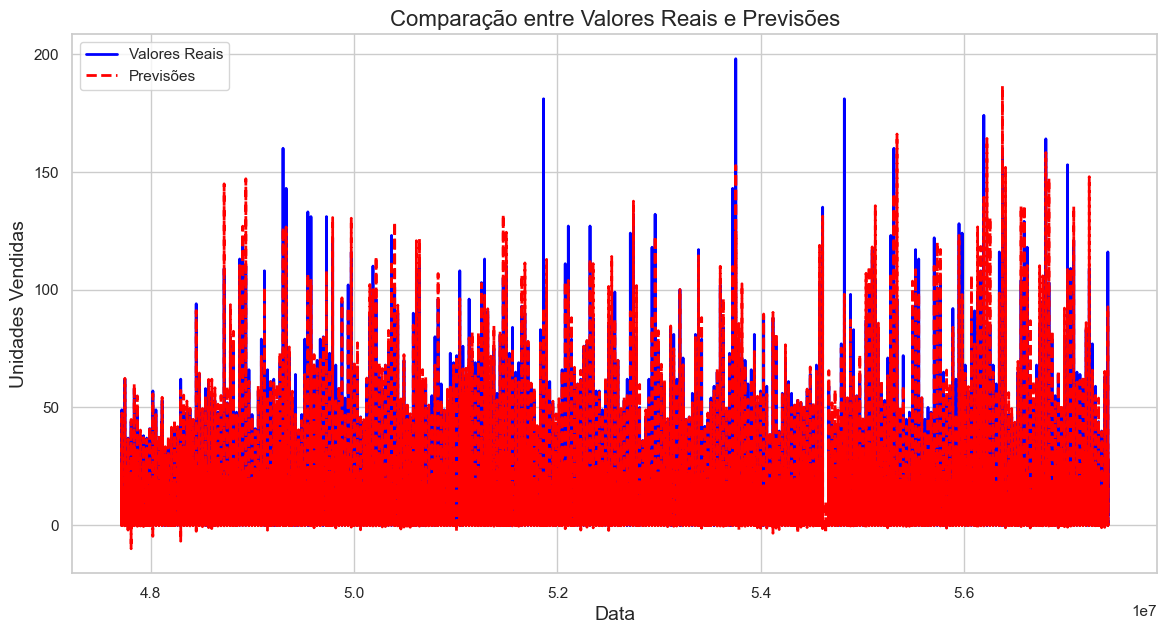

In [136]:
# USAR ESTE GRAFICO
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Plotando os valores reais
plt.plot(y_valid_10.index, y_valid_10, label='Valores Reais', color='blue', linewidth=2)

# Plotando as previsões
plt.plot(y_valid_10.index, y_pred_10, label='Previsões', color='red', linestyle='--', linewidth=2)

# Adicionando título e legendas
plt.title('Comparação entre Valores Reais e Previsões', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Unidades Vendidas', fontsize=14)
plt.legend()

# Exibindo o gráfico
plt.show()